<a href="https://colab.research.google.com/github/MarianoMiro/MarianoMiro/blob/main/PROYECTOS/PROYECTO_FINAL_Jorge_Mariano_Miro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL**

**Prediccion de Resultados en Tenis**

---



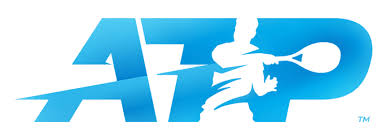

## **1- PRESENTACION**

El dataset seleccionado corresponde a la informacion de todos los partidos jugados en el circuito ATP desde Enero 2000 hasta principios 2024, en cualquier tipo de superficie, ronda o ambiente.

El proyecto consiste en encontrar la mayor probabilidad de acierto cuando se dan ciertas caracteristicas que avalado por la estadistica, no estan ajustadas en el valor de la cuota de apuesta.

###**Motivación**

Se ha propuesto avanzar en el análisis de este dataset, buscando los puntos debiles del gambling en las casas de apuestas. Para esto se propone trabajar en primer lugar, en deportes donde no haya una tercera opcion de resultado, lo que permite ser mas eficientes en aciertos. El fin, es lograr obtener resultados que puedan intervenir positivamente en la decision de un apostador.

Este trabajo se analizará por medio de un algoritmo de clasificación, que tan probable es el acierto o proyeccion de resultado de un partido dada sus características.


###**Audiencia**

La audiencia de interés en los resultados del presente estudio pueden ser:

*   Apostadores
*   Casas de Apuestas
*   Deportistas






### **Contexto Comercial:**

Las casas de apuestas deportivas han emergido como actores clave en el panorama comercial, fusionando emoción y estrategia. En este ecosistema, las cuotas desempeñan un papel crucial al reflejar las percepciones de probabilidad. El tenis, uno de los deportes centrales en esta dinámica, ve sus cuotas ajustarse en tiempo real según el rendimiento de los jugadores y las variables del encuentro.

El gambling, intrínseco a esta industria, ha experimentado un auge significativo, atrayendo a una audiencia ávida de emoción y entretenimiento. Este sector comercial, en constante evolución, ofrece experiencias únicas que trascienden las competiciones, convirtiendo cada evento en una oportunidad para la participación activa. La intersección entre deportes y apuestas crea un mercado vibrante y adaptable, proporcionando a los aficionados una conexión más inmersiva con sus deportes favoritos, sin embargo, suele ser un negocio netamente perdedor a largo plazo.



## **2- PREGUNTAS Y OBJETIVOS**

Respecto al dataframe, algunas de las preguntas que fueron surgiendo son:

*   Es mas alto es el porcentaje de ganador del favorito en primera ronda con respecto al resto del torneo?
*   Que variables no estadisticas hay que tener en cuenta? Cansancio acumulado? Vuelta al circuito despues de una lesion? Historial cara a cara?
*   Que porcentaje de acierto hay en el favoritismo respecto la diferencia de rankings? Es decir, si el favorito de ranking es 30, juega contra el ranking 35 (diferencia 5) o si el favoritismo de un tenista ranking 20 juega contra un ranking 110 (diferencia 90)
*   El favorito estando en desventaja, tiene mas chances de exito, 0-1 en torneo 3 sets, o 1-2 en torneo de 5 sets?
*   Que influye mas en el analisis? paridad de rankings, o paridad de cuotas iniciales?
*   Que porcentaje de eficacia hay en los favoritos que ganan el primer set, y terminan ganando el partido?
*   Cuanto influye la cantidad de puntos ganados del tenista?

*   Cuanto influye la cantidad de aces logrados por un tenista?

*   Cuanto influye la cantidad de errores no forzados de un tenistas?

###**Objetivos:**

Crear un algoritmo, en el que se pueda predecir dar por ganador al jugador favorito en tenis cuando se cumplan ciertos requisitos probabilisticos.

## **3- INTEGRANTE DEL PROYECTO**


Jorge Mariano Miro

https://www.linkedin.com/in/mariano-miro-data/

## **4- DATA ACQUISITION**



Es un dataframe publico descargado del sitio kaggle, con mas de 60mil encuentros de ATP de un usuario dissfya, actualizado 16 Enero 2024

**Indice de Columnas del Dataframe:**

* **Tournament** Torneo       
* **Date** Fecha     
* **Series** Tipo de torneo    
* **Court** Tipo de cancha     
* **Surface** Tipo de superficie     
* **Round** Ronda      
* **Best of** Al mejor de    
* **Player_1** Jugador 1    
* **Player_2** Jugador 2   
* **Winner** Ganador     
* **Rank_1** Ranking del Jug 1     
* **Rank_2** Ranking del Jug 2  
* **Pts_1** Puntos ganados del jug 1       
* **Pts_2** Puntos ganados del jug 2        
* **Odd_1** Cuota de la casa de apuesta del jug 1      
* **Odd_2** Cuota de la casa de apuesta del jug 2     
* **Score** Resultado final  


**Indice de Columnas agregadas:**

* **Ganador** Ganó el jugador 1 o el jugador 2?   
* **ganador_ranking**  Numero de Ranking del que ganó    
* **Ganador_Favorito** Ganó el favorito si o no?     
* **Primera_Ronda** Es un partido de Primera Ronda ?   
* **dif_rank_tenistas** Diferencia entre la posicion de ranking de ATP de los dos tenistas          
* **dif_rank_cuotas** Resta entre la cuota mayor del no favorito y la menor del favorito         
* **Superficie** Tipo de Piso donde se juega el torneo de 1 a 4      

**Indice de Columnas Dataframe extraido de APIs (dataframe_concat):**

*   **AvgAcesPerMatch** = Promedio aces por partido
*   **AvgAcesPerMatchSortField**
*   **AvgDblFaultsPerMatch** = Promedio doble faltas por partido
*   **AvgDblFaultsPerMatchSortField**
*   **FirstServePct** = Porcentaje de acierto en primer servicio
*   **FirstServePctSortField**
*   **FirstServePointsWonPct** = Porcentaje de puntos ganados con el primer servicio
*   **FirstServePointsWonPctSortField**
*   **PlayerId** = ID jugador
*   **PlayerName** = Nombre Jugador
*   **SecondServePointsWonPct** = Porcentaje de acierto en segundo servicio
*   **SecondServePointsWonPctSortField**
*   **ServeRating** = Rating del servicio
*   **ServeRatingSortField**
*   **ServiceGamesWonPct** = Porcentaje de games ganados con el servicio
*   **ServiceGamesWonPctSortField**
*   **año** = Año


## **5- LIBRERIAS**

In [ ]:
# Librerias para instalar
!pip install scikit-optimize

In [ ]:
!pip install catboost

In [ ]:
# Tratamiento de Datos
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
# Graficos
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import missingno as msno
import os
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

In [ ]:
# Resguardo de Api Keys
from google.colab import userdata
import requests
from bs4 import BeautifulSoup
import json

In [ ]:
# Preprocesado y Modelado
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Feature Engineering
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import permutation_importance

# Detección de outliers
from sklearn.ensemble import IsolationForest

# Otros modelos de Regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Otros modelos de Clasificación
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Desbalanceo de Clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

# Selección de Modelos
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from scipy.stats import randint


In [ ]:
# Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pointbiserialr, spearmanr, pearsonr, contingency
#import sklearn.metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [ ]:
# Instalar el Modelo
! pip install joblib

In [ ]:
# Librerias de Guardado
import joblib
#import pickle
#import tensorflow
#import torch

In [ ]:
# Configuracion de Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Montaje de Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

## **6 - PALETA DE COLORES**

In [ ]:

nombres_colores = ['Turquesa', 'Azul', 'Violeta', 'Morado', 'Rojo', 'Negro', 'Blanco']
valores_colores = ['#30b6ba','#307eba','#5a30ba','#ba309a','#fa0509','#080000','#e3e1e1']

# Crear una figura con Plotly Express (aunque no la usaremos directamente)
fig = px.scatter()

# Añadir los rectángulos de color usando Graph Objects
for i, (nombre, valor) in enumerate(zip(nombres_colores, valores_colores)):
    fig.add_shape(
        type="rect",
        x0=0, y0=i, x1=1, y1=i+1,
        line=dict(width=0),
        fillcolor=valor
    )
    # Añadir el texto sobre el color
    fig.add_trace(go.Scatter(
        x=[0.5], y=[i + 0.5],
        text=[nombre],
        mode="text",
        textfont=dict(color="white", size=12),
        showlegend=False
    ))

# Configuración del layout con título centrado
fig.update_layout(
    title=dict(
        text="Tabla de Colores a Utilizar",
        x=0.5,  # Centrar el título horizontalmente
        xanchor='center',
        yanchor='top'
    ),
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False,
        range=[0, len(nombres_colores)]
    ),
    plot_bgcolor="white",
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=30, b=0)
)

fig.show()



## **7 - EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# OPCION A Dataframe 2000 - Fin 2023
#df = pd.read_csv('/content/drive/MyDrive/Coderhouse/DATA SCIENCE/Proyecto_JMM/Datasets_Jorge_Mariano_Miro/csv_utilizados/Copia de atp_tennis.csv')

In [ ]:
# OPCION B Dataframe 2000 - Principios 2024 actualizado
df = pd.read_csv('/content/drive/MyDrive/Coderhouse/DATA SCIENCE/Proyecto_JMM/Datasets_Jorge_Mariano_Miro/csv_utilizados/Actualiz_atp_tennis.csv')

In [ ]:
df.shape

(61668, 17)

In [ ]:
df.tail(5)

Tournament        Date  Series    Court Surface          Round  \
61663  ASB Classic  2024-01-10  ATP250  Outdoor    Hard  Quarterfinals   
61664  ASB Classic  2024-01-11  ATP250  Outdoor    Hard  Quarterfinals   
61665  ASB Classic  2024-01-12  ATP250  Outdoor    Hard     Semifinals   
61666  ASB Classic  2024-01-12  ATP250  Outdoor    Hard     Semifinals   
61667  ASB Classic  2024-01-13  ATP250  Outdoor    Hard      The Final   

       Best of    Player_1            Player_2      Winner  Rank_1  Rank_2  \
61663        3   Muller A.           Daniel T.   Daniel T.      79      74   
61664        3  Shelton B.  Carballes Baena R.  Shelton B.      16      67   
61665        3  Shelton B.           Daniel T.   Daniel T.      16      74   
61666        3   Tabilo A.             Fils A.   Tabilo A.      82      35   
61667        3   Daniel T.           Tabilo A.   Tabilo A.      74      82   

       Pts_1  Pts_2  Odd_1  Odd_2           Score  
61663    711    739   1.91   1.91  4-6 7-6 3-6     
61664   2145    796   1.17   5.00     6-4 6-3      
61665   2145    739   1.22   4.33     5-7 6-7      
61666    707   1208   4.00   1.25     6-2 7-5      
61667    739    707   1.73   2.10     2-6 5-7

In [ ]:
#Convertir la columna fecha del df del tipo object a datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#chequeamos el tipo de dato de cada columna en especial date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61668 entries, 0 to 61667
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tournament  61668 non-null  object        
 1   Date        61668 non-null  datetime64[ns]
 2   Series      61668 non-null  object        
 3   Court       61668 non-null  object        
 4   Surface     61668 non-null  object        
 5   Round       61668 non-null  object        
 6   Best of     61668 non-null  int64         
 7   Player_1    61668 non-null  object        
 8   Player_2    61668 non-null  object        
 9   Winner      61668 non-null  object        
 10  Rank_1      61668 non-null  int64         
 11  Rank_2      61668 non-null  int64         
 12  Pts_1       61668 non-null  int64         
 13  Pts_2       61668 non-null  int64         
 14  Odd_1       61668 non-null  float64       
 15  Odd_2       61668 non-null  float64       
 16  Score       61668 non-

In [ ]:
#Cambiamos nombre de las columnas para poder identificar mejor el dato
df = df.rename(columns={"Odd_1": "Cuota_player1", "Odd_2": "Cuota_player2","Best of": "Cantidad_de_set"})

In [ ]:
#Chequeo cuantos datos null hay
pd.isna(df[['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Cantidad_de_set', 'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2',
       'Pts_1', 'Pts_2', 'Cuota_player1', 'Cuota_player2', 'Score']]).sum()

Tournament         0
Date               0
Series             0
Court              0
Surface            0
Round              0
Cantidad_de_set    0
Player_1           0
Player_2           0
Winner             0
Rank_1             0
Rank_2             0
Pts_1              0
Pts_2              0
Cuota_player1      0
Cuota_player2      0
Score              0
dtype: int64

In [ ]:
# Creo la copia del dataframe para trabajar
df_modelado_tenis = df.copy()

## **8 - CONFIGURACION DEL PLOTEO**

Estos van a ser los aspectos personalizados de la libreria Ploty Express en todo el Notebook.

In [ ]:
# Crear una figura de ejemplo
fig = px.scatter(x=[1, 2, 3], y=[3, 1, 2], title="Ejemplo de gráfico con Plotly Express")

# Actualizar el layout de la figura
fig.update_layout(
    title={
        'text': "Ejemplo de gráfico con Plotly Express",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'color': '#0d6582',
            'size': 15,
            'family': 'Utopia'
        }
    },
    xaxis_title="Eje X",
    yaxis_title="Eje Y",
    font=dict(
        family="Comic Sans MS, Utopia, serif",
        size=12,
        color="#ba309a"
    ),
    xaxis=dict(
        showgrid=True,
        gridcolor="black",
        gridwidth=0.2,
        linecolor="black",
        linewidth=0.5
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="black",
        gridwidth=0.2,
        linecolor="black",
        linewidth=0.5
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Mostrar la figura
fig.show()


## **9 - ESTRUCTURACION DEL PROYECTO**

In [ ]:
#creo funcion para mostrar si el ganador fue el rank 1 o 2
def determinar_winner(row):
    if row['Winner'] == row['Player_1']:
        return 1
    elif row['Winner'] == row['Player_2']:
        return 2
    else:
        return None

# Creo la nueva columna 'ganador'
df_modelado_tenis['Ganador'] = df_modelado_tenis.apply(determinar_winner, axis=1)


In [ ]:
# Creo otra función para determinar el valor de la columna 'ganador_ranking'
def determinar_ganador_ranking(row):
    if row['Winner'] == row['Player_1']:
        return row['Rank_1']
    elif row['Winner'] == row['Player_2']:
        return row['Rank_2']
    else:
        return None

# Creo la nueva columna 'ganador_ranking'
df_modelado_tenis['ganador_ranking'] = df_modelado_tenis.apply(determinar_ganador_ranking, axis=1)


In [ ]:
#creo funcion para mostrar si el ganador fue el del ranking mas bajo
def ganador_favorito(fila):
    if fila['Rank_1'] < fila['Rank_2'] and fila['ganador_ranking'] == fila['Rank_1']:
        return 1
    elif fila['Rank_1'] < fila['Rank_2'] and fila['ganador_ranking'] == fila['Rank_2']:
        return 0
    elif fila['Rank_1'] > fila['Rank_2'] and fila['ganador_ranking'] == fila['Rank_1']:
        return 0
    elif fila['Rank_1'] > fila['Rank_2'] and fila['ganador_ranking'] == fila['Rank_2']:
        return 1
    else:
        return 4

# Creo la nueva columna 'ganador_favorito'
df_modelado_tenis['Ganador_favorito'] = df_modelado_tenis.apply(ganador_favorito, axis=1)


In [ ]:
df_modelado_tenis['Ganador'].unique()

array([1, 2])

In [ ]:
df_modelado_tenis['Ganador_favorito'].unique()

array([1, 0, 4])

In [ ]:
#la columna ganador_favorito, tiene algun dato entero 4, seguramente es un error, asi que lo vamos a eliminar
df_modelado_tenis = df_modelado_tenis[df_modelado_tenis['Ganador_favorito'] != 4]

In [ ]:
#chequeamos que hayan desaparecido
df_modelado_tenis['Ganador_favorito'].unique()

array([1, 0])

In [ ]:
# Creo otra función para determinar el valor de la columna 'ganador_ranking'
def determinar_primera_ronda(row):
    if row['Round']== '1st Round':
        return 1
    else:
        return 0

# Creo la nueva columna 'primera ronda'
df_modelado_tenis['Primera_Ronda'] = df_modelado_tenis.apply(determinar_primera_ronda, axis=1)
df_modelado_tenis.head(3)

Tournament       Date         Series    Court  \
0  Australian Hardcourt Championships 2000-01-03  International  Outdoor   
1  Australian Hardcourt Championships 2000-01-03  International  Outdoor   
2  Australian Hardcourt Championships 2000-01-03  International  Outdoor   

  Surface      Round  Cantidad_de_set    Player_1       Player_2      Winner  \
0    Hard  1st Round                3  Dosedel S.    Ljubicic I.  Dosedel S.   
1    Hard  1st Round                3  Clement A.     Enqvist T.  Enqvist T.   
2    Hard  1st Round                3   Escude N.  Baccanello P.   Escude N.   

   Rank_1  Rank_2  Pts_1  Pts_2  Cuota_player1  Cuota_player2           Score  \
0      63      77     -1     -1           -1.0           -1.0     6-4 6-2       
1      56       5     -1     -1           -1.0           -1.0     3-6 3-6       
2      40     655     -1     -1           -1.0           -1.0  6-7 7-5 6-3      

   Ganador  ganador_ranking  Ganador_favorito  Primera_Ronda  
0        1               63                 1              1  
1        2                5                 1              1  
2        1               40                 1              1

In [ ]:
# Pasamos a tipo booleano las columnas Ganador Favorito y Primera Ronda
df_modelado_tenis['Ganador_favorito'] = df_modelado_tenis['Ganador_favorito'].astype('bool')
df_modelado_tenis['Primera_Ronda'] = df_modelado_tenis['Primera_Ronda'].astype('bool')

In [ ]:
# Creo columna con la diferencia entre los dos ranking de tenistas
def dif_rank_tenistas(row):
    if row['Rank_1'] > row['Rank_2']:
        return np.abs(row['Rank_1'] - row['Rank_2'])
    elif row['Rank_1'] < row['Rank_2']:
        return np.abs(row['Rank_2'] - row['Rank_1'])
    else:
        return 0

# Creo la nueva columna 'diferencia ranking'
df_modelado_tenis['dif_rank_tenistas'] = df_modelado_tenis.apply(dif_rank_tenistas, axis=1)

In [ ]:
# Creo columna con la diferencia entre las cuotas de tenistas
def dif_rank_cuotas(row):
    if row['Cuota_player1'] > row['Cuota_player2']:
        return np.abs(row['Cuota_player1'] - row['Cuota_player2'])
    elif row['Cuota_player1'] < row['Cuota_player2']:
        return np.abs(row['Cuota_player2'] - row['Cuota_player1'])
    else:
        return 0

# Creo la nueva columna 'diferencia cuotas'
df_modelado_tenis['dif_rank_cuotas'] = df_modelado_tenis.apply(dif_rank_cuotas, axis=1)

In [ ]:
# Uso Label Encoder para categorizar las 4 Columnas surface
le = LabelEncoder()
df_modelado_tenis['Superficie'] = le.fit_transform(df_modelado_tenis['Surface'])

In [ ]:
# Chequeamos que haya solo datos de las 4 superficie
df_modelado_tenis['Superficie'].unique()

array([3, 1, 2, 0])

In [ ]:
# Chequeo los datos con la funcion describe
df_modelado_tenis.describe()

Date  Cantidad_de_set        Rank_1  \
count                          61667     61667.000000  61667.000000   
mean   2011-06-19 23:20:32.185772032         3.376993     76.028281   
min              2000-01-03 00:00:00         3.000000     -1.000000   
25%              2005-06-07 00:00:00         3.000000     25.000000   
50%              2011-03-25 00:00:00         3.000000     54.000000   
75%              2017-05-11 00:00:00         3.000000     92.000000   
max              2024-01-13 00:00:00         5.000000   3390.000000   
std                              NaN         0.782222    100.877944   

            Rank_2         Pts_1         Pts_2  Cuota_player1  Cuota_player2  \
count  61667.00000  61667.000000  61667.000000   61667.000000   61667.000000   
mean      75.65844   1093.473349   1099.280815       2.399871       2.392336   
min       -1.00000     -1.000000     -1.000000      -1.000000      -1.000000   
25%       24.00000     -1.000000     -1.000000       1.330000       1.330000   
50%       54.00000    671.000000    673.000000       1.727000       1.746333   
75%       92.00000   1205.000000   1210.000000       2.750000       2.750000   
max     4915.00000  16950.000000  16950.000000      67.000000      51.000000   
std      101.53385   1707.225335   1730.742427       2.671147       2.624749   

            Ganador  ganador_ranking  dif_rank_tenistas  dif_rank_cuotas  \
count  61667.000000     61667.000000       61667.000000     61667.000000   
mean       1.499992        59.019459          72.540240         2.281535   
min        1.000000         1.000000           1.000000         0.000000   
25%        1.000000        17.000000          19.000000         0.590000   
50%        1.000000        42.000000          41.000000         1.350000   
75%        2.000000        78.000000          80.000000         2.750000   
max        2.000000      1890.000000        4911.000000        66.000000   
std        0.500004        72.163539         117.809719         3.309841   

         Superficie  
count  61667.000000  
mean       2.166686  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        3.000000  
max        3.000000  
std        0.969850

**NOTA:**

En primera impresion que el minimo en las columnas rank1, rank2, pts1, y pts2 tienen datos minimos -1, lo cual no son datos factibles, asi que son datos que tengo que decidir si los filtro

In [ ]:
# Porcentaje de columnas nulos

# Sabiendo que mi dataframe df_modelado_tenis trabaja con datos nulos de forma -1,
# cambio el codigo para saber esa informacion.

serie=((df_modelado_tenis == -1).sum()/df_modelado_tenis.shape[0])*100
serie=serie.sort_values(ascending=False)
serie

Pts_2                25.383106
Pts_1                25.381484
Cuota_player1         6.126453
Cuota_player2         6.123210
Rank_1                0.022703
Rank_2                0.019459
dif_rank_cuotas       0.000000
dif_rank_tenistas     0.000000
Primera_Ronda         0.000000
Ganador_favorito      0.000000
ganador_ranking       0.000000
Ganador               0.000000
Score                 0.000000
Tournament            0.000000
Date                  0.000000
Winner                0.000000
Player_2              0.000000
Player_1              0.000000
Cantidad_de_set       0.000000
Round                 0.000000
Surface               0.000000
Court                 0.000000
Series                0.000000
Superficie            0.000000
dtype: float64

<Axes: >

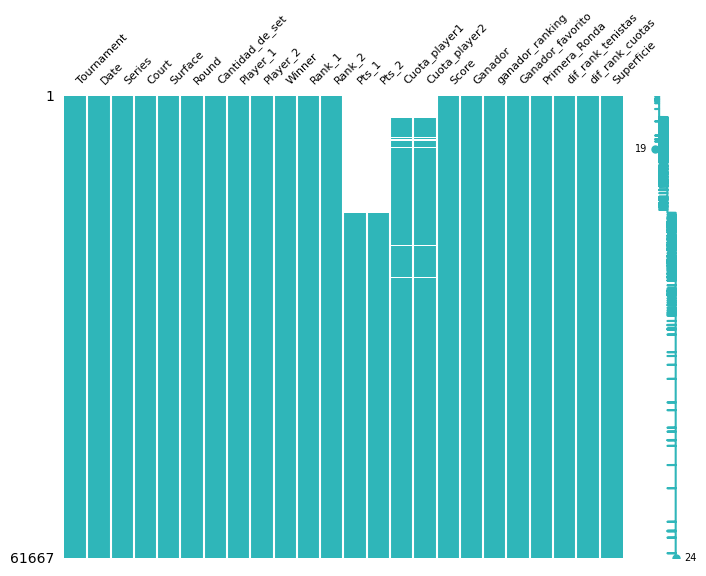

In [ ]:
# Visualizo con missingno, teniendo en cuanta que datos null no hay en forma de NaN pero si -1
# Para eso voy a reemplazar -1 con NaN
# df_menos_uno es el mismo dataframe que df_modelado_tenis solo que sus datos faltantes son NaN

df_menos_uno = df_modelado_tenis.replace(-1, np.nan)
msno.matrix(df_menos_uno, figsize=(8,6), fontsize=8 , color=(0.188, 0.714, 0.729)) #color que utilizamos en los otros graficos

<Axes: >

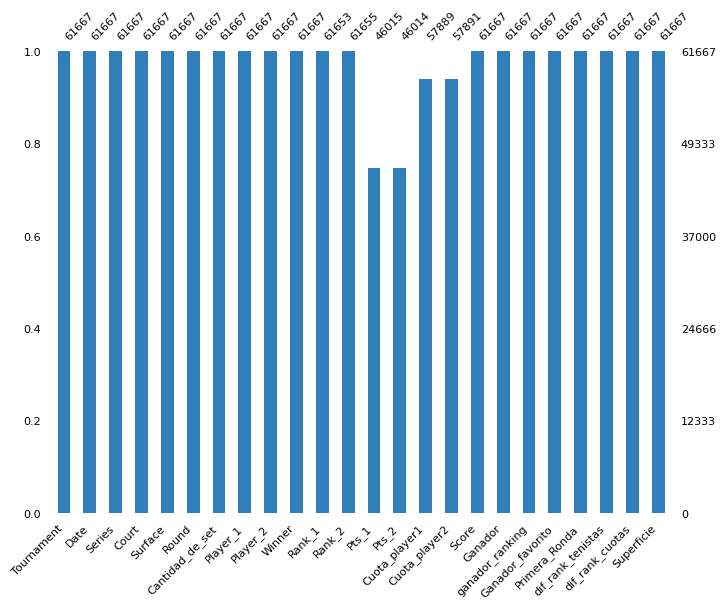

In [ ]:
# Visualización con barras'#5a30ba'
msno.bar(df_menos_uno , figsize=(8,6), fontsize=8, color=(0.188, 0.494, 0.729))

<Axes: >

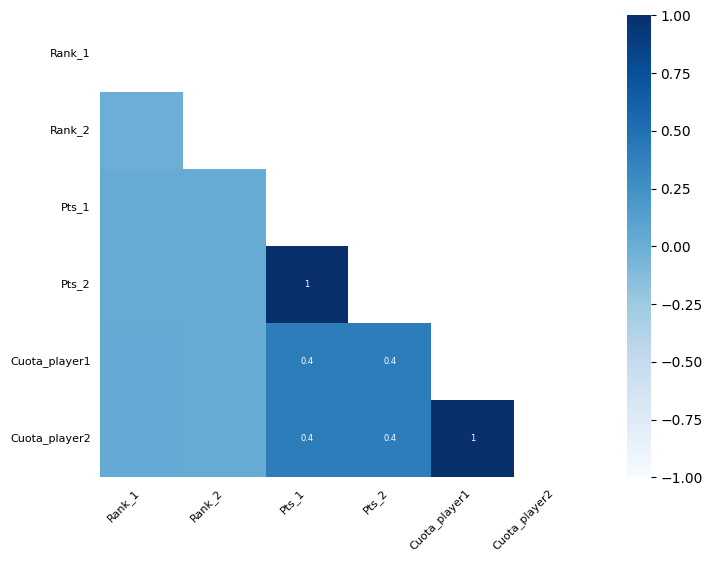

In [ ]:
# Visualización con heatmap
msno.heatmap(df_menos_uno, figsize=(8,6), fontsize=8, cmap='Blues')

In [ ]:
#funcion describe para filtrar los maximos minimos
df_modelado_tenis = df_modelado_tenis.loc[(df_modelado_tenis['Rank_1']>=1)&(df_modelado_tenis['Rank_2']>=1)
                    &(df_modelado_tenis['Cuota_player1']>=1)&(df_modelado_tenis['Cuota_player2']>=1)
                    ]

In [ ]:
# La columna pts_1 y pts_2 va a ser muy importante en el futuro, tener como minimo 1 punto ganado, puede ser un outlier
# por eso, chequeo cuantas filas (partidos) tienen esa info

# Reformatear el DataFrame
df_long = pd.melt(df_modelado_tenis, value_vars=['Pts_1', 'Pts_2'], var_name='Points', value_name='Value')

# Crear un gráfico de caja con Plotly Express
fig = px.box(df_long, x='Points', y='Value', color='Points',
             color_discrete_map={'Pts_1': '#30b6ba', 'Pts_2': '#307eba'})

# Actualizar el layout del gráfico
fig.update_layout(
    title={
        'text': "Cantidad de Puntos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'color': '#0d6582',
            'size': 15,
            'family': 'Utopia'
        }
    },
    xaxis_title="",
    yaxis_title="",
    font=dict(
        family="Comic Sans MS, Utopia, serif",
        size=12,
        color="#ba309a"
    ),
    xaxis=dict(
        showgrid=False,
        linecolor='white',
        showline=False,
        showticklabels=False
    ),
    yaxis=dict(
        showgrid=False,
        linecolor='white',
        showline=False,
        showticklabels=False
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,  # Ancho de la figura
    height=600   # Altura de la figura
)

# Mostrar la figura
fig.show()

**NOTA:**

Mediante el boxplot noto la cantidad de ouliers que hay. Estas dos columnas son sumamente importante, refiere a los puntos del ranking que tiene el jugador a la hora de enfrentarse. En el modelo, un dato tan alto como por ejemplo 7500, puede ser considerado con demasiada importancia por sobre los otros, asi que posiblemente, a estas dos columnas las estandarizemos


In [ ]:
coefs = np.arange(1.5, 11.0, 0.5)
cuota = []
for x in coefs:
    value = (len(df_modelado_tenis.query(f'Player_2 == Winner and Cuota_player2 > {x}')) + len(df_modelado_tenis.query(f'Player_1 == Winner and Cuota_player1 > {x}'))) / len(df_modelado_tenis) * 100
    cuota.append(value)

# Crear DataFrame para Plotly Express
df_plot_ = pd.DataFrame({'Cuota Mayor a': coefs, '%': cuota})

# Crear gráfico de barras y línea con Plotly Express
fig = px.bar(df_plot_, x='Cuota Mayor a', y='%', title='Porcentaje de Ganar en Cuotas Riesgozas',
             color_discrete_sequence=['#30b6ba'])  # Color de las barras

# Añadir línea al gráfico
fig.add_scatter(x=df_plot_['Cuota Mayor a'], y=df_plot_['%'], mode='lines', line=dict(color='#307eba'))  # Color de la línea

# Personalizar diseño
fig.update_layout(
    xaxis_title='Cuota Mayor a',
    yaxis_title='%',
    showlegend=False,  # Ocultar leyenda (opcional)
    template='plotly_white',  # Tema más limpio (opcional)
    title_x=0.5,
    width=800,  # Ancho de la figura
    height=600   # Altura de la figura
)

fig.show()


**NOTA:**

Este grafico muestra que la probabilidad que hay de acertar con las **cuotas iniciales entre 1.5 y 2**, es de menos de la mitad.

Ademas refleja que la probabilidad que hay de acertar con las **cuotas iniciales mayores a 2**, es realmente muy baja.

In [ ]:
# Chequeo que no haya celdas duplicadas

print(df_modelado_tenis.shape)
df_modelado_tenis= df_modelado_tenis.drop_duplicates()
print(df_modelado_tenis.shape)

(57872, 24)
(57872, 24)


In [ ]:
# Chequeo que no haya celdas duplicadas
df_modelado_tenis.duplicated().any()

False

In [ ]:
# Reseteo index del dataframe
df_modelado_tenis = df_modelado_tenis.reset_index(drop = True)

In [ ]:
df_modelado_tenis.head()

Tournament       Date         Series    Court Surface      Round  \
0  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
1  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
2  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
3  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
4  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   

   Cantidad_de_set   Player_1    Player_2     Winner  Rank_1  Rank_2  Pts_1  \
0                3    Haas T.    Smith L.    Haas T.      23     485     -1   
1                3  Hewitt L.  Arthurs W.  Hewitt L.       7      83     -1   
2                3    Haas T.  Malisse X.    Haas T.      23     127     -1   
3                3  Hewitt L.     Phau B.  Hewitt L.       7     208     -1   
4                3   Massu N.  Clement A.   Massu N.      87      18     -1   

   Pts_2  Cuota_player1  Cuota_player2           Score  Ganador  \
0     -1         1.1100          3.750     6-3 6-3            1   
1     -1         1.2000          3.550     6-4 6-3            1   
2     -1         1.2825          2.925     7-5 6-3            1   
3     -1         1.1300          5.500  6-7 6-4 6-0           1   
4     -1         2.4075          1.430     6-2 6-2            1   

   ganador_ranking  Ganador_favorito  Primera_Ronda  dif_rank_tenistas  \
0               23              True           True                462   
1                7              True           True                 76   
2               23              True          False                104   
3                7              True          False                201   
4               87             False          False                 69   

   dif_rank_cuotas  Superficie  
0           2.6400           3  
1           2.3500           3  
2           1.6425           3  
3           4.3700           3  
4           0.9775           3

In [ ]:
# Modifico todos los datos de las columnas Pts_1 y Pts_2 donde aparece -1, por 0

#df_modelado_tenis.loc[df_modelado_tenis['Pts_1'] == -1, 'Pts_1'] = 0
#df_modelado_tenis.loc[df_modelado_tenis['Pts_2'] == -1, 'Pts_2'] = 0

In [ ]:
#filtramos para ver en distintos suelos y con o sin primera ronda, comparacion entre ganador del favorito y no favorito
primera_ronda_hard = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Hard') & (df_modelado_tenis['Round']== '1st Round')]
sin_primera_ronda_hard = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Hard') & (df_modelado_tenis['Round']!= '1st Round')]
primera_ronda_pasto = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Grass') & (df_modelado_tenis['Round']== '1st Round')]
sin_primera_ronda_pasto = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Grass') & (df_modelado_tenis['Round']!= '1st Round')]
primera_ronda_arcilla = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Clay') & (df_modelado_tenis['Round']== '1st Round')]
sin_primera_ronda_arcilla = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Clay') & (df_modelado_tenis['Round']!= '1st Round')]

In [ ]:
primera_ronda_carpeta = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Carpet') & (df_modelado_tenis['Round']== '1st Round')]
sin_primera_ronda_carpeta = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Carpet') & (df_modelado_tenis['Round']!= '1st Round')]

In [ ]:
#filtramos para ver cada superficie de juego
duro = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Hard')]
pasto = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Grass')]
arcilla = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Clay')]
carpeta = df_modelado_tenis[(df_modelado_tenis['Surface'] == 'Carpet')]

In [ ]:
# Para terminar esta parte, uso el shape para afirmar con cuantas filas trabajaremos en la siguiente fase
df_modelado_tenis.shape

(57872, 24)

## **10 - HIPOTESIS DEL PROBLEMA ANALITICO:**

###**Hipotesis 1**
En Primera Ronda de los torneos, suelen aparecer el mayor porcentaje de victorias de los NO Favoritos

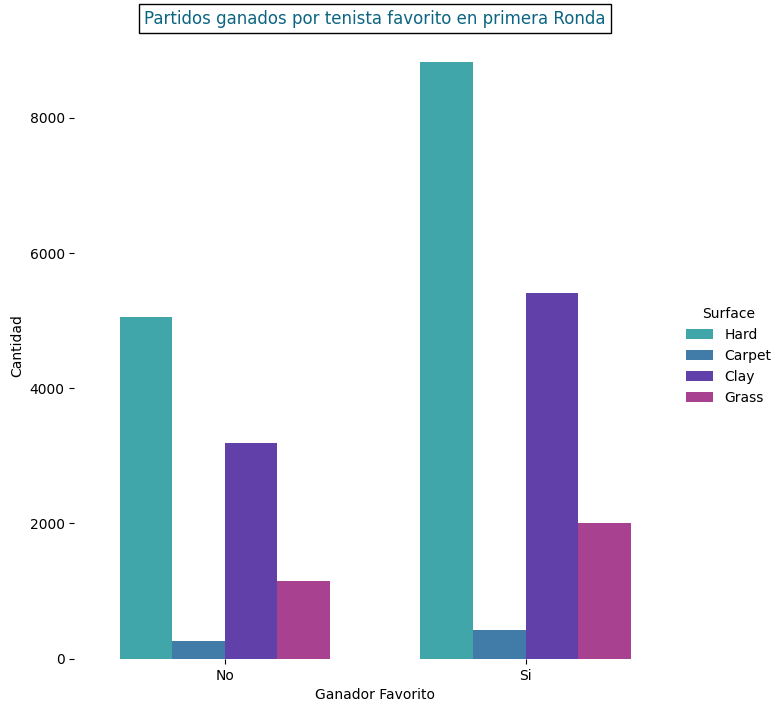

In [ ]:
#Visualizacion Seaborn
#Filtro primera ronda de todas las superficies
# Visualizo de forma general

First_round = df_modelado_tenis[df_modelado_tenis['Round']=='1st Round']
a = sns.catplot(x='Ganador_favorito', data=First_round, hue = 'Surface',
                palette=['#30b6ba','#307eba','#5a30ba','#ba309a'],       #color picker
                height=7, width=0.7, kind = "count")
plt.title('Partidos ganados por tenista favorito en primera Ronda', loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4},)

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)


a.set(xticklabels = ['No', 'Si'],
      ylabel = 'Cantidad',
      xlabel = 'Ganador Favorito')



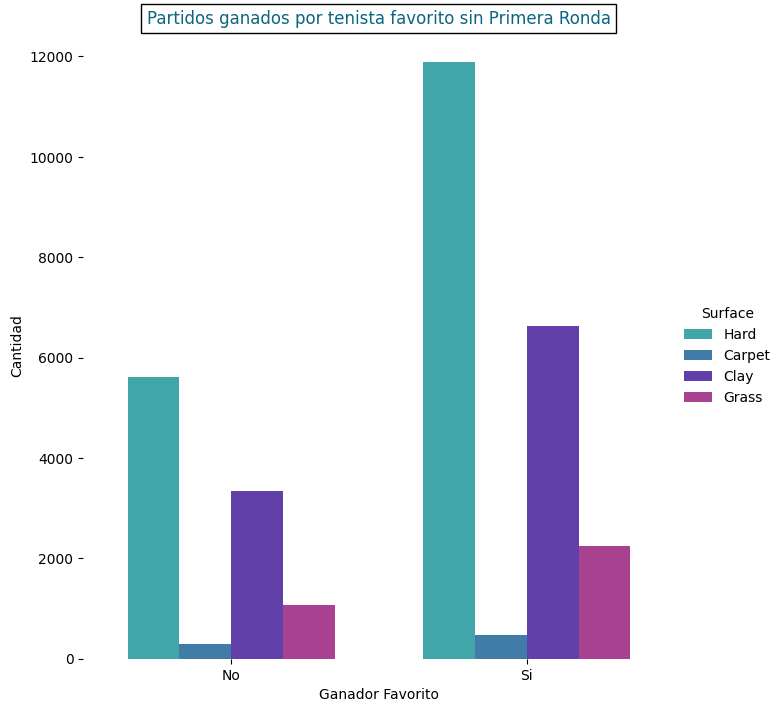

In [ ]:
#Filtro primera ronda de todas las superficies
# Visualizo de forma general para los encuentros sin primera ronda

Sin_first_round = df_modelado_tenis[df_modelado_tenis['Round']!='1st Round']
a = sns.catplot(x='Ganador_favorito', data=Sin_first_round, hue = 'Surface',
                palette=['#30b6ba','#307eba','#5a30ba','#ba309a'],       #color picker
                height=7, width=0.7, kind = "count")

plt.title('Partidos ganados por tenista favorito sin Primera Ronda', loc= 'center' , color= '#0d6582', bbox={'facecolor':'1', 'pad':4})

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

a.set(xticklabels = ['No', 'Si'],
      ylabel = 'Cantidad',
      xlabel = 'Ganador Favorito')


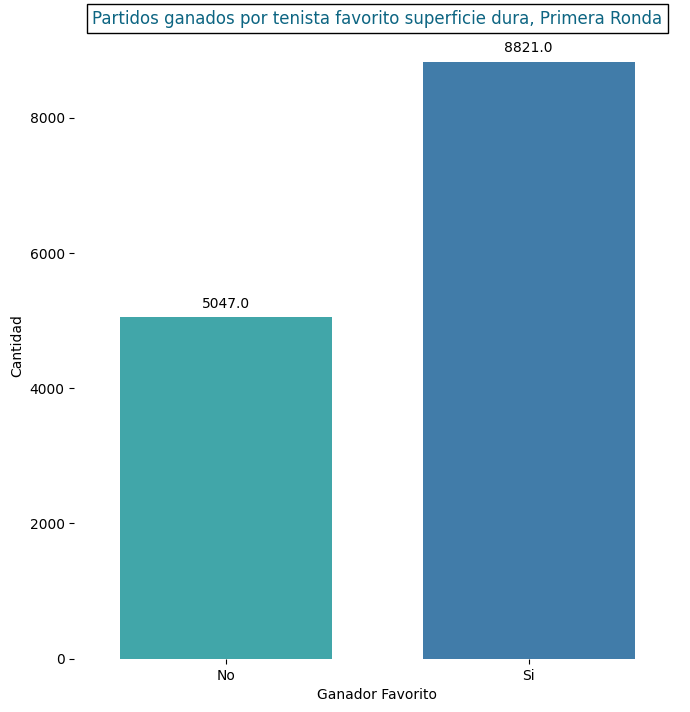

In [ ]:
# Gráfico barra para visualizar cantidad de partidos ganados por el favorito en primera ronda en superficie dura
# 0 representa "NO", 1 representa "SI"
b = sns.catplot(x = "Ganador_favorito", data = primera_ronda_hard, palette=['#30b6ba','#307eba'],
            height=7, width=0.7, kind = "count")

plt.title('Partidos ganados por tenista favorito superficie dura, Primera Ronda', loc = 'center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

b.set(xticklabels = ['No', 'Si'],
      ylabel = 'Cantidad',
      xlabel = 'Ganador Favorito')

# Anotar cada barra con la cantidad
for p in b.ax.patches:
    b.ax.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points',
                  fontsize=10,
                  color='black')


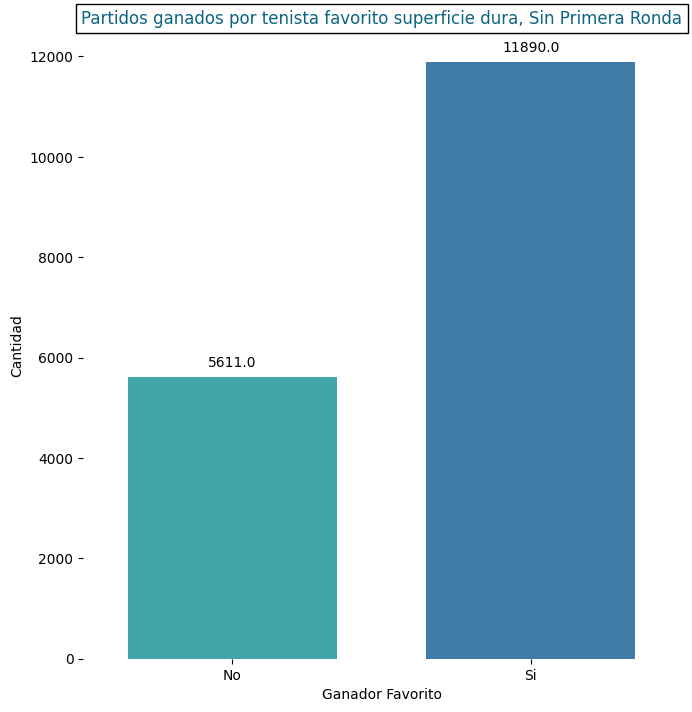

In [ ]:
# Gráfico barra para visualizar cantidad de partidos ganados por el favorito SIN primera ronda en superficie dura
# 0 representa "NO", 1 representa "SI"
c = sns.catplot(x = "Ganador_favorito", data = sin_primera_ronda_hard, height=7, width=0.7, palette=['#30b6ba','#307eba'],
            kind = "count")

plt.title('Partidos ganados por tenista favorito superficie dura, Sin Primera Ronda', loc= 'center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

c.set(xticklabels = ['No', 'Si'],
      ylabel = 'Cantidad',
      xlabel = 'Ganador Favorito')

# Anotar cada barra con la cantidad
for p in c.ax.patches:
    c.ax.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points',
                  fontsize=10,
                  color='black')

**CONCLUSION:**

Notamos ya a primera vista que en primera ronda suele haber una probabilidad mas alta de que **NO** gane el favorito. La mayor diferencia con 1ra ronda y sin 1ra ronda, suele darse en superficie dura.

In [ ]:
#Cuento las filas de datos de cada seccion
a = primera_ronda_pasto['Tournament'][(primera_ronda_pasto['Ganador_favorito'] == 0)].count()
b = primera_ronda_pasto['Tournament'][(primera_ronda_pasto['Ganador_favorito'] == 1)].count()
c = sin_primera_ronda_pasto['Tournament'][(sin_primera_ronda_pasto['Ganador_favorito'] == 1)].count()
d = sin_primera_ronda_pasto['Tournament'][(sin_primera_ronda_pasto['Ganador_favorito'] == 0)].count()

print(a,b,c,d)

1152 2002 2250 1068


In [ ]:


# Datos en un DataFrame (cesped)
cesped = pd.DataFrame({
    'Etiqueta': ['1ra Ronda - No Favorito', '1ra Ronda - Favorito', 'Otras Rondas - Favorito', 'Otras Rondas - No Favorito'],
    'Cantidad': [1152, 2002, 2250, 1068]
})

# Colores personalizados
colores = ['#5a30ba', '#30b6ba', '#307eba', '#ba309a']

# Gráfico de pastel con Plotly Express
fig = px.pie(cesped, values='Cantidad', names='Etiqueta',
             title='Resultados de Ganadores Favoritos en superficie Cesped',
             color_discrete_sequence=colores,  # Personalización de colores
             hole=0.2,  # Espacio central para el efecto de donut
             labels={'Cantidad': 'Partidos Ganados'}, # Personalizar la etiqueta de la leyenda
             width=800,  # Ancho de la figura
    height=600   # Altura de la figura
            )

# Resaltar una porción
fig.update_traces(pull=[0, 0, 0.1, 0])  # Valores de desplazamiento para cada porción

# Personalización del título
fig.update_layout(
    title_font=dict(color='#0d6582'),
    title_x=0.5,  # Centrar el título horizontalmente
    showlegend=True,  # Mostrar la leyenda
    legend=dict(x=0.5, y=-0.1, orientation='h')  # Posicionar la leyenda en la parte inferior central

)

# Ocultar ejes y fondo negro
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.update_layout(paper_bgcolor='white')  # Establecer el color de fondo del gráfico

# Mostrar el gráfico
fig.show()


In [ ]:
#Cuento las filas de datos de cada seccion
a = primera_ronda_arcilla['Tournament'][(primera_ronda_arcilla['Ganador_favorito'] == 0)].count()
b = primera_ronda_arcilla['Tournament'][(primera_ronda_arcilla['Ganador_favorito'] == 1)].count()
c = sin_primera_ronda_arcilla['Tournament'][(sin_primera_ronda_arcilla['Ganador_favorito'] == 1)].count()
d = sin_primera_ronda_arcilla['Tournament'][(sin_primera_ronda_arcilla['Ganador_favorito'] == 0)].count()

print(a,b,c,d)

3187 5405 6630 3350


In [ ]:
# Datos en un DataFrame
Polvo_ladr = pd.DataFrame({
    'Polvo de ladrillo': ['1ra Ronda - No Favorito', '1ra Ronda - Favorito', 'Otras Rondas - Favorito', 'Otras Rondas - No Favorito'],
    'Cantidad': [3187, 5405, 6630, 3350]
})

# Etiquetas personalizadas
Polvo_ladr['Etiquetas'] = ['1 NF', '1 F', 'Otra F', 'Otra NF']

# Colores personalizados
colores = ['#30b6ba','#307eba','#5a30ba','#ba309a']

# Gráfico de barras con Plotly Express
fig = px.bar(Polvo_ladr, x='Polvo de ladrillo', y='Cantidad',
             text='Etiquetas',  # Muestra las etiquetas en las barras
             color='Polvo de ladrillo',  # Colores por categoría
             color_discrete_sequence=colores,  # Personalización de colores
             title='Resultados Favoritos en superficie Polvo de Ladrillo',
             labels={'Cantidad': 'Partidos Ganados'},  # Personalizar etiqueta del eje y
             width=800,  # Ancho de la figura
    height=600   # Altura de la figura
            )

# Personalización del título
fig.update_layout(
    title_font=dict(color='#0d6582'),
    title_x=0.5,  # Centrar el título horizontalmente
)

# Mostrar el gráfico
fig.show()


In [ ]:
#Cuento las filas de datos de cada seccion
a = primera_ronda_carpeta['Tournament'][(primera_ronda_carpeta['Ganador_favorito'] == 0)].count()
b = primera_ronda_carpeta['Tournament'][(primera_ronda_carpeta['Ganador_favorito'] == 1)].count()
c = sin_primera_ronda_carpeta['Tournament'][(sin_primera_ronda_carpeta['Ganador_favorito'] == 1)].count()
d = sin_primera_ronda_carpeta['Tournament'][(sin_primera_ronda_carpeta['Ganador_favorito'] == 0)].count()

print(a,b,c,d)

261 421 481 296


In [ ]:
# Datos para el gráfico en Ploty
Carpet = pd.DataFrame({
    'Cantidad': [261, 421, 481, 296],
    'Rondas y Favoritismo': ['1ra Ronda - No Favorito', '1ra Ronda - Favorito', 'Otras Rondas - Favorito', 'Otras Rondas - No Favorito']
})

colors = ['#30b6ba','#307eba','#5a30ba','#ba309a']

# Crear el gráfico de barras horizontales
fig = px.bar(Carpet, y='Rondas y Favoritismo', x='Cantidad', orientation='h', title='Gráfico de Barras Horizontales',
             color_discrete_sequence=[colors])

# Cambiar el color del título
fig.update_layout(title_text='Resultados Favoritos en Carpeta', title_x=0.5, title_y=0.95, title_font_color='#0d6582',
                  width=800,  # Ancho de la figura
    height=600)   # Altura de la figura


# Mostrar el gráfico
fig.show()

###**Hipotesis 2**
Los favoritos suelen ganar los partidos en mas ocasiones estando abajo 0-1 en 3 sets, que 1-2 en 5 sets


Para realizar este paso, primero tengo que transformar los datos de la columna score (que son del tipo object) a varias columnas del tipo INT.

Por ejemplo: si la columna Score contiene los datos 6-3 6-7 3-6, la intencion es pasarlo a 6 columnas que serian set_1_player_1 (6),set_1_player_2 (3),set_2_player_1 (6),set_2_player_2 (7),set_3_player_1 (3),set_3_player_2 (6).

Pero este no es el unico problema, ya que hay torneos de 3 sets, y torneos de 5 sets, que a su vez, pueden terminar 2-0 o 2-1 (en el caso de torneos de 3 sets) o 3-0, 3-1, 3-2 (en el caso de torneos de 5 sets)

In [ ]:
# Quito los espacios y - de los datos en columna score
df_modelado_tenis['Score'] = df_modelado_tenis['Score'].str.replace("-","")
df_modelado_tenis['Score'] = df_modelado_tenis['Score'].str.replace(" ","")

In [ ]:
# Crear la nueva columna que cuenta la longitud de cada cadena en la columna, aunque sean numeros, la columna score esta catalogada como string
df_modelado_tenis['longitud_cadenas'] = df_modelado_tenis['Score'].str.len()

In [ ]:
df_modelado_tenis.head()

Tournament       Date         Series    Court Surface      Round  \
0  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
1  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
2  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
3  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
4  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   

   Cantidad_de_set   Player_1    Player_2     Winner  Rank_1  Rank_2  Pts_1  \
0                3    Haas T.    Smith L.    Haas T.      23     485     -1   
1                3  Hewitt L.  Arthurs W.  Hewitt L.       7      83     -1   
2                3    Haas T.  Malisse X.    Haas T.      23     127     -1   
3                3  Hewitt L.     Phau B.  Hewitt L.       7     208     -1   
4                3   Massu N.  Clement A.   Massu N.      87      18     -1   

   Pts_2  Cuota_player1  Cuota_player2   Score  Ganador  ganador_ranking  \
0     -1         1.1100          3.750    6363        1               23   
1     -1         1.2000          3.550    6463        1                7   
2     -1         1.2825          2.925    7563        1               23   
3     -1         1.1300          5.500  676460        1                7   
4     -1         2.4075          1.430    6262        1               87   

   Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0              True           True                462           2.6400   
1              True           True                 76           2.3500   
2              True          False                104           1.6425   
3              True          False                201           4.3700   
4             False          False                 69           0.9775   

   Superficie  longitud_cadenas  
0           3                 4  
1           3                 4  
2           3                 4  
3           3                 6  
4           3                 4

**NOTA:**

**Opcion1**

Las columnas Pts_1 y Pts_2 vamos a estandarizarlas


**Opcion2**

Las columnas Pts_1 y Pts_2 no se estandarizan

In [ ]:
# Actualizo el dataframe con las columnas Pts_1 y Pts_2 por ahora
df_modelado_tenis = df_modelado_tenis[['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Cantidad_de_set', 'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'Score', 'Ganador',
       'ganador_ranking', 'Ganador_favorito', 'Primera_Ronda',
       'dif_rank_tenistas', 'dif_rank_cuotas', 'Superficie',
       'longitud_cadenas']]

In [ ]:
# redondeo en la columna float de dif ranking cuotas
df_modelado_tenis['dif_rank_cuotas'] = round(df_modelado_tenis['dif_rank_cuotas'],ndigits=3)

In [ ]:
# Creo los dos datasets respectivo a la cantidad de sets
cinco_sets = df_modelado_tenis.loc[df_modelado_tenis['Cantidad_de_set']==5]
tres_sets = df_modelado_tenis.loc[df_modelado_tenis['Cantidad_de_set']==3]

In [ ]:
# Tengo que dividir los dataframes segun los resultados, ejemplo: cinco sets posiblemente tenga longitud_cadenas 6 8 10 11 (si el quinto set termino 10-8)
# y hasta 12 ( si el quinto set termino 12 10)
# Para saber toda esa info buscare datos con unique

cinco_sets['longitud_cadenas'].sort_values().unique()


array([ 4,  6,  8, 10, 11, 12])

In [ ]:
# longitud cadenas = 4 en el df de 5 sets posiblemente refiere a dos sets y retiro
cinco_sets_4games = cinco_sets.loc[cinco_sets['longitud_cadenas']==4]
cinco_sets_4games['Score'].unique()

array(['6362', '6464', '6460', '6275', '6364'], dtype=object)

In [ ]:
# Lo mismo para 3 sets

tres_sets['longitud_cadenas'].sort_values().unique()

# longitud cadenas = 2 en el df de 3 sets posiblemente refiere a dos sets y retiro
# longitud cadenas = 10 posiblemente sea un error de ingreso de dato, en la columna Cantidad_de_sets dice 3, y seguramente fue un partido de 5 sets

array([ 2,  4,  6,  8, 10])

In [ ]:
# Chequeo el dato
tres_sets_10games = (tres_sets.loc[tres_sets['longitud_cadenas']==10])
tres_sets_10games['Score'].unique()

array(['4646766457', '6336676226', '6446576446', '7663363626'],
      dtype=object)

In [ ]:
# Cuantos partidos son
tres_sets_10games.shape

(4, 25)

**NOTA:**

Como se ve los score de 10 caracteres, corresponden a partidos de 5 sets, que erroneamente fueron ingresados en la columna cantidad de sets con el numero 3. Por eso, este y los datos de longitud 2  y longitud 8 que sucede algo similar, seran dropeadas del dataframe.

In [ ]:
# Lo mismo ocurre con
tres_sets_8games = tres_sets.loc[tres_sets['longitud_cadenas']==8]
tres_sets_8games['Score'].unique()

array(['62363636', '26576326', '46466457', '57635716', '54643636'],
      dtype=object)

In [ ]:
tres_sets_8games.shape

(5, 25)

In [ ]:
# Elimino estas filas, que son solo 7 en un total de casi 50000 datos
tres_sets.drop(tres_sets[tres_sets['longitud_cadenas']==10].index,inplace=True)
tres_sets.drop(tres_sets[tres_sets['longitud_cadenas']==8].index,inplace=True)
tres_sets.drop(tres_sets[tres_sets['longitud_cadenas']==2].index,inplace=True)

In [ ]:
# Lo mismo hago en cinco sets con los que jugaron solo 2 sets
cinco_sets.drop(cinco_sets[cinco_sets['longitud_cadenas']==4].index,inplace=True)

**NOTA:**

Una vez filtrado los partidos que estan en categorias erroneas, paso a desmembrar la columna score

In [ ]:
# Tomo el dataframe de 3 sets y transformamos la columna Score en varias columnas
# Convierto la columna 'Score' del dataframe 3 sets y divido cada dígito en 6 nuevas columnas
tres_sets[['set1_player1', 'set1_player2', 'set2_player1', 'set2_player2', 'set3_player1', 'set3_player2']] = tres_sets['Score'].astype(str).apply(lambda x: pd.Series(list(x)))
tres_sets = tres_sets.fillna(0)
tres_sets.head()

Tournament       Date         Series    Court Surface      Round  \
0  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
1  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
2  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
3  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
4  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   

   Cantidad_de_set   Player_1    Player_2     Winner  Rank_1  Rank_2  Pts_1  \
0                3    Haas T.    Smith L.    Haas T.      23     485     -1   
1                3  Hewitt L.  Arthurs W.  Hewitt L.       7      83     -1   
2                3    Haas T.  Malisse X.    Haas T.      23     127     -1   
3                3  Hewitt L.     Phau B.  Hewitt L.       7     208     -1   
4                3   Massu N.  Clement A.   Massu N.      87      18     -1   

   Pts_2  Cuota_player1  Cuota_player2   Score  Ganador  ganador_ranking  \
0     -1         1.1100          3.750    6363        1               23   
1     -1         1.2000          3.550    6463        1                7   
2     -1         1.2825          2.925    7563        1               23   
3     -1         1.1300          5.500  676460        1                7   
4     -1         2.4075          1.430    6262        1               87   

   Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0              True           True                462            2.640   
1              True           True                 76            2.350   
2              True          False                104            1.642   
3              True          False                201            4.370   
4             False          False                 69            0.978   

   Superficie  longitud_cadenas set1_player1 set1_player2 set2_player1  \
0           3                 4            6            3            6   
1           3                 4            6            4            6   
2           3                 4            7            5            6   
3           3                 6            6            7            6   
4           3                 4            6            2            6   

  set2_player2 set3_player1 set3_player2  
0            3            0            0  
1            3            0            0  
2            3            0            0  
3            4            6            0  
4            2            0            0

In [ ]:
# Paso a INT las columnas del dataframe de 3 sets
tres_sets[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2']] = tres_sets[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2']].apply(pd.to_numeric, errors='coerce')

**EXPLICACION:**

El dataframe de 5 sets, lo divido en 3 subgrupos por el siguiente motivo:

Los de longitud 6, 8 o 10, refieren a partidos de 5 sets, que en el ultimo set terminaron los dos con numeros de un digito (7-6)

Los de longitud 11, refieren a partidos de 5 sets, que en el ultimo set terminaron uno de los dos con numeros de dos digitos, partidos de gran slam (10-8).

Los de longitud 12, refieren a partidos de 5 sets, que en el ultimo set terminaron los dos con numeros de dos digitos, partidos de gran slam (16-14).

El df mas complicado de desmembrar es el de longitud 11, porque al ser impar, hay un numero que no sabe si pertenece al player 1 o al player 2. Lo que si sabemos es que hay solo 4 opciones: 11-9, 9-11, 10-8, u 8-10

In [ ]:
# Para hacer el mismo proceso con el los cinco sets, voy a separarlo en 3, las longitud_cadenas 10, 8, 6 por un lado
# Por otro lado 11, y por otro 12, para luego concatenar
cinco_sets['longitud_cadenas'].unique()

array([10,  6,  8, 11, 12])

In [ ]:
cinco_sets_6_8_10 = (cinco_sets.loc[cinco_sets['longitud_cadenas']!=11])
cinco_sets_6_8_10 = (cinco_sets_6_8_10.loc[cinco_sets_6_8_10['longitud_cadenas']!=12])
print(cinco_sets_6_8_10['longitud_cadenas'].unique())

[10  6  8]


In [ ]:
cinco_sets_11 = (cinco_sets.loc[cinco_sets['longitud_cadenas']==11])
cinco_sets_12 = (cinco_sets.loc[cinco_sets['longitud_cadenas']==12])
print(cinco_sets_11['longitud_cadenas'].unique())
print(cinco_sets_12['longitud_cadenas'].unique())

[11]
[12]


In [ ]:
# Tomo uno de los dataframes de 5 sets y transformamos la columna Score en varias columnas
# Convierto la columna 'Score' del dataframe 5 sets y divido cada dígito en 10 nuevas columnas
cinco_sets_6_8_10[['set1_player1','set1_player2','set2_player1','set2_player2','set3_player1','set3_player2','set4_player1','set4_player2','set5_player1','set5_player2']] = cinco_sets_6_8_10['Score'].astype(str).apply(lambda x: pd.Series(list(x)))
cinco_sets_6_8_10 = cinco_sets_6_8_10.fillna(0)
cinco_sets_6_8_10.head()

Tournament       Date      Series    Court Surface      Round  \
100  Australian Open 2001-01-15  Grand Slam  Outdoor    Hard  1st Round   
101  Australian Open 2001-01-15  Grand Slam  Outdoor    Hard  2nd Round   
102  Australian Open 2001-01-15  Grand Slam  Outdoor    Hard  2nd Round   
103  Australian Open 2001-01-15  Grand Slam  Outdoor    Hard  2nd Round   
104  Australian Open 2001-01-15  Grand Slam  Outdoor    Hard  2nd Round   

     Cantidad_de_set      Player_1        Player_2          Winner  Rank_1  \
100                5   Bjorkman J.       Hewitt L.       Hewitt L.      41   
101                5  Goldstein P.       Agassi A.       Agassi A.      80   
102                5    Arthurs W.    Heuberger I.      Arthurs W.      82   
103                5     Koubek S.  Burgsmuller L.  Burgsmuller L.      48   
104                5  Calatrava A.        Coria G.    Calatrava A.      50   

     Rank_2  Pts_1  Pts_2  Cuota_player1  Cuota_player2       Score  Ganador  \
100       7     -1     -1         3.4375         1.2325  5764623626        2   
101       6     -1     -1         6.2500         1.0550      163616        2   
102     234     -1     -1         1.3225         2.7625  6336633661        1   
103     185     -1     -1         1.4500         2.5000      674636        2   
104      79     -1     -1         1.5275         2.1625    64633662        1   

     ganador_ranking  Ganador_favorito  Primera_Ronda  dif_rank_tenistas  \
100                7              True           True                 34   
101                6              True          False                 74   
102               82              True          False                152   
103              185             False          False                137   
104               50              True          False                 29   

     dif_rank_cuotas  Superficie  longitud_cadenas set1_player1 set1_player2  \
100            2.205           3                10            5            7   
101            5.195           3                 6            1            6   
102            1.440           3                10            6            3   
103            1.050           3                 6            6            7   
104            0.635           3                 8            6            4   

    set2_player1 set2_player2 set3_player1 set3_player2 set4_player1  \
100            6            4            6            2            3   
101            3            6            1            6            0   
102            3            6            6            3            3   
103            4            6            3            6            0   
104            6            3            3            6            6   

    set4_player2 set5_player1 set5_player2  
100            6            2            6  
101            0            0            0  
102            6            6            1  
103            0            0            0  
104            2            0            0

In [ ]:
# En el caso de cinco_sets 11 y cinco_sets 12, es un poco diferente

cinco_sets_12[['set1_player1','set1_player2','set2_player1','set2_player2','set3_player1','set3_player2',
                   'set4_player1','set4_player2','set5_player1', 'X','set5_player2', 'Y']] = cinco_sets_12['Score'].astype(str).apply(lambda x: pd.Series(list(x)))

# Combinar el penúltimo con el ultimo y antepenúltimo con el ante ante penultimo dígito en una sola columna
# Es decir, creo 12 columnas, una para cada digito, la 9 la uno con la 10, y la 11 con la 12
cinco_sets_12['set5_player1'] = cinco_sets_12['set5_player1'] + cinco_sets_12['X']
cinco_sets_12['set5_player2'] = cinco_sets_12['set5_player2'] + cinco_sets_12['Y']
cinco_sets_12.drop(columns=['X','Y'], inplace=True)
cinco_sets_12.head()

Tournament       Date      Series    Court Surface          Round  \
1306        Wimbledon 2001-06-25  Grand Slam  Outdoor   Grass      1st Round   
1381        Wimbledon 2001-06-25  Grand Slam  Outdoor   Grass      2nd Round   
3830        Wimbledon 2002-06-24  Grand Slam  Outdoor   Grass      1st Round   
5270  Australian Open 2003-01-22  Grand Slam  Outdoor    Hard  Quarterfinals   
8902      French Open 2004-05-25  Grand Slam  Outdoor    Clay      1st Round   

      Cantidad_de_set       Player_1      Player_2         Winner  Rank_1  \
1306                5  El Aynaoui Y.     Kempes E.  El Aynaoui Y.      82   
1381                5     Pioline C.  Stoliarov A.   Stoliarov A.      72   
3830                5     Saretta F.  Johansson T.     Saretta F.      71   
5270                5  El Aynaoui Y.    Roddick A.     Roddick A.      22   
8902                5     Santoro F.    Clement A.     Santoro F.      58   

      Rank_2  Pts_1  Pts_2  Cuota_player1  Cuota_player2         Score  \
1306     113     -1     -1        1.54275         2.1875  765736631210   
1381      92     -1     -1        1.19500         3.7875  637646361012   
3830      11     -1     -1        8.00000         1.0630  676476361210   
5270      10     -1     -1        2.10000         1.6670  646764461921   
8902      33     -1     -1        2.20000         1.6150  646367361614   

      Ganador  ganador_ranking  Ganador_favorito  Primera_Ronda  \
1306        1               82              True           True   
1381        2               92             False          False   
3830        1               71             False           True   
5270        2               10              True          False   
8902        1               58             False           True   

      dif_rank_tenistas  dif_rank_cuotas  Superficie  longitud_cadenas  \
1306                 31            0.645           2                12   
1381                 20            2.593           2                12   
3830                 60            6.937           2                12   
5270                 12            0.433           3                12   
8902                 25            0.585           1                12   

     set1_player1 set1_player2 set2_player1 set2_player2 set3_player1  \
1306            7            6            5            7            3   
1381            6            3            7            6            4   
3830            6            7            6            4            7   
5270            6            4            6            7            6   
8902            6            4            6            3            6   

     set3_player2 set4_player1 set4_player2 set5_player1 set5_player2  
1306            6            6            3           12           10  
1381            6            3            6           10           12  
3830            6            3            6           12           10  
5270            4            4            6           19           21  
8902            7            3            6           16           14

**NOTA:**

A continuacion como explicamos anteriormente es mas complejo, son 11 digitos, 11 columnas, y depende el partido la columna 10, tengo que unirla con la 9, (10-8), y en otras con la columna 11 (8-10)

In [ ]:
# Primera parte de la funcion de 5 sets 11 numeros

# Funcion
cinco_sets_11[['set1_player1','set1_player2','set2_player1','set2_player2','set3_player1','set3_player2',
                   'set4_player1','set4_player2','set5_player1','X','set5_player2']] = cinco_sets_11['Score'].astype(str).apply(lambda x: pd.Series(list(x)))

def combine_columns(row):
    if row['X'] == '0':
        return row['set5_player1'] + row['X']
    elif row['X'] == row['set5_player1']:
        return row['set5_player1'] + row['X']
    elif row['X'] >= row['set5_player2']:
        return row['X'] + row['set5_player2']
    else:
        return row['X']

# Aplicar la función a la columna X que luego voy a eliminar
cinco_sets_11['X'] = cinco_sets_11.apply(combine_columns, axis=1)

In [ ]:
# Convierto por ahora en INT estas 3 columnas para poder hacer la segunda parte
columns_to_convert = ['X', 'set5_player1', 'set5_player2']

cinco_sets_11[columns_to_convert] = cinco_sets_11[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Segunda parte de la función, sobre columna set5_player2
def custom_logic(row):
    if row['X'] - row['set5_player2'] >= 9:
        return row['X']
    else:
        return row['set5_player2']

# Aplico
cinco_sets_11['set5_player2'] = cinco_sets_11.apply(custom_logic, axis=1)


# Defino la función sobre columna set5_player1
def custom_logic2(row):
    if row['X'] - row['set5_player1'] >= 9:
        return row['X']
    else:
        return row['set5_player1']

# Aplico la función y elimino la columna X
cinco_sets_11['set5_player1'] = cinco_sets_11.apply(custom_logic2, axis=1)
cinco_sets_11.drop(columns=['X'], inplace=True)

cinco_sets_11.head(5)

Tournament       Date      Series    Court Surface      Round  \
1097      French Open 2001-05-28  Grand Slam  Outdoor    Clay  1st Round   
2621  Australian Open 2002-01-14  Grand Slam  Outdoor    Hard  1st Round   
3812        Wimbledon 2002-06-24  Grand Slam  Outdoor   Grass  1st Round   
3838        Wimbledon 2002-06-24  Grand Slam  Outdoor   Grass  1st Round   
3853        Wimbledon 2002-06-24  Grand Slam  Outdoor   Grass  2nd Round   

      Cantidad_de_set     Player_1       Player_2       Winner  Rank_1  \
1097                5  Ondruska M.    Ljubicic I.  Ondruska M.     220   
2621                5   Vicente F.     Carlsen K.   Vicente F.      50   
3812                5     Lopez F.  Economidis K.     Lopez F.     103   
3838                5   Thomann N.       Hipfl M.   Thomann N.     237   
3853                5     Blake J.    Krajicek R.  Krajicek R.      34   

      Rank_2  Pts_1  Pts_2  Cuota_player1  Cuota_player2        Score  \
1097      68     -1     -1       3.050000       1.295750  26267576108   
2621     145     -1     -1       1.819750       1.832500  26266464108   
3812     238     -1     -1       2.100000       1.667000  63364676119   
3838      88     -1     -1       1.433333       2.556667  61763646119   
3853    1093     -1     -1       2.100000       1.667000  36466364911   

      Ganador  ganador_ranking  Ganador_favorito  Primera_Ronda  \
1097        1              220             False           True   
2621        1               50              True           True   
3812        1              103              True           True   
3838        1              237             False           True   
3853        2             1093             False          False   

      dif_rank_tenistas  dif_rank_cuotas  Superficie  longitud_cadenas  \
1097                152            1.754           1                11   
2621                 95            0.013           3                11   
3812                135            0.433           2                11   
3838                149            1.123           2                11   
3853               1059            0.433           2                11   

     set1_player1 set1_player2 set2_player1 set2_player2 set3_player1  \
1097            2            6            2            6            7   
2621            2            6            2            6            6   
3812            6            3            3            6            4   
3838            6            1            7            6            3   
3853            3            6            4            6            6   

     set3_player2 set4_player1 set4_player2  set5_player1  set5_player2  
1097            5            7            6            10             8  
2621            4            6            4            10             8  
3812            6            7            6            11             9  
3838            6            4            6            11             9  
3853            3            6            4             9            11

In [ ]:
# Ahora paso a INT las nuevas columnas, y concateno cinco_sets_11, cinco_sets_12, y cinco_sets_6_8_10
cinco_sets_11[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']] = cinco_sets_11[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']].apply(pd.to_numeric, errors='coerce')
cinco_sets_12[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']] = cinco_sets_12[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']].apply(pd.to_numeric, errors='coerce')
cinco_sets_6_8_10[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']] = cinco_sets_6_8_10[['set1_player1','set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']].apply(pd.to_numeric, errors='coerce')

In [ ]:
cinco_sets = pd.concat([cinco_sets_11, cinco_sets_12, cinco_sets_6_8_10], axis=0)
cinco_sets = cinco_sets.sort_values(by='Date', ascending = True)
cinco_sets = cinco_sets.reset_index(drop = True)
cinco_sets = cinco_sets[['Tournament', 'Date', 'Series', 'Surface', 'Round',
       'Cantidad_de_set', 'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2','Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'ganador_ranking','Superficie',
       'Ganador_favorito', 'Primera_Ronda', 'dif_rank_tenistas',
       'dif_rank_cuotas', 'set1_player1',
       'set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
       'set5_player2']]
cinco_sets.head()

Tournament       Date      Series Surface      Round  Cantidad_de_set  \
0  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
1  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
2  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
3  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
4  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   

         Player_1     Player_2          Winner  Rank_1  Rank_2  Pts_1  Pts_2  \
0        Safin M.     Pavel A.        Safin M.       2      26     -1     -1   
1         Popp A.  Woodruff C.     Woodruff C.      84      68     -1     -1   
2  Vinciguerra A.  Medvedev A.  Vinciguerra A.      52      59     -1     -1   
3        Canas G.    Tabara M.       Tabara M.     228      69     -1     -1   
4   Schuettler R.  Sargsian S.   Schuettler R.      58      95     -1     -1   

   Cuota_player1  Cuota_player2  ganador_ranking  Superficie  \
0       1.250000       3.175000                2           3   
1       2.175000       1.517500               68           3   
2       1.506667       2.333333               52           3   
3       2.037500       1.592500               69           3   
4       1.402500       2.520000               58           3   

   Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0              True          False                 24            1.925   
1              True          False                 16            0.657   
2              True          False                  7            0.827   
3              True          False                159            0.445   
4              True          False                 37            1.118   

   set1_player1  set1_player2  set2_player1  set2_player2  set3_player1  \
0             4             6             6             3             6   
1             6             4             3             6             4   
2             6             3             7             6             6   
3             6             7             3             6             2   
4             6             3             7             5             4   

   set3_player2  set4_player1  set4_player2  set5_player1  set5_player2  
0             4             7             6             0             0  
1             6             4             6             0             0  
2             2             0             0             0             0  
3             6             0             0             0             0  
4             6             6             4             0             0

In [ ]:
cinco_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tournament         10986 non-null  object        
 1   Date               10986 non-null  datetime64[ns]
 2   Series             10986 non-null  object        
 3   Surface            10986 non-null  object        
 4   Round              10986 non-null  object        
 5   Cantidad_de_set    10986 non-null  int64         
 6   Player_1           10986 non-null  object        
 7   Player_2           10986 non-null  object        
 8   Winner             10986 non-null  object        
 9   Rank_1             10986 non-null  int64         
 10  Rank_2             10986 non-null  int64         
 11  Pts_1              10986 non-null  int64         
 12  Pts_2              10986 non-null  int64         
 13  Cuota_player1      10986 non-null  float64       
 14  Cuota_

In [ ]:
# Chequeo que no haya celdas duplicadas
cinco_sets.duplicated().any()

False

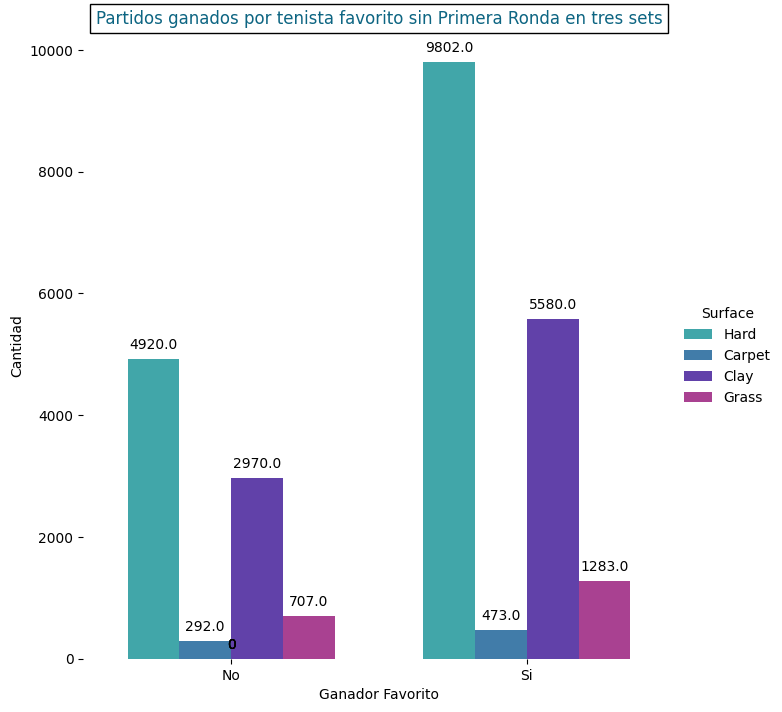

In [ ]:
#Filtro primera ronda de todas las superficies
# Visualizo de forma general para los encuentros sin primera ronda pero SOLO tres sets

sin_first_round = tres_sets[tres_sets['Round']!='1st Round']
a = sns.catplot(x='Ganador_favorito', data=sin_first_round, hue = 'Surface',
                palette=['#30b6ba','#307eba','#5a30ba','#ba309a'],       #color picker
                height=7, width=0.7, kind = "count")

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

plt.title('Partidos ganados por tenista favorito sin Primera Ronda en tres sets', loc = 'center', color= '#0d6582',bbox={'facecolor':'1', 'pad':4})


a.set(xticklabels = ['No', 'Si'],
      ylabel = 'Cantidad',
      xlabel = 'Ganador Favorito')

# Anotar cada barra con la cantidad
for p in a.ax.patches:
    a.ax.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points',
                  fontsize=10,
                  color='black')

**NOTA:**

El dataframe original, lo divido en dos grandes grupos. De acuerdo a la cantidad de Sets del torneo.

In [ ]:
# Dimension de los dos dataframes

print(tres_sets.shape)
print(cinco_sets.shape)

(46869, 31)
(10986, 31)


In [ ]:
#Filtro primera ronda de todas las superficies
# Visualizo ahora SOLO cinco sets

no_first_round = cinco_sets[cinco_sets['Round']!='1st Round']

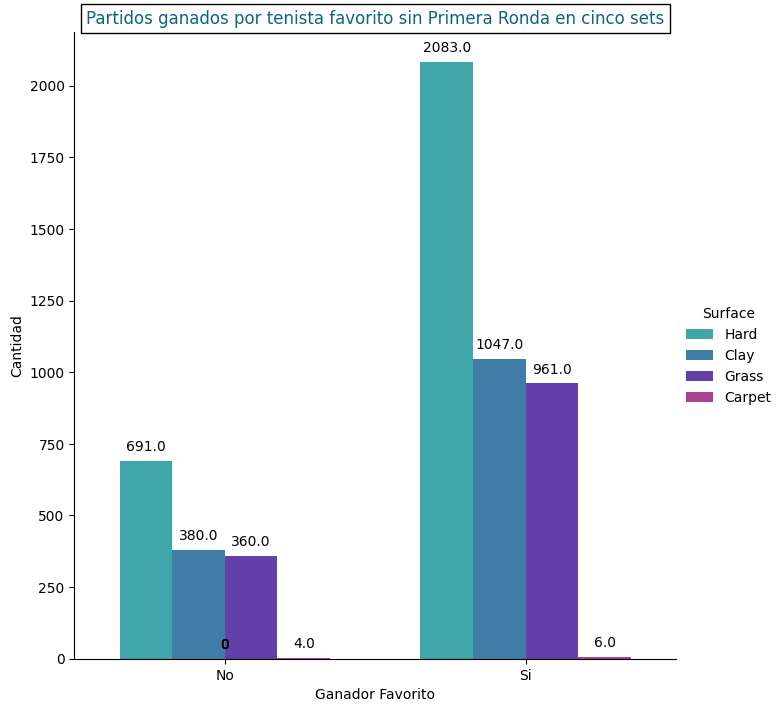

In [ ]:
# Visualizo
a = sns.catplot(x='Ganador_favorito', data=no_first_round, hue = 'Surface',
                palette=['#30b6ba','#307eba','#5a30ba','#ba309a'],       #color picker
                height=7, width=0.7, kind = "count")

plt.title('Partidos ganados por tenista favorito sin Primera Ronda en cinco sets', loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})



a.set(xticklabels = ['No', 'Si'],
      ylabel = 'Cantidad',
      xlabel = 'Ganador Favorito')

# Anotar cada barra con la cantidad
for p in a.ax.patches:
    a.ax.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points',
                  fontsize=10,
                  color='black')

**NOTA:**

Si bien todavia no podemos ratificar o rectificar la hipotesis, lo que vemos a simple vista es que el favorito a 5 sets sin contar primera ronda suele ser ganador a un porcentaje mucho mayor que a tres sets, independientemente de la superficie.

In [ ]:
# Dataframe de 5 sets sin la primera ronda
no_first_round.head()

Tournament       Date      Series Surface      Round  Cantidad_de_set  \
0  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
1  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
2  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
3  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
4  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   

         Player_1     Player_2          Winner  Rank_1  Rank_2  Pts_1  Pts_2  \
0        Safin M.     Pavel A.        Safin M.       2      26     -1     -1   
1         Popp A.  Woodruff C.     Woodruff C.      84      68     -1     -1   
2  Vinciguerra A.  Medvedev A.  Vinciguerra A.      52      59     -1     -1   
3        Canas G.    Tabara M.       Tabara M.     228      69     -1     -1   
4   Schuettler R.  Sargsian S.   Schuettler R.      58      95     -1     -1   

   Cuota_player1  Cuota_player2  ganador_ranking  Superficie  \
0       1.250000       3.175000                2           3   
1       2.175000       1.517500               68           3   
2       1.506667       2.333333               52           3   
3       2.037500       1.592500               69           3   
4       1.402500       2.520000               58           3   

   Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0              True          False                 24            1.925   
1              True          False                 16            0.657   
2              True          False                  7            0.827   
3              True          False                159            0.445   
4              True          False                 37            1.118   

   set1_player1  set1_player2  set2_player1  set2_player2  set3_player1  \
0             4             6             6             3             6   
1             6             4             3             6             4   
2             6             3             7             6             6   
3             6             7             3             6             2   
4             6             3             7             5             4   

   set3_player2  set4_player1  set4_player2  set5_player1  set5_player2  
0             4             7             6             0             0  
1             6             4             6             0             0  
2             2             0             0             0             0  
3             6             0             0             0             0  
4             6             6             4             0             0

In [ ]:
# Chequeo que este dataframe solo tenga partidos a 5 sets
no_first_round['Cantidad_de_set'].unique()

array([5])

In [ ]:
# Creo el dataframe correspondiente a este gran slam
cinco_set_hard = cinco_sets[cinco_sets['Surface']=='Hard']

In [ ]:
# Creo porcentajes sobre cada superficie, primero con el superficie dura a 5 sets
cinco_set_hard_porcentage = (len(cinco_set_hard[(cinco_set_hard['Surface']=='Hard')&(cinco_set_hard['Ganador_favorito']==False)])/len(cinco_set_hard[(cinco_set_hard['Surface']=='Hard')&(cinco_set_hard['Ganador_favorito']==True)]))*100

# Creo porcentajes sobre cada superficie, en este caso superficie dura, sin primera ronda.
hard_porcentage = (len(no_first_round[(no_first_round['Surface']=='Hard')&(no_first_round['Ganador_favorito']==False)])/len(no_first_round[(no_first_round['Surface']=='Hard')&(no_first_round['Ganador_favorito']==True)]))*100

# Repito lo mismo con la superficie Pasto
grass_porcentage = (len(no_first_round[(no_first_round['Surface']=='Grass')&(no_first_round['Ganador_favorito']==False)])/len(no_first_round[(no_first_round['Surface']=='Grass')&(no_first_round['Ganador_favorito']==True)]))*100

# Repito lo mismo con la superficie Polvo de Ladrillo
clay_porcentage = (len(no_first_round[(no_first_round['Surface']=='Clay')&(no_first_round['Ganador_favorito']==False)])/len(no_first_round[(no_first_round['Surface']=='Clay')&(no_first_round['Ganador_favorito']==True)]))*100

# Repito lo mismo con la superficie Carpeta
carpet_porcentage = (len(no_first_round[(no_first_round['Surface']=='Carpet')&(no_first_round['Ganador_favorito']==False)])/len(no_first_round[(no_first_round['Surface']=='Carpet')&(no_first_round['Ganador_favorito']==True)]))*100



**CONCLUSIONES:**

In [ ]:
print(f"El porcentaje de ganar de los NO favoritos ,en cancha dura, CON PRIMERA RONDA INCLUIDO , a cinco sets es: {cinco_set_hard_porcentage:.2f}%")
print(f"El porcentaje de ganar de los NO favoritos ,en cancha dura,SIN CONTAR PRIMERA RONDA, a cinco sets es: {hard_porcentage:.2f}%")
print(f"El porcentaje de ganar de los NO favoritos ,en cancha de pasto,SIN CONTAR PRIMERA RONDA, a cinco sets es: {grass_porcentage:.2f}%")
print(f"El porcentaje de ganar de los NO favoritos ,en cancha polvo de ladrillo,SIN CONTAR PRIMERA RONDA, a cinco sets es: {clay_porcentage:.2f}%")
print(f"El porcentaje de ganar de los NO favoritos ,en cancha de carpeta,SIN CONTAR PRIMERA RONDA, a cinco sets es: {carpet_porcentage:.2f}%")


El porcentaje de ganar de los NO favoritos ,en cancha dura, CON PRIMERA RONDA INCLUIDO , a cinco sets es: 37.72%
El porcentaje de ganar de los NO favoritos ,en cancha dura,SIN CONTAR PRIMERA RONDA, a cinco sets es: 33.17%
El porcentaje de ganar de los NO favoritos ,en cancha de pasto,SIN CONTAR PRIMERA RONDA, a cinco sets es: 37.46%
El porcentaje de ganar de los NO favoritos ,en cancha polvo de ladrillo,SIN CONTAR PRIMERA RONDA, a cinco sets es: 36.29%
El porcentaje de ganar de los NO favoritos ,en cancha de carpeta,SIN CONTAR PRIMERA RONDA, a cinco sets es: 66.67%


**NOTA:**

El porcentaje de victorias de favoritos suele ser mayor en canchas duras, a 5 sets, sin contar la primera ronda. Como muestran los porcentajes, los no favoritos, solo ganan en el 33,17% de los casos.
En el caso de superficie de carpeta, tiene un gran porcentaje de victoria los no favoritos, pero las muestras son muy pocas.

El dataframe con informacion de partidos a cinco sets, en superficie dura, corre con **ventaja**. La **desventaja** es que termina siendo una muestra seccionada de menos de 3000 muestras en un dataframe de 60000. (5%)

Para resolver la **Hipotesis 2** ahora que tengo separado por columnas los games de cada set, creo una funcion

In [ ]:
# Funcion
def fav(row):
    if row['Rank_1'] > row['Rank_2']:
        return 2
    else:
        return 1

# Aplico
cinco_sets['favorit_player'] = cinco_sets.apply(fav, axis=1)
tres_sets['favorit_player'] = tres_sets.apply(fav, axis=1)

In [ ]:
 # Funcion para saber si el favorito gano aun perdiendo primer set en 3 sets

def favorite(fila):
    if fila['favorit_player'] == 1 and fila['set1_player1'] < fila['set1_player2'] and fila['Ganador_favorito'] == True:
      return True
    elif fila['favorit_player'] == 2 and fila['set1_player1'] > fila['set1_player2'] and fila['Ganador_favorito'] == True:
      return True
    else:
      return False


# Aplico
tres_sets['0_1_y_gano'] = tres_sets.apply(favorite, axis=1)

In [ ]:
 # Funcion para saber si el favorito gano aun perdiendo primer set en 5 sets

def favorite(fila):
    if fila['favorit_player'] == 1 and fila['set1_player1'] < fila['set1_player2'] and fila['Ganador_favorito'] == True:
      return True
    elif fila['favorit_player'] == 2 and fila['set1_player1'] > fila['set1_player2'] and fila['Ganador_favorito'] == True:
      return True
    else:
      return False


# Aplico
cinco_sets['0_1_y_gano'] = cinco_sets.apply(favorite, axis=1)

In [ ]:
# Posible Dataframe que se utilizara en Modelo Machine Learning
df_hard_cinco_sets = no_first_round.copy()
df_hard_cinco_sets = df_hard_cinco_sets[(df_hard_cinco_sets['Surface']=='Hard')]
df_hard_cinco_sets.shape

(2774, 31)

In [ ]:
# Primera parte funcion

def contador (row):
  if row['favorit_player'] == 1 and row['set1_player1'] < row['set1_player2'] and row['set2_player1'] < row['set2_player2'] and row['set3_player1'] > row['set3_player2']:
    return 'D1-2'
  elif row['favorit_player'] == 1 and row['set1_player1'] > row['set1_player2'] and row['set2_player1'] < row['set2_player2'] and row['set3_player1'] < row['set3_player2']:
    return 'D1-2'
  elif row['favorit_player'] == 1 and row['set1_player1'] < row['set1_player2'] and row['set2_player1'] > row['set2_player2'] and row['set3_player1'] < row['set3_player2']:
    return 'D1-2'
  elif row['favorit_player'] == 2 and row['set1_player1'] > row['set1_player2'] and row['set2_player1'] < row['set2_player2'] and row['set3_player1'] > row['set3_player2']:
    return 'D1-2'
  elif row['favorit_player'] == 2 and row['set1_player1'] < row['set1_player2'] and row['set2_player1'] > row['set2_player2'] and row['set3_player1'] > row['set3_player2']:
    return 'D1-2'
  elif row['favorit_player'] == 2 and row['set1_player1'] > row['set1_player2'] and row['set2_player1'] > row['set2_player2'] and row['set3_player1'] < row['set3_player2']:
    return 'D1-2'
  else:
    return '0'

# Aplico
cinco_sets['en_desventaja'] = cinco_sets.apply(contador, axis=1)

In [ ]:
# Funcion para saber si el favorito gano aun perdiendo 1-2 en cinco sets

def favorite(fila):
    if fila['en_desventaja'] == 'D1-2' and fila['Ganador_favorito'] == True :
      return True
    else:
      return False


# Aplico
cinco_sets['1_2_y_gano'] = cinco_sets.apply(favorite, axis=1)

**NOTA:**

Debo crear otra columna con lo opuesto, para poder poder sacar el porcentaje. Porque sino la hipotesis estaria tomando datos erroneos. la explicacion es :
Por ejemplo, tres_sets['0_1_y_gano']==False contiene no solo los partidos que empezó 0-1 y perdio, sino tambien los que arranco 1-0 arriba y gano, o perdio. Por eso mismo hay que excluir estos ultimos, para que el porcentaje sea preciso.

In [ ]:
# Funcion para saber si el favorito gano el primer set en 5 sets y 3 sets

def favorite(fila):
    if fila['0_1_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 1 and fila['set1_player1'] > fila['set1_player2']:
      return True
    elif fila['0_1_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 2 and fila['set1_player1'] < fila['set1_player2']:
      return True
    else:
      return False

# Aplico
cinco_sets['gano_1set'] = cinco_sets.apply(favorite, axis=1)
tres_sets['gano_1set'] = tres_sets.apply(favorite, axis=1)

In [ ]:
# Funcion para saber si el favorito gano 2-1 o 2-0 en 5 sets

def favorite(fila):
    if fila['1_2_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 1 and fila['set1_player1'] > fila['set1_player2'] and fila['set2_player1'] > fila['set2_player2']:
      return True
    elif fila['1_2_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 1 and fila['set1_player1'] > fila['set1_player2'] and fila['set3_player1'] > fila['set3_player2']:
      return True
    elif fila['1_2_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 1 and fila['set2_player1'] > fila['set2_player2'] and fila['set3_player1'] > fila['set3_player2']:
      return True
    elif fila['1_2_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 2 and fila['set1_player1'] < fila['set1_player2'] and fila['set2_player1'] < fila['set2_player2']:
      return True
    elif fila['1_2_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 2 and fila['set1_player1'] < fila['set1_player2'] and fila['set3_player1'] < fila['set3_player2']:
      return True
    elif fila['1_2_y_gano'] == False and fila['Ganador_favorito']== True and fila['favorit_player']== 2 and fila['set2_player1'] < fila['set2_player2'] and fila['set3_player1'] < fila['set3_player2']:
      return True
    else:
      return False

# Aplico
cinco_sets['gano_2_0_o_2_1'] = cinco_sets.apply(favorite, axis=1)


In [ ]:
tres_sets.head()

Tournament       Date         Series    Court Surface      Round  \
0  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
1  AAPT Championships 2001-01-01  International  Outdoor    Hard  1st Round   
2  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
3  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   
4  AAPT Championships 2001-01-01  International  Outdoor    Hard  2nd Round   

   Cantidad_de_set   Player_1    Player_2     Winner  Rank_1  Rank_2  Pts_1  \
0                3    Haas T.    Smith L.    Haas T.      23     485     -1   
1                3  Hewitt L.  Arthurs W.  Hewitt L.       7      83     -1   
2                3    Haas T.  Malisse X.    Haas T.      23     127     -1   
3                3  Hewitt L.     Phau B.  Hewitt L.       7     208     -1   
4                3   Massu N.  Clement A.   Massu N.      87      18     -1   

   Pts_2  Cuota_player1  Cuota_player2   Score  Ganador  ganador_ranking  \
0     -1         1.1100          3.750    6363        1               23   
1     -1         1.2000          3.550    6463        1                7   
2     -1         1.2825          2.925    7563        1               23   
3     -1         1.1300          5.500  676460        1                7   
4     -1         2.4075          1.430    6262        1               87   

   Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0              True           True                462            2.640   
1              True           True                 76            2.350   
2              True          False                104            1.642   
3              True          False                201            4.370   
4             False          False                 69            0.978   

   Superficie  longitud_cadenas  set1_player1  set1_player2  set2_player1  \
0           3                 4             6             3             6   
1           3                 4             6             4             6   
2           3                 4             7             5             6   
3           3                 6             6             7             6   
4           3                 4             6             2             6   

   set2_player2  set3_player1  set3_player2  favorit_player  0_1_y_gano  \
0             3             0             0               1       False   
1             3             0             0               1       False   
2             3             0             0               1       False   
3             4             6             0               1        True   
4             2             0             0               2       False   

   gano_1set  
0       True  
1       True  
2       True  
3      False  
4      False

In [ ]:
cinco_sets.head()

Tournament       Date      Series Surface      Round  Cantidad_de_set  \
0  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
1  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
2  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
3  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   
4  Australian Open 2001-01-15  Grand Slam    Hard  2nd Round                5   

         Player_1     Player_2          Winner  Rank_1  Rank_2  Pts_1  Pts_2  \
0        Safin M.     Pavel A.        Safin M.       2      26     -1     -1   
1         Popp A.  Woodruff C.     Woodruff C.      84      68     -1     -1   
2  Vinciguerra A.  Medvedev A.  Vinciguerra A.      52      59     -1     -1   
3        Canas G.    Tabara M.       Tabara M.     228      69     -1     -1   
4   Schuettler R.  Sargsian S.   Schuettler R.      58      95     -1     -1   

   Cuota_player1  Cuota_player2  ganador_ranking  Superficie  \
0       1.250000       3.175000                2           3   
1       2.175000       1.517500               68           3   
2       1.506667       2.333333               52           3   
3       2.037500       1.592500               69           3   
4       1.402500       2.520000               58           3   

   Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0              True          False                 24            1.925   
1              True          False                 16            0.657   
2              True          False                  7            0.827   
3              True          False                159            0.445   
4              True          False                 37            1.118   

   set1_player1  set1_player2  set2_player1  set2_player2  set3_player1  \
0             4             6             6             3             6   
1             6             4             3             6             4   
2             6             3             7             6             6   
3             6             7             3             6             2   
4             6             3             7             5             4   

   set3_player2  set4_player1  set4_player2  set5_player1  set5_player2  \
0             4             7             6             0             0   
1             6             4             6             0             0   
2             2             0             0             0             0   
3             6             0             0             0             0   
4             6             6             4             0             0   

   favorit_player  0_1_y_gano en_desventaja  1_2_y_gano  gano_1set  \
0               1        True             0       False      False   
1               2        True             0       False      False   
2               1       False             0       False       True   
3               2       False             0       False       True   
4               1       False             0       False       True   

   gano_2_0_o_2_1  
0            True  
1            True  
2            True  
3            True  
4            True

In [ ]:
# Creo las variables relacionadas a la superficie Hard

hard_porc_vic_0_1_5sets = len(cinco_sets[(cinco_sets['Surface']=='Hard')& (cinco_sets['0_1_y_gano']==False)])
hard_porc_vic_0_1_5sets = hard_porc_vic_0_1_5sets - len(cinco_sets[(cinco_sets['Surface']=='Hard')& (cinco_sets['gano_1set']==True)])
hard_porc_vic_0_1_5sets = (len(cinco_sets[(cinco_sets['Surface']=='Hard')&(cinco_sets['0_1_y_gano']==True)]) / hard_porc_vic_0_1_5sets)*100


In [ ]:
hard_porc_vic_1_2 = len(cinco_sets[(cinco_sets['Surface']=='Hard')&(cinco_sets['1_2_y_gano']==False)])
hard_porc_vic_1_2 = hard_porc_vic_1_2 - len(cinco_sets[(cinco_sets['Surface']=='Hard')&(cinco_sets['gano_2_0_o_2_1']==True)])
hard_porc_vic_1_2 = (len(cinco_sets[(cinco_sets['Surface']=='Hard')&(cinco_sets['1_2_y_gano']==True)]) / hard_porc_vic_1_2)*100


In [ ]:
hard_porc_vic_0_1_3sets = len(tres_sets[(tres_sets['Surface']=='Hard')&(tres_sets['0_1_y_gano']==False)])
hard_porc_vic_0_1_3sets = hard_porc_vic_0_1_3sets - len(tres_sets[(tres_sets['Surface']=='Hard') & (tres_sets['gano_1set']==True)])
hard_porc_vic_0_1_3sets = (len(tres_sets[(tres_sets['Surface']=='Hard')&(tres_sets['0_1_y_gano']==True)]) / hard_porc_vic_0_1_3sets) *100


In [ ]:
# Creo las otras variables que me dan los porcentajes

porc_vic_0_1 = ((cinco_sets['0_1_y_gano']==True).sum()/((cinco_sets['0_1_y_gano']==False).sum() - (cinco_sets['gano_1set']==True).sum()))*100

porc_vic_1_2 = ((cinco_sets['1_2_y_gano']==True).sum() / ((cinco_sets['1_2_y_gano']==False).sum() - (cinco_sets['gano_2_0_o_2_1']==True).sum()))*100

porc_vic_0_1_3sets = ((tres_sets['0_1_y_gano']==True).sum()/((tres_sets['0_1_y_gano']==False).sum() - (tres_sets['gano_1set']==True).sum()))*100

In [ ]:
print(f"El porcentaje de ganar de los favoritos ,en cancha dura, a cinco sets, perdiendo 0-1 es: {hard_porc_vic_0_1_5sets:.2f}%")
print(f"El porcentaje de ganar de los favoritos, a cinco sets, en cualquier superficie, perdiendo 0-1 es: {porc_vic_0_1:.2f}%")

print(f"El porcentaje de ganar de los favoritos ,en cancha dura, a cinco sets, perdiendo 1-2 es: {hard_porc_vic_1_2:.2f}%")
print(f"El porcentaje de ganar de los favoritos ,en cancha dura, a tres sets, perdiendo 0-1 es: {hard_porc_vic_0_1_3sets:.2f}%")

print(f"El porcentaje de ganar de los favoritos, a cinco sets, en cualquier superficie, perdiendo 1-2 es: {porc_vic_1_2:.2f}%")
print(f"El porcentaje de ganar de los favoritos, a tres sets, en cualquier superficie, perdiendo 0-1 es: {porc_vic_0_1_3sets:.2f}%")

El porcentaje de ganar de los favoritos ,en cancha dura, a cinco sets, perdiendo 0-1 es: 52.30%
El porcentaje de ganar de los favoritos, a cinco sets, en cualquier superficie, perdiendo 0-1 es: 49.39%
El porcentaje de ganar de los favoritos ,en cancha dura, a cinco sets, perdiendo 1-2 es: 23.12%
El porcentaje de ganar de los favoritos ,en cancha dura, a tres sets, perdiendo 0-1 es: 31.92%
El porcentaje de ganar de los favoritos, a cinco sets, en cualquier superficie, perdiendo 1-2 es: 21.54%
El porcentaje de ganar de los favoritos, a tres sets, en cualquier superficie, perdiendo 0-1 es: 30.73%


**CONCLUSION HIPOTESIS 2:**

Queda reflejado que a 5 sets perdiendo el primer set los favoritos suelen recuperarse un poco mas de la mitad de las veces en superficie dura, sin importar la diferencia de ranking que haya entre ambos. En el general , sin importar la superficie ese porcentaje baja a 49%, pero hay una gran diferencia relacionandolo con 1-2.

Nuestra conclusion llega a que en cancha dura, o en cualquier superficie perdiendo 0-1 a tres sets sigue siendo mas probables de victoria (casi 32%) que 1-2 en 5 sets (23%)

In [ ]:
tres_sets.columns

Index(['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Cantidad_de_set', 'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2',
       'Pts_1', 'Pts_2', 'Cuota_player1', 'Cuota_player2', 'Score', 'Ganador',
       'ganador_ranking', 'Ganador_favorito', 'Primera_Ronda',
       'dif_rank_tenistas', 'dif_rank_cuotas', 'Superficie',
       'longitud_cadenas', 'set1_player1', 'set1_player2', 'set2_player1',
       'set2_player2', 'set3_player1', 'set3_player2', 'favorit_player',
       '0_1_y_gano', 'gano_1set'],
      dtype='object')

In [ ]:
# En este caso voy a agregar una columna mas a los dos datasets, la diferencia de juegos ganados en el partido.
cinco_sets['dif_games_ganados'] = np.abs((cinco_sets['set1_player1']+ cinco_sets['set2_player1']+cinco_sets['set3_player1']+cinco_sets['set4_player1']+cinco_sets['set5_player1'])
                    - (cinco_sets['set1_player2']+ cinco_sets['set2_player2']+cinco_sets['set3_player2']+cinco_sets['set4_player2']+cinco_sets['set5_player2']))

In [ ]:
tres_sets['dif_games_ganados'] = np.abs((tres_sets['set1_player1']+ tres_sets['set2_player1']+tres_sets['set3_player1'])
                    - (tres_sets['set1_player2']+ tres_sets['set2_player2']+tres_sets['set3_player2']))

In [ ]:
# Uso Label Encoder para categorizar las rondas del torneo, siendo las primeras rondas 0, y la final 6
le = LabelEncoder()
cinco_sets['Ronda'] = le.fit_transform(cinco_sets['Round'])
tres_sets['Ronda'] = le.fit_transform(tres_sets['Round'])

In [ ]:
#creo funcion para mostrar la cantidad de games del favorito en el primer set
def games_1set(row):
    if row['Rank_1'] < row['Rank_2']:
        return row['set1_player1']
    elif row['Rank_1'] > row['Rank_2']:
        return row['set1_player2']
    else:
        return None

# Creo la nueva columna 'cantidad'
cinco_sets['cant_games_1set'] =  cinco_sets.apply(games_1set, axis=1)
tres_sets['cant_games_1set'] =  tres_sets.apply(games_1set, axis=1)

In [ ]:
#creo funcion para mostrar la cantidad de games del favorito en el segundo set
def games_2set(row):
    if row['Rank_1'] < row['Rank_2']:
        return row['set2_player1']
    elif row['Rank_1'] > row['Rank_2']:
        return row['set2_player2']
    else:
        return None

# Creo la nueva columna 'cantidad'
cinco_sets['cant_games_2set'] =  cinco_sets.apply(games_2set, axis=1)
tres_sets['cant_games_2set'] =  tres_sets.apply(games_2set, axis=1)
cinco_sets['cant_games_1_2'] =  cinco_sets['cant_games_1set'] + cinco_sets['cant_games_2set']
tres_sets['cant_games_1_2'] =  tres_sets['cant_games_1set'] + tres_sets['cant_games_2set']

In [ ]:
#creo funcion para mostrar la cantidad de games del favorito en el primer set
def dif_points(row):
    if row['Rank_1'] < row['Rank_2']:
        return row['Pts_1'] - row['Pts_2'] #El que menos rankeado esta, mas puntos tiene
    elif row['Rank_1'] > row['Rank_2']:
        return row['Pts_2'] - row['Pts_1']
    else:
        return None

# Creo la nueva columna 'cantidad'
cinco_sets['dif_points'] =  cinco_sets.apply(dif_points, axis=1)
tres_sets['dif_points'] =  tres_sets.apply(dif_points, axis=1)

In [ ]:
# Voy definiendo las columnas que quiero en mi dataframe 5 sets
cinco_sets = cinco_sets[['Tournament', 'Date', 'Surface', 'Round', 'Cantidad_de_set','Player_1', 'Player_2', 'Winner', 'Rank_1',
                         'Rank_2','Pts_1', 'Pts_2', 'Cuota_player1','Cuota_player2', 'ganador_ranking', 'Superficie', 'Ganador_favorito',
                         'Primera_Ronda', 'dif_rank_tenistas', 'dif_rank_cuotas', 'set1_player1','set1_player2', 'set2_player1',
                         'set2_player2', 'set3_player1','set3_player2', 'set4_player1', 'set4_player2', 'set5_player1',
                         'set5_player2', '1_2_y_gano','dif_games_ganados','Ronda', 'cant_games_1set', 'cant_games_2set',
                         'cant_games_1_2', 'dif_points']]

In [ ]:
# Voy definiendo las columnas que quiero en mi dataframe 3 sets
tres_sets = tres_sets[['Tournament', 'Date', 'Surface', 'Round',
       'Cantidad_de_set', 'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'Score', 'Ganador', 'ganador_ranking',
       'Ganador_favorito', 'Primera_Ronda', 'dif_rank_tenistas',
       'dif_rank_cuotas', 'Superficie', 'set1_player1',
       'set1_player2', 'set2_player1', 'set2_player2', 'set3_player1',
       'set3_player2', '0_1_y_gano','dif_games_ganados','Ronda', 'cant_games_1set',
       'cant_games_2set', 'cant_games_1_2', 'dif_points']]

## **11 - DATAFRAME EXTRAIDO DE APIs:**

In [ ]:
clave = userdata.get('') #ingresar mi codigo personal entre ''

In [ ]:
url = "https://ultimate-tennis1.p.rapidapi.com/global_players_stats/serve/2024/hard"

headers = {
	"X-RapidAPI-Key": clave,
	"X-RapidAPI-Host": "ultimate-tennis1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

{'Season': '2024', 'Surface': 'hard', 'category': 'serve', 'data': [{'AvgAcesPerMatch': '15.5', 'AvgAcesPerMatchSortField': 15.5, 'AvgDblFaultsPerMatch': '1.9', 'AvgDblFaultsPerMatchSortField': 1.9, 'FirstServePct': '64.5%', 'FirstServePctSortField': 64.5, 'FirstServePointsWonPct': '80.2%', 'FirstServePointsWonPctSortField': 80.2, 'PlayerId': 'HB71', 'PlayerName': 'Hubert Hurkacz', 'SecondServePointsWonPct': '56.7%', 'SecondServePointsWonPctSortField': 56.7, 'ServeRating': '306.5', 'ServeRatingSortField': 306.5, 'ServiceGamesWonPct': '91.5%', 'ServiceGamesWonPctSortField': 91.5}, {'AvgAcesPerMatch': '9.0', 'AvgAcesPerMatchSortField': 9.0, 'AvgDblFaultsPerMatch': '1.4', 'AvgDblFaultsPerMatchSortField': 1.4, 'FirstServePct': '73.6%', 'FirstServePctSortField': 73.6, 'FirstServePointsWonPct': '74.6%', 'FirstServePointsWonPctSortField': 74.6, 'PlayerId': 'Z355', 'PlayerName': 'Alexander Zverev', 'SecondServePointsWonPct': '56.2%', 'SecondServePointsWonPctSortField': 56.2, 'ServeRating': '30

In [ ]:
response.status_code

200

In [ ]:
# Transformo en json
ATP = response.json()

In [ ]:
ATP.keys()

dict_keys(['Season', 'Surface', 'category', 'data'])

In [ ]:
# Cargar el diccionario JSON en un DataFrame
df2024 = pd.DataFrame(ATP['data'])
df2024.head(10)

AvgAcesPerMatch  AvgAcesPerMatchSortField AvgDblFaultsPerMatch  \
0            15.5                      15.5                  1.9   
1             9.0                       9.0                  1.4   
2             5.8                       5.8                  1.7   
3             9.9                       9.9                  2.0   
4             8.6                       8.6                  2.3   
5             8.4                       8.4                  1.6   
6            10.3                      10.3                  2.5   
7             3.9                       3.9                  1.5   
8             6.5                       6.5                  1.5   
9             6.2                       6.2                  1.2   

   AvgDblFaultsPerMatchSortField FirstServePct  FirstServePctSortField  \
0                            1.9         64.5%                    64.5   
1                            1.4         73.6%                    73.6   
2                            1.7         62.2%                    62.2   
3                            2.0         72.8%                    72.8   
4                            2.3         66.2%                    66.2   
5                            1.6         64.1%                    64.1   
6                            2.5         65.3%                    65.3   
7                            1.5         66.4%                    66.4   
8                            1.5         66.0%                    66.0   
9                            1.2         67.2%                    67.2   

  FirstServePointsWonPct  FirstServePointsWonPctSortField PlayerId  \
0                  80.2%                             80.2     HB71   
1                  74.6%                             74.6     Z355   
2                  79.0%                             79.0     S0AG   
3                  73.0%                             73.0     E865   
4                  80.4%                             80.4     D875   
5                  75.8%                             75.8     RE44   
6                  75.5%                             75.5     P09Z   
7                  75.8%                             75.8     A0E2   
8                  75.8%                             75.8     RH16   
9                  71.8%                             71.8     HH26   

            PlayerName SecondServePointsWonPct  \
0       Hubert Hurkacz                   56.7%   
1     Alexander Zverev                   56.2%   
2        Jannik Sinner                   59.6%   
3  Christopher Eubanks                   55.6%   
4      Grigor Dimitrov                   55.0%   
5        Andrey Rublev                   59.5%   
6       Alexei Popyrin                   57.1%   
7       Carlos Alcaraz                   59.3%   
8          Casper Ruud                   55.2%   
9          Ugo Humbert                   58.3%   

   SecondServePointsWonPctSortField ServeRating  ServeRatingSortField  \
0                              56.7       306.5                 306.5   
1                              56.2       302.1                 302.1   
2                              59.6       298.7                 298.7   
3                              55.6       298.4                 298.4   
4                              55.0       298.3                 298.3   
5                              59.5       297.5                 297.5   
6                              57.1       294.0                 294.0   
7                              59.3       293.2                 293.2   
8                              55.2       292.4                 292.4   
9                              58.3       289.6                 289.6   

  ServiceGamesWonPct  ServiceGamesWonPctSortField  
0              91.5%                         91.5  
1              90.1%                         90.1  
2              93.8%                         93.8  
3              89.1%                         89.1  
4              90.4%                         90.4  


## **12 - PREPARACION DEL DATAFRAME FINAL:**

###**Primera Visualizacion**

In [ ]:
# Filtro el dataframe cinco_sets solo para piso duro, que es el que mejores predicciones dió
cinco_set_hard = cinco_sets.loc[cinco_sets['Surface']=='Hard']

# Para utilizar solo los registros donde Pts_1 y Pts_2 son validos, lo filtro por diferencia de puntos
cinco_set_hard = cinco_set_hard.loc[cinco_set_hard['dif_points']!=0].reset_index(drop=True)

In [ ]:
cinco_set_hard['Ganador_favorito'].value_counts()

Ganador_favorito
True     3267
False    1198
Name: count, dtype: int64

In [ ]:
cinco_set_hard.head()

Tournament       Date Surface      Round  Cantidad_de_set      Player_1  \
0    US Open 2005-08-29    Hard  1st Round                5      Young D.   
1    US Open 2005-08-29    Hard  1st Round                5  Johansson T.   
2    US Open 2005-08-29    Hard  1st Round                5    Behrend T.   
3    US Open 2005-08-29    Hard  1st Round                5      Coria G.   
4    US Open 2005-08-29    Hard  1st Round                5     Martin A.   

        Player_2         Winner  Rank_1  Rank_2  Pts_1  Pts_2  Cuota_player1  \
0  Galimberti G.  Galimberti G.     600     236     33    159           2.75   
1    Zabaleta M.   Johansson T.      14      72   1460    515           1.25   
2    Bjorkman J.    Bjorkman J.      89     111    455    393           4.00   
3    Mantilla F.       Coria G.       8     105   1765    410           1.06   
4     Gasquet R.     Gasquet R.      61      13    617   1489           7.00   

   Cuota_player2  ganador_ranking  Superficie  Ganador_favorito  \
0           1.39              236           3              True   
1           3.75               14           3              True   
2           1.22              111           3             False   
3           8.00                8           3              True   
4           1.08               13           3              True   

   Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  set1_player1  \
0           True                364             1.36             6   
1           True                 58             2.50             6   
2           True                 22             2.78             3   
3           True                 97             6.94             7   
4           True                 48             5.92             2   

   set1_player2  set2_player1  set2_player2  set3_player1  set3_player2  \
0             7             1             6             2             6   
1             3             6             4             6             3   
2             6             3             6             0             6   
3             6             6             1             6             3   
4             6             3             6             6             1   

   set4_player1  set4_player2  set5_player1  set5_player2  1_2_y_gano  \
0             0             0             0             0       False   
1             0             0             0             0       False   
2             0             0             0             0       False   
3             0             0             0             0       False   
4             7             6             4             6       False   

   dif_games_ganados  Ronda  cant_games_1set  cant_games_2set  cant_games_1_2  \
0                 10      0                7                6              13   
1                  8      0                6                6              12   
2                 12      0                3                3               6   
3                  9      0                7                6              13   
4                  3      0                6                6              12   

   dif_points  
0         126  
1         945  
2          62  
3        1355  
4         872

In [ ]:
cinco_set_hard.columns

Index(['Tournament', 'Date', 'Surface', 'Round', 'Cantidad_de_set', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'ganador_ranking', 'Superficie',
       'Ganador_favorito', 'Primera_Ronda', 'dif_rank_tenistas',
       'dif_rank_cuotas', 'set1_player1', 'set1_player2', 'set2_player1',
       'set2_player2', 'set3_player1', 'set3_player2', 'set4_player1',
       'set4_player2', 'set5_player1', 'set5_player2', '1_2_y_gano',
       'dif_games_ganados', 'Ronda', 'cant_games_1set', 'cant_games_2set',
       'cant_games_1_2', 'dif_points'],
      dtype='object')

In [ ]:
# Armo dataframe con todas variables float o int para el heatmap correlation

cinco_sets_hard1 = cinco_set_hard[[ 'Cantidad_de_set', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'ganador_ranking', 'Superficie',
       'Ronda', 'dif_rank_tenistas', 'dif_rank_cuotas', 'cant_games_1set',
       'dif_points', 'Ganador_favorito','dif_games_ganados','cant_games_1set','cant_games_2set']]

In [ ]:
# Calcular la matriz de correlación
corr_matrix = cinco_sets_hard1.corr()

# Crear el mapa de calor con Plotly Express
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale=valores_colores,  # Usar tus colores personalizados
                text_auto=True,  # Mostrar valores de correlación automáticamente

               )

# Personalizar el diseño
fig.update_layout(title={
        'text': 'Heatmap del Dataframe "cinco_set_hard"',
        'y':0.95,  # Ajusta la posición vertical del título si es necesario
        'x':0.5,  # Centra el título horizontalmente
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    title_x=0.5,  # Centrar el título
    width=1200,  # Ajustar el ancho (aproximadamente 20 pulgadas)
    height=1200  # Ajustar el alto (aproximadamente 15 pulgadas)
)

fig.show()

**NOTA:**

Como era esperable, existe correlacion alta entre dif_rank_cuotas y dif_points. Es decir, a mayor diferencia de puntos entre los tenistas mayor es la diferencia entre ambas cuotas de las casas de apuestas.

In [ ]:
#2 dataframe concatenado de todos los registros por año de la API Rapidapi ultimate_tennis
dataframe_concat = pd.read_csv('/content/drive/MyDrive/Coderhouse/DATA SCIENCE/Proyecto_JMM/Datasets_Jorge_Mariano_Miro/csv_utilizados/dataframe_concatenado_hard.csv')
dataframe_concat.head()

AvgAcesPerMatch  AvgAcesPerMatchSortField  AvgDblFaultsPerMatch  \
0             13.1                      13.1                   5.1   
1             14.3                      14.3                   4.9   
2             10.1                      10.1                   2.5   
3             10.1                      10.1                   3.4   
4              5.3                       5.3                   2.8   

   AvgDblFaultsPerMatchSortField FirstServePct  FirstServePctSortField  \
0                            5.1         62.0%                    62.0   
1                            4.9         54.7%                    54.7   
2                            2.5         52.3%                    52.3   
3                            3.4         62.6%                    62.6   
4                            2.8         61.6%                    61.6   

  FirstServePointsWonPct  FirstServePointsWonPctSortField PlayerId  \
0                  82.1%                             82.1     S402   
1                  81.3%                             81.3     P338   
2                  79.2%                             79.2     K293   
3                  76.2%                             76.2     M595   
4                  74.7%                             74.7     A092   

           PlayerName SecondServePointsWonPct  \
0        Pete Sampras                   53.8%   
1  Mark Philippoussis                   53.3%   
2     Gustavo Kuerten                   54.9%   
3          Max Mirnyi                   50.4%   
4        Andre Agassi                   55.9%   

   SecondServePointsWonPctSortField  ServeRating  ServeRatingSortField  \
0                              53.8        297.8                 297.8   
1                              53.3        286.0                 286.0   
2                              54.9        282.1                 282.1   
3                              50.4        281.3                 281.3   
4                              55.9        281.2                 281.2   

  ServiceGamesWonPct  ServiceGamesWonPctSortField   año  
0              91.9%                         91.9  2000  
1              87.3%                         87.3  2000  
2              88.1%                         88.1  2000  
3              85.4%                         85.4  2000  
4              86.5%                         86.5  2000

In [ ]:
# Elimino el signo '%' de las columnas FirstServePct , FirstServePointsWonPct , SecondServePointsWonPct
# ServiceGamesWonPct y los convierto a float
dataframe_concat['FirstServePct'] = dataframe_concat['FirstServePct'].str.rstrip('%').astype(float)
dataframe_concat['FirstServePointsWonPct'] = dataframe_concat['FirstServePointsWonPct'].str.rstrip('%').astype(float)
dataframe_concat['SecondServePointsWonPct'] = dataframe_concat['SecondServePointsWonPct'].str.rstrip('%').astype(float)
dataframe_concat['ServiceGamesWonPct'] = dataframe_concat['ServiceGamesWonPct'].str.rstrip('%').astype(float)

In [ ]:
# elijo las columnas que necesito y voy a utilizar
dataframe_concat = dataframe_concat[['PlayerName','AvgAcesPerMatch','AvgDblFaultsPerMatch','FirstServePct','FirstServePointsWonPct','SecondServePointsWonPct',
                  'ServeRating','ServiceGamesWonPct','año']]

In [ ]:
# Armo dataframe con todas variables float o int para el heatmap correlation del dataframe dataframe_concat

dataframe_concat1 = dataframe_concat[['AvgAcesPerMatch','AvgDblFaultsPerMatch','FirstServePct','FirstServePointsWonPct','SecondServePointsWonPct',
                  'ServeRating','ServiceGamesWonPct','año']]

In [ ]:
custom_colors = valores_colores
cmap = ListedColormap(custom_colors)

# Creamos la figura con Plotly Express
fig = px.imshow(
    dataframe_concat1.corr(),  # Matriz de correlación
    x=dataframe_concat1.columns,  # Etiquetas del eje x
    y=dataframe_concat1.columns,  # Etiquetas del eje y
    color_continuous_scale=cmap.colors,  # Usamos los colores personalizados
    text_auto=True,  # Muestra los valores automáticamente
    aspect="auto",  # Ajusta las proporciones para que los cuadrados se vean bien
)

# Personalizamos el título
fig.update_layout(
    title={
        'text': 'Heatmap del Dataframe "dataframe_concat"',
        'y':0.97,  # Ajusta la posición vertical del título si es necesario
        'x':0.5,  # Centra el título horizontalmente
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    width=1000,  # Ajustar el ancho (aproximadamente 20 pulgadas)
    height=800  # Ajustar el alto (aproximadamente 15 pulgadas)
)


fig.show()

**NOTA:**

Se nota una correlacion clara y alta entre el porcentaje de puntos ganados en primer servicio (FirstServePointsWonPct) y ServeRating, que refiere a un rating que ponen en la atp. Algo parecido ocurre con (FirstServePointsWonPct) y promedio de aces por partido (AverageAcesPerMatch)

###**Trabajo unificacion de datos**

In [ ]:
dataframe_concat[['AvgAcesPerMatch', 'AvgDblFaultsPerMatch',
       'FirstServePct',
       'FirstServePointsWonPct',
       'PlayerName','año']]

AvgAcesPerMatch  AvgDblFaultsPerMatch  FirstServePct  \
0                13.1                   5.1           62.0   
1                14.3                   4.9           54.7   
2                10.1                   2.5           52.3   
3                10.1                   3.4           62.6   
4                 5.3                   2.8           61.6   
...               ...                   ...            ...   
1476              3.2                   2.0           73.2   
1477              3.0                   3.7           54.9   
1478              8.0                   5.0           66.7   
1479              5.8                   3.8           60.8   
1480              2.0                   6.0           55.7   

      FirstServePointsWonPct           PlayerName   año  
0                       82.1         Pete Sampras  2000  
1                       81.3   Mark Philippoussis  2000  
2                       79.2      Gustavo Kuerten  2000  
3                       76.2           Max Mirnyi  2000  
4                       74.7         Andre Agassi  2000  
...                      ...                  ...   ...  
1476                    60.7       Sebastian Baez  2024  
1477                    72.9         Daniel Evans  2024  
1478                    68.6          Laslo Djere  2024  
1479                    64.8  Francisco Cerundolo  2024  
1480                    74.4       Aslan Karatsev  2024  

[1481 rows x 6 columns]

In [ ]:
# Agrupar por PlayerName y año, luego calcular la media
dataframe_concat.groupby(['PlayerName', 'año']).mean().reset_index()


PlayerName   año  AvgAcesPerMatch  AvgDblFaultsPerMatch  \
0     Adrian Mannarino  2008              4.0                   2.0   
1     Adrian Mannarino  2009              6.5                   2.5   
2     Adrian Mannarino  2010              7.6                   3.0   
3     Adrian Mannarino  2011              3.6                   3.2   
4     Adrian Mannarino  2012              4.1                   2.7   
...                ...   ...              ...                   ...   
1476     Zhizhen Zhang  2018              9.0                   3.0   
1477     Zhizhen Zhang  2019              7.8                   0.6   
1478     Zhizhen Zhang  2022              7.4                   1.4   
1479     Zhizhen Zhang  2023              8.2                   2.2   
1480     Zhizhen Zhang  2024              8.0                   2.2   

      FirstServePct  FirstServePointsWonPct  SecondServePointsWonPct  \
0              58.4                    72.1                     50.0   
1              47.9                    70.1                     45.2   
2              58.8                    71.1                     48.1   
3              58.6                    68.7                     48.8   
4              60.9                    67.3                     40.2   
...             ...                     ...                      ...   
1476           59.6                    66.0                     41.7   
1477           65.3                    71.4                     54.7   
1478           64.6                    72.2                     56.3   
1479           63.0                    73.3                     50.3   
1480           64.2                    71.2                     49.5   

      ServeRating  ServiceGamesWonPct  
0           263.3                80.8  
1           230.8                63.6  
2           258.6                76.0  
3           249.2                72.7  
4           233.6                63.8  
...           ...                 ...  
1476        242.5                69.2  
1477        284.1                85.5  
1478        282.3                83.2  
1479        274.0                81.4  
1480        269.6                78.9  

[1481 rows x 9 columns]

**NOTA:**

La concatenacion de los dos dataframes se va a hacer a traves del nombre del jugador y el año. Para que eso suceda, los nombres de los jugadores en ambos dataframes tienen que ser iguales.

In [ ]:
# Contabilizo cuantos nombres son
cinco_set_hard['Player_1'].nunique()

548

In [ ]:
cinco_set_hard['Player_2'].nunique()

541

In [ ]:
# Lo mismo para el otro dataframe
dataframe_concat['PlayerName'].nunique()

304

In [ ]:
cinco_set_hard['Player_1'].unique()

array(['Young D.', 'Johansson T.', 'Behrend T.', 'Coria G.', 'Martin A.',
       'Luczak P.', 'Jenkins S.', 'Andreev I.', 'Youzhny M.', 'Novak J.',
       'Chela J.I.', 'Gambill J.M.', 'Baker B.', 'Summerer T.',
       'Hernych J.', 'Saulnier C.', 'Kohlschreiber P.', 'Nadal R.',
       'Okun N.', 'Mello R.', 'Bogomolov A.', 'Wessels P.', 'Arthurs W.',
       'Nieminen J.', 'Lapentti N.', 'Ferrero J.C.', 'Pavel A.',
       'Phau B.', 'Moodie W.', 'Tursunov D.', 'Gimelstob J.', 'Rochus O.',
       'Santoro F.', 'Kuerten G.', 'Weiner G.', 'Grosjean S.',
       'Schuettler R.', 'Mathieu P.H.', 'Djokovic N.', 'Lee H.T.',
       'Federer R.', 'Henman T.', 'Lopez F.', 'Sabau R.', 'Karlovic I.',
       'Bracciali D.', 'Rusedski G.', 'Ram R.', 'Kiefer N.', 'Calleri A.',
       'Kucera K.', 'Dent T.', 'Seppi A.', 'Acasuso J.', 'Almagro N.',
       'Kim K.', 'Muller G.', 'Garcia-Lopez G.', 'Srichaphan P.',
       'Zib T.', 'Serra F.', 'Costa A.', 'Puerta M.', 'Soderling R.',
       'Spadea V.', '

In [ ]:
dataframe_concat['PlayerName'].unique()

array(['Pete Sampras', 'Mark Philippoussis', 'Gustavo Kuerten',
       'Max Mirnyi', 'Andre Agassi', 'Jan-Michael Gambill', 'Tim Henman',
       'Roger Federer', 'Younes El Aynaoui', 'Greg Rusedski',
       'Marcelo Rios', 'Dominik Hrbaty', 'Marc Rosset', 'Magnus Norman',
       'Lleyton Hewitt', 'Wayne Ferreira', 'Carlos Moya', 'Byron Black',
       'Marat Safin', 'Thomas Enqvist', 'Nicolas Escude',
       'Andreas Vinciguerra', 'Sebastien Grosjean', 'Francisco Clavet',
       'Jerome Golmard', 'Alex Corretja', 'Albert Costa',
       'Thomas Johansson', 'Nicolas Kiefer', 'Andrei Pavel',
       'Hicham Arazi', 'Chris Woodruff', 'Jonas Bjorkman',
       'Arnaud Clement', 'Yevgeny Kafelnikov', 'Stefan Koubek',
       'Goran Ivanisevic', 'Nicolas Lapentti', 'Sjeng Schalken',
       'Jiri Novak', 'Karim Alami', 'Juan Carlos Ferrero',
       'Michael Chang', 'Paul Goldstein', 'Gianluca Pozzi',
       'Fabrice Santoro', 'Harel Levy', 'Karol Kucera', 'Andrew Ilie',
       'Mariano Zabaleta', 

**NOTA:**

En cinco_set_hard['Player_1'], los datos estan primero por apellido y el nombre solo la primera letra. En dataframe_concat['PlayerName'], esta primero el nombre completo, y luego el apellido. Para que funcione tenemos que invertir los datos y solo dejar las iniciales del nombre original.


    Ejemplo:
    
    En cinco_set_hard['Player_1'].unique()

    Sampras P.


    En dataframe_concat['PlayerName'].unique()

    Pete Sampras


In [ ]:
# Invertir el dato Nombre y Apellido del la columna cinco_set_hard['Player_1']
cinco_set_hard['Last_Name'] = cinco_set_hard['Player_1'].apply(lambda x: x.split()[0])
cinco_set_hard['First_Name'] = cinco_set_hard['Player_1'].apply(lambda x: ' '.join(x.split()[1:]))

# Unir las partes en el orden deseado
cinco_set_hard['Player_1'] = cinco_set_hard['First_Name'] + ' ' + cinco_set_hard['Last_Name']

# Eliminar las columnas temporales
cinco_set_hard.drop(['First_Name', 'Last_Name'], axis=1, inplace=True)

In [ ]:
cinco_set_hard['Player_1'].unique()

array(['D. Young', 'T. Johansson', 'T. Behrend', 'G. Coria', 'A. Martin',
       'P. Luczak', 'S. Jenkins', 'I. Andreev', 'M. Youzhny', 'J. Novak',
       'J.I. Chela', 'J.M. Gambill', 'B. Baker', 'T. Summerer',
       'J. Hernych', 'C. Saulnier', 'P. Kohlschreiber', 'R. Nadal',
       'N. Okun', 'R. Mello', 'A. Bogomolov', 'P. Wessels', 'W. Arthurs',
       'J. Nieminen', 'N. Lapentti', 'J.C. Ferrero', 'A. Pavel',
       'B. Phau', 'W. Moodie', 'D. Tursunov', 'J. Gimelstob', 'O. Rochus',
       'F. Santoro', 'G. Kuerten', 'G. Weiner', 'S. Grosjean',
       'R. Schuettler', 'P.H. Mathieu', 'N. Djokovic', 'H.T. Lee',
       'R. Federer', 'T. Henman', 'F. Lopez', 'R. Sabau', 'I. Karlovic',
       'D. Bracciali', 'G. Rusedski', 'R. Ram', 'N. Kiefer', 'A. Calleri',
       'K. Kucera', 'T. Dent', 'A. Seppi', 'J. Acasuso', 'N. Almagro',
       'K. Kim', 'G. Muller', 'G. Garcia-Lopez', 'P. Srichaphan',
       'T. Zib', 'F. Serra', 'A. Costa', 'M. Puerta', 'R. Soderling',
       'V. Spadea', '

In [ ]:
# Invertir el dato Nombre y Apellido del la columna cinco_set_hard['Player_1']
cinco_set_hard['Last_Name_'] = cinco_set_hard['Player_2'].apply(lambda x: x.split()[0])
cinco_set_hard['First_Name_'] = cinco_set_hard['Player_2'].apply(lambda x: ' '.join(x.split()[1:]))

# Unir las partes en el orden deseado
cinco_set_hard['Player_2'] = cinco_set_hard['First_Name_'] + ' ' + cinco_set_hard['Last_Name_']

# Eliminar las columnas temporales
cinco_set_hard.drop(['First_Name_', 'Last_Name_'], axis=1, inplace=True)

In [ ]:
# Función para formatear los nombres de dataframe_concat['PlayerName']
def formatear_nombre(nombre):
    partes = nombre.split()
    nombre_formateado = partes[0][0] + '.'
    if len(partes) > 1:
        nombre_formateado += ' ' + '-'.join(partes[1:])
    return nombre_formateado

# Aplicar la función al DataFrame
dataframe_concat['PlayerName'] = dataframe_concat['PlayerName'].apply(formatear_nombre)


In [ ]:
# Lo primero que hago es crear dos listas para ver cuantos de los datos coinciden, y cuantos tendre que renombrar

lista1 = list(cinco_set_hard['Player_1'].unique())
lista2 = list(dataframe_concat['PlayerName'].unique())

# Convertimos las listas en conjuntos
conjunto1 = set(lista1)
conjunto2 = set(lista2)

# Elementos que coinciden en ambas listas
coincidencias = conjunto1.intersection(conjunto2)
print(f"Elementos que coinciden en ambas listas: {coincidencias}")

# Elementos únicos en la lista 1 (Player_1)
unicos_lista1 = conjunto1.difference(conjunto2)
print(f"Elementos únicos en la lista 1: {unicos_lista1}")

# Elementos únicos en la lista 2
unicos_lista2 = conjunto2.difference(conjunto1)
print(f"Elementos únicos en la lista 2: {unicos_lista2}")

Elementos que coinciden en ambas listas: {'D. Sanguinetti', 'B. Reynolds', 'J. Sousa', 'A. Bublik', 'R. Albot', 'I. Dodig', 'B. Nakashima', 'A. Popyrin', 'H. Rune', 'M. Raonic', 'S. Koubek', 'P. Petzschner', 'F. Fognini', 'A. Rublev', 'E. Korolev', 'A. Kuznetsov', 'P. Goldstein', 'E. Roger-Vasselin', 'A. Fils', 'M. Kecmanovic', 'A. Mannarino', 'A. Costa', 'D. Ferrer', 'K. Vliegen', 'B. Paire', 'H. Chung', 'L. Musetti', 'S. Stakhovsky', 'T. Daniel', 'P. Cuevas', 'M. Youzhny', 'N. Almagro', 'S. Johnson', 'F. Tiafoe', 'C. Moya', 'M. Philippoussis', 'J. Isner', 'R. Nadal', 'F. Verdasco', 'L. Rosol', 'S. Baez', 'A. Falla', 'R. Soderling', 'D. Koepfer', 'A. Roddick', 'G. Canas', 'T. Griekspoor', 'T. Berdych', 'M. Klizan', 'F. Delbonis', 'D. Hrbaty', 'J. Chardy', 'M. Purcell', 'F. Mayer', 'I. Ivashka', 'X. Malisse', 'B. Coric', 'N. Davydenko', 'T. Gabashvili', 'J. Draper', 'C. Guccione', 'T. Paul', 'J. Munar', 'M. Arnaldi', 'S. Querrey', 'A. Rinderknech', 'P. Carreno-Busta', 'A. Golubev', 'M.

In [ ]:
# hago lo mismo con Player_2 y PlayerName

lista3 = list(cinco_set_hard['Player_2'].unique())
lista2 = list(dataframe_concat['PlayerName'].unique())

# Convertimos las listas en conjuntos
conjunto3 = set(lista3)
conjunto2 = set(lista2)

# Elementos que coinciden en ambas listas
coincidencias_ = conjunto3.intersection(conjunto2)
print(f"Elementos que coinciden en ambas listas: {coincidencias_}")

# Elementos únicos en la lista 3 (Player_2)
unicos_lista3 = conjunto3.difference(conjunto2)
print(f"Elementos únicos en la lista 3: {unicos_lista3}")

# Elementos únicos en la lista 2
unicos_lista2 = conjunto2.difference(conjunto3)
print(f"Elementos únicos en la lista 2: {unicos_lista2}")

Elementos que coinciden en ambas listas: {'D. Sanguinetti', 'B. Reynolds', 'J. Sousa', 'A. Bublik', 'R. Albot', 'I. Dodig', 'B. Nakashima', 'A. Popyrin', 'H. Rune', 'M. Raonic', 'S. Koubek', 'P. Petzschner', 'F. Fognini', 'A. Rublev', 'E. Korolev', 'A. Kuznetsov', 'P. Goldstein', 'E. Roger-Vasselin', 'M. Kecmanovic', 'A. Mannarino', 'K. Vliegen', 'D. Ferrer', 'B. Paire', 'H. Chung', 'L. Musetti', 'S. Stakhovsky', 'T. Daniel', 'P. Cuevas', 'M. Youzhny', 'N. Almagro', 'S. Johnson', 'F. Tiafoe', 'C. Moya', 'M. Philippoussis', 'J. Isner', 'R. Nadal', 'F. Verdasco', 'L. Rosol', 'S. Baez', 'A. Falla', 'R. Soderling', 'D. Koepfer', 'A. Roddick', 'G. Canas', 'T. Griekspoor', 'T. Berdych', 'M. Klizan', 'F. Delbonis', 'D. Hrbaty', 'J. Chardy', 'M. Purcell', 'F. Mayer', 'I. Ivashka', 'X. Malisse', 'B. Coric', 'N. Davydenko', 'T. Gabashvili', 'J. Draper', 'C. Guccione', 'T. Paul', 'J. Munar', 'M. Arnaldi', 'S. Querrey', 'A. Rinderknech', 'P. Carreno-Busta', 'A. Golubev', 'M. Zverev', 'H. Levy', 'K

In [ ]:
# Busco los datos de cinco_set_hard['Player_1'] (conjunto1), para cambiarlos debajo en reemplazos en conjunto2

conjunt = unicos_lista1

def buscar_nombre(nombre):
    resultados = [nombre_completo for nombre_completo in conjunt if nombre.lower() in nombre_completo.lower()]
    return resultados


In [ ]:
#dato_insertar = input("Inserte el dato: ")

#resultados = buscar_nombre(dato_insertar)

#if resultados:
#    print("Los resultados son:")
#    for resultado in resultados:
#        print(resultado)
#else:
#    print("No se encontraron coincidencias.")

In [ ]:
reemplazos_en_dataframe_cinco_set = {'Jr. A. Bogomolov':'Jr.A. Bogomolov'}

# Aplico los reemplazos a la columna
cinco_set_hard['Player_1'] = cinco_set_hard['Player_1'].replace(reemplazos_en_dataframe_cinco_set)
cinco_set_hard['Player_2'] = cinco_set_hard['Player_2'].replace(reemplazos_en_dataframe_cinco_set)

In [ ]:
reemplazos = {'A. Dolgopolov': 'O. Dolgopolov', 'J. Carlos-Ferrero':'J.C. Ferrero', 'H. Lee':'H.T. Lee',
              'J. Martin-del-Potro':'Potro J.M. Del', 'T. Martin-Etcheverry':'T. Etcheverry',
              'T. de-Bakker':'Bakker T. De', 'Y. Lu':'Y.H. Lu', 'B. van-de-Zandschulp':'De Zandschulp B. Van',
              'J. Tsonga':'J.W. Tsonga', 'M. McDonald':'M. Mcdonald', 'P. Herbert':'P.H. Herbert', 'A. de-Minaur':'Minaur A. De',
'J. Wolf':'J.J. Wolf', 'A. Bogomolov-Jr.':'Jr.A. Bogomolov', 'R. Bautista-Agut':'Agut R. Bautista', 'S. Kwon':'S.W. Kwon',
'A. Davidovich-Fokina':'Fokina A. Davidovich', 'J. Struff':'J.L. Struff', 'J. Ignacio-Chela':'J.I. Chela',
              'P. Mathieu':'P.H. Mathieu', 'J. Gambill':'J.M. Gambill', 'Y. El-Aynaoui':'Aynaoui Y. El'}


# Aplica los reemplazos_ a la columna
dataframe_concat['PlayerName'] = dataframe_concat['PlayerName'].replace(reemplazos)

###**Concatenacion Dataframe Final**

In [ ]:
cinco_set_hard["Date"].head()

0   2005-08-29
1   2005-08-29
2   2005-08-29
3   2005-08-29
4   2005-08-29
Name: Date, dtype: datetime64[ns]

In [ ]:
# Crear una nueva columna con solo el año

cinco_set_hard["Año"] = cinco_set_hard['Date'].dt.year


In [ ]:
# Copio el dataframe

dataframe_concat_B = dataframe_concat.copy()

In [ ]:
# Renombrar las columnas del dataframe
dataframe_concat = dataframe_concat.rename(columns={'PlayerName': 'PlayerNameP1','AvgAcesPerMatch': 'PromAcesPorPartP1', 'AvgDblFaultsPerMatch': 'PromDblFaltasPorPartP1',
                                                    'FirstServePct': '%PrimerServP1', 'FirstServePointsWonPct': '%PtosGanPrimerServP1',
                                                    'SecondServePointsWonPct': '%PtosGanSegunServP1', 'ServiceGamesWonPct': '%ServGanP1',
                                                    'ServeRating':'ServeRatingP1'})
dataframe_concat_B = dataframe_concat_B.rename(columns={'PlayerName': 'PlayerNameP2','AvgAcesPerMatch': 'PromAcesPorPartP2', 'AvgDblFaultsPerMatch': 'PromDblFaltasPorPartP2',
                                                    'FirstServePct': '%PrimerServP2', 'FirstServePointsWonPct': '%PtosGanPrimerServP2',
                                                    'SecondServePointsWonPct': '%PtosGanSegunServP2', 'ServiceGamesWonPct': '%ServGanP2',
                                                    'ServeRating':'ServeRatingP2','año':'year'})

In [ ]:
dataframe_concat_B.head()

PlayerNameP2  PromAcesPorPartP2  PromDblFaltasPorPartP2  %PrimerServP2  \
0        P. Sampras               13.1                     5.1           62.0   
1  M. Philippoussis               14.3                     4.9           54.7   
2        G. Kuerten               10.1                     2.5           52.3   
3         M. Mirnyi               10.1                     3.4           62.6   
4         A. Agassi                5.3                     2.8           61.6   

   %PtosGanPrimerServP2  %PtosGanSegunServP2  ServeRatingP2  %ServGanP2  year  
0                  82.1                 53.8          297.8        91.9  2000  
1                  81.3                 53.3          286.0        87.3  2000  
2                  79.2                 54.9          282.1        88.1  2000  
3                  76.2                 50.4          281.3        85.4  2000  
4                  74.7                 55.9          281.2        86.5  2000

In [ ]:
cinco_set_hard.columns

Index(['Tournament', 'Date', 'Surface', 'Round', 'Cantidad_de_set', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'ganador_ranking', 'Superficie',
       'Ganador_favorito', 'Primera_Ronda', 'dif_rank_tenistas',
       'dif_rank_cuotas', 'set1_player1', 'set1_player2', 'set2_player1',
       'set2_player2', 'set3_player1', 'set3_player2', 'set4_player1',
       'set4_player2', 'set5_player1', 'set5_player2', '1_2_y_gano',
       'dif_games_ganados', 'Ronda', 'cant_games_1set', 'cant_games_2set',
       'cant_games_1_2', 'dif_points', 'Año'],
      dtype='object')

In [ ]:
dataframe_concat.columns

Index(['PlayerNameP1', 'PromAcesPorPartP1', 'PromDblFaltasPorPartP1',
       '%PrimerServP1', '%PtosGanPrimerServP1', '%PtosGanSegunServP1',
       'ServeRatingP1', '%ServGanP1', 'año'],
      dtype='object')

In [ ]:
dataframe_concat_B.columns

Index(['PlayerNameP2', 'PromAcesPorPartP2', 'PromDblFaltasPorPartP2',
       '%PrimerServP2', '%PtosGanPrimerServP2', '%PtosGanSegunServP2',
       'ServeRatingP2', '%ServGanP2', 'year'],
      dtype='object')

In [ ]:
cinco_set_hard.shape

(4465, 38)

In [ ]:
# Combinar los dataframes en base a las columnas 'Año' y 'PlayerName'

# Primero mergeo con el df dataframe_concat para los datos de los player_1 del dataframe cinco_set_hard
cinco_set_hard = pd.merge(cinco_set_hard, dataframe_concat, left_on=['Player_1', 'Año'], right_on=['PlayerNameP1', 'año'], how='left')

# Luego mergeo con el df dataframe_concat_B para los datos de los player_2 del dataframe cinco_set_hard
cinco_set_hard = pd.merge(cinco_set_hard, dataframe_concat_B, left_on=['Player_2', 'Año'], right_on=['PlayerNameP2', 'year'], how='left')

# Eliminar las columnas redundantes
cinco_set_hard.drop(['año', 'year','PlayerNameP1', 'PlayerNameP2' ], axis=1, inplace=True)

In [ ]:
cinco_set_hard.shape

(4465, 52)

In [ ]:
# Muestro el dataframe con los NaN
cinco_set_hard

Tournament       Date Surface          Round  Cantidad_de_set  \
0       US Open 2005-08-29    Hard      1st Round                5   
1       US Open 2005-08-29    Hard      1st Round                5   
2       US Open 2005-08-29    Hard      1st Round                5   
3       US Open 2005-08-29    Hard      1st Round                5   
4       US Open 2005-08-29    Hard      1st Round                5   
...         ...        ...     ...            ...              ...   
4460    US Open 2023-09-06    Hard  Quarterfinals                5   
4461    US Open 2023-09-07    Hard  Quarterfinals                5   
4462    US Open 2023-09-08    Hard     Semifinals                5   
4463    US Open 2023-09-09    Hard     Semifinals                5   
4464    US Open 2023-09-10    Hard      The Final                5   

          Player_1       Player_2         Winner  Rank_1  Rank_2  Pts_1  \
0         D. Young  G. Galimberti  Galimberti G.     600     236     33   
1     T. Johansson    M. Zabaleta   Johansson T.      14      72   1460   
2       T. Behrend    J. Bjorkman    Bjorkman J.      89     111    455   
3         G. Coria    F. Mantilla       Coria G.       8     105   1765   
4        A. Martin     R. Gasquet     Gasquet R.      61      13    617   
...            ...            ...            ...     ...     ...    ...   
4460   D. Medvedev      A. Rublev    Medvedev D.       3       8   6260   
4461     A. Zverev     C. Alcaraz     Alcaraz C.      12       1   2670   
4462   N. Djokovic     B. Shelton    Djokovic N.       2      47   9795   
4463    C. Alcaraz    D. Medvedev    Medvedev D.       1       3   9815   
4464   N. Djokovic    D. Medvedev    Djokovic N.       2       3   9795   

      Pts_2  Cuota_player1  Cuota_player2  ganador_ranking  Superficie  \
0       159           2.75           1.39              236           3   
1       515           1.25           3.75               14           3   
2       393           4.00           1.22              111           3   
3       410           1.06           8.00                8           3   
4      1489           7.00           1.08               13           3   
...     ...            ...            ...              ...         ...   
4460   4515           1.36           3.20                3           3   
4461   9815           4.50           1.20                1           3   
4462   1015           1.06          10.00                2           3   
4463   6260           1.22           4.33                3           3   
4464   6260           1.44           2.88                2           3   

      Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0                 True           True                364             1.36   
1                 True           True                 58             2.50   
2                False           True                 22             2.78   
3                 True           True                 97             6.94   
4                 True           True                 48             5.92   
...                ...            ...                ...              ...   
4460              True          False                  5             1.84   
4461              True          False                 11             3.30   
4462              True          False                 45             8.94   
4463             False          False                  2             3.11   
4464              True          False                  1             1.44   

      set1_player1  set1_player2  set2_player1  set2_player2  set3_player1  \
0                6             7             1             6             2   
1                6             3             6             4             6   
2                3             6             3             6             0   
3                7             6             6             1             6   
4                2             6             3             

**NOTA:**

Las nuevas Columnas traen consigo muchos datos nulos, debido a que no estan todos los tenistas en un dataframe y en el otro. Para mermar el impacto de los NaN, trabajare sobre eso sobre la opcion mas viable que posiblemente sea .mean() de cada año en cada columna

In [ ]:
# Preparo los datos para rellenar los datos faltantes

media_por_año = dataframe_concat.copy()
media_por_año = media_por_año.drop(columns=['PlayerNameP1'],axis = 1)

# Agrupar por año y calcular la media de cada columna
media_por_año = media_por_año.groupby('año').mean()
media_por_año = media_por_año.round(1)

In [ ]:
# Dataframe con los datos mean
media_por_año

PromAcesPorPartP1  PromDblFaltasPorPartP1  %PrimerServP1  \
año                                                              
2000                6.6                     3.4           56.2   
2001                6.8                     3.4           57.2   
2002                6.8                     3.3           58.4   
2003                6.4                     3.1           59.4   
2004                7.8                     3.4           60.0   
2005                6.6                     3.2           59.3   
2006                5.9                     2.7           59.5   
2007                6.8                     2.6           59.8   
2008                6.9                     2.6           60.8   
2009                6.9                     2.7           60.3   
2010                7.0                     2.8           60.1   
2011                6.7                     2.9           60.2   
2012                6.7                     2.8           60.5   
2013                7.1                     3.0           60.3   
2014                6.8                     3.1           60.6   
2015                7.7                     3.1           59.7   
2016                6.8                     3.3           59.5   
2017                6.8                     3.3           59.8   
2018                7.7                     3.3           60.6   
2019                7.6                     3.0           62.3   
2020                6.9                     2.9           62.7   
2021                7.1                     2.9           62.2   
2022                7.1                     2.8           63.2   
2023                6.9                     2.7           62.4   
2024                8.1                     2.6           63.1   

      %PtosGanPrimerServP1  %PtosGanSegunServP1  ServeRatingP1  %ServGanP1  
año                                                                         
2000                  73.8                 52.0          265.6        80.4  
2001                  73.1                 51.8          265.6        80.1  
2002                  73.0                 51.5          266.2        79.9  
2003                  72.8                 52.2          268.0        80.4  
2004                  73.9                 52.0          272.7        82.3  
2005                  73.1                 51.8          268.1        80.5  
2006                  71.8                 51.8          265.7        79.4  
2007                  73.3                 52.0          270.1        80.7  
2008                  73.2                 52.1          271.8        81.4  
2009                  73.3                 51.1          269.3        80.4  
2010                  73.2                 51.8          270.4        81.0  
2011                  73.0                 51.6          268.8        80.2  
2012                  71.9                 51.4          266.9        79.3  
2013                  72.8                 51.0          268.5        80.3  
2014                  73.2                 51.2          269.5        80.8  
2015                  73.3                 51.8          270.0        80.6  
2016                  73.3                 51.2          267.3        79.9  
2017                  72.8                 50.6          266.1        79.4  
2018                  73.0                 50.8          268.9        80.1  
2019                  73.4                 51.6          273.2        81.4  
2020                  72.1                 50.1          268.6        79.7  
2021                  72.6                 50.9          270.2        80.2  
2022                  73.0                 51.0          272.6        81.2  
2023                  73.4                 51.9          274.3        82.2  
2024                  73.8                 52.8          278.4        83.2

**NOTA:**

De los que no se encuentran datos suelen ser jugadores de mas del top 100. Por eso los datos para fillna deben ser en un porcentaje menor a la media.

Ejemplo:

PromAcesPorPart 50% menos

PromDblFaltasPorPart igual

%PrimerServ 10% menos

%PtosGanPrimerServ 10%menos

%PtosGanSegunServ 15%menos

ServeRating 15%menos

%ServGan 20%menos

Por eso modifico esos datos

In [ ]:
# Codifico de acuerdo a lo escrito arriba

media_por_año['PromAcesPorPartP1'] = media_por_año['PromAcesPorPartP1'].apply(lambda x: x * 0.50)
media_por_año['%PrimerServP1'] = media_por_año['%PrimerServP1'].apply(lambda x: x * 0.9)
media_por_año['%PtosGanPrimerServP1'] = media_por_año['%PtosGanPrimerServP1'].apply(lambda x: x * 0.9)
media_por_año['%PtosGanSegunServP1'] = media_por_año['%PtosGanSegunServP1'].apply(lambda x: x * 0.85)
media_por_año['ServeRatingP1'] = media_por_año['ServeRatingP1'].apply(lambda x: x * 0.85)
media_por_año['%ServGanP1'] = media_por_año['%ServGanP1'].apply(lambda x: x * 0.8)

In [ ]:
media_por_año2 = media_por_año.copy()

In [ ]:
media_por_año2 = media_por_año2.rename(columns={'PromAcesPorPartP1':'PromAcesPorPartP2', 'PromDblFaltasPorPartP1':'PromDblFaltasPorPartP2',
                                                        '%PrimerServP1':'%PrimerServP2','%PtosGanPrimerServP1':'%PtosGanPrimerServP2',
                                                        '%PtosGanSegunServP1':'%PtosGanSegunServP2', 'ServeRatingP1':'ServeRatingP2',
                                                        '%ServGanP1':'%ServGanP2'})

In [ ]:
# Duplicar todas las columnas
media_por_año = pd.concat([media_por_año, media_por_año2], axis=1)

In [ ]:
# con este dataframe la media de cada columna dependiendo de cada año, hare el fillna() de mi dataframe final

media_por_año

PromAcesPorPartP1  PromDblFaltasPorPartP1  %PrimerServP1  \
año                                                              
2000               3.30                     3.4          50.58   
2001               3.40                     3.4          51.48   
2002               3.40                     3.3          52.56   
2003               3.20                     3.1          53.46   
2004               3.90                     3.4          54.00   
2005               3.30                     3.2          53.37   
2006               2.95                     2.7          53.55   
2007               3.40                     2.6          53.82   
2008               3.45                     2.6          54.72   
2009               3.45                     2.7          54.27   
2010               3.50                     2.8          54.09   
2011               3.35                     2.9          54.18   
2012               3.35                     2.8          54.45   
2013               3.55                     3.0          54.27   
2014               3.40                     3.1          54.54   
2015               3.85                     3.1          53.73   
2016               3.40                     3.3          53.55   
2017               3.40                     3.3          53.82   
2018               3.85                     3.3          54.54   
2019               3.80                     3.0          56.07   
2020               3.45                     2.9          56.43   
2021               3.55                     2.9          55.98   
2022               3.55                     2.8          56.88   
2023               3.45                     2.7          56.16   
2024               4.05                     2.6          56.79   

      %PtosGanPrimerServP1  %PtosGanSegunServP1  ServeRatingP1  %ServGanP1  \
año                                                                          
2000                 66.42               44.200        225.760       64.32   
2001                 65.79               44.030        225.760       64.08   
2002                 65.70               43.775        226.270       63.92   
2003                 65.52               44.370        227.800       64.32   
2004                 66.51               44.200        231.795       65.84   
2005                 65.79               44.030        227.885       64.40   
2006                 64.62               44.030        225.845       63.52   
2007                 65.97               44.200        229.585       64.56   
2008                 65.88               44.285        231.030       65.12   
2009                 65.97               43.435        228.905       64.32   
2010                 65.88               44.030        229.840       64.80   
2011                 65.70               43.860        228.480       64.16   
2012                 64.71               43.690        226.865       63.44   
2013                 65.52               43.350        228.225       64.24   
2014                 65.88               43.520        229.075       64.64   
2015                 65.97               44.030        229.500       64.48   
2016                 65.97               43.520        227.205       63.92   
2017                 65.52               43.010        226.185       63.52   
2018                 65.70               43.180        228.565       64.08   
2019                 66.06               43.860        232.220       65.12   
2020                 64.89               42.585        228.310       63.76   
2021                 65.34               43.265        229.670       64.16   
2022                 65.70               43.350        231.710       64.96   
2023                 66.06               44.115        233.155       65.76   
2024                 66.42               44.880        236.640       66.56   

      PromAcesPorPartP2  PromDblFaltasPorPartP2  %PrimerServP2  \
año                                               

In [ ]:
# Relleno los datos nulos con el porcentaje menor a la media del año de todos los tenistas

def rellenar_datos_nulos(cinco_set_hard, media_por_año):
    # Iterar sobre las columnas del DataFrame cinco_set_hard
    for columna in cinco_set_hard.columns:
        # Filtrar los datos nulos en la columna actual
        datos_nulos = cinco_set_hard[columna].isnull()
        # Obtener los años donde los datos son nulos
        años_nulos = cinco_set_hard.loc[datos_nulos, 'Año']
        # Iterar sobre los años nulos
        for año in años_nulos:
            # Obtener el valor correspondiente del DataFrame media_por_año
            valor = media_por_año.loc[año, columna]
            # Asignar el valor al DataFrame cinco_set_hard
            cinco_set_hard.loc[(cinco_set_hard['Año'] == año) & datos_nulos, columna] = valor

    return cinco_set_hard



# Llamo a la función para rellenar los datos nulos en cinco_set_hard
cinco_set_hard = rellenar_datos_nulos(cinco_set_hard, media_por_año)

**NOTA:**

Una vez agregada estas columnas creo las siguientes variables, que son importantes para la optimizacion del algoritmo final.

In [ ]:
# Creo columna con la diferencia entre los dos jugadores
def PromAcesxPart(row):
    if row['PromAcesPorPartP1'] > row['PromAcesPorPartP2']:
        return np.abs(row['PromAcesPorPartP1'] - row['PromAcesPorPartP2'])
    elif row['PromAcesPorPartP1'] < row['PromAcesPorPartP2']:
        return np.abs(row['PromAcesPorPartP2'] - row['PromAcesPorPartP1'])
    else:
        return 0

# Creo la nueva columna 'DifPromAcesPorPart'
cinco_set_hard['DifPromAcesPorPart'] = cinco_set_hard.apply(PromAcesxPart, axis=1)

In [ ]:
# Creo otra columna con la diferencia entre los dos tenistas
def Porc1erserv(row):
    if row['%PrimerServP1'] > row['%PrimerServP2']:
        return np.abs(row['%PrimerServP1'] - row['%PrimerServP2'])
    elif row['%PrimerServP1'] < row['%PrimerServP2']:
        return np.abs(row['%PrimerServP2'] - row['%PrimerServP1'])
    else:
        return 0

# Creo la nueva columna 'DifPorcPrimServ'
cinco_set_hard['DifPorcPrimServ'] = cinco_set_hard.apply(Porc1erserv, axis=1)

In [ ]:
# Creo otra columna con la diferencia entre los dos tenistas
def PorcPtosGanados1erserv(row):
    if row['%PtosGanPrimerServP1'] > row['%PtosGanPrimerServP2']:
        return np.abs(row['%PtosGanPrimerServP1'] - row['%PtosGanPrimerServP2'])
    elif row['%PtosGanPrimerServP1'] < row['%PtosGanPrimerServP2']:
        return np.abs(row['%PtosGanPrimerServP2'] - row['%PtosGanPrimerServP1'])
    else:
        return 0

# Creo la nueva columna 'DifPorcPtosGanados1erserv'
cinco_set_hard['DifPorcPtosGanados1erserv'] = cinco_set_hard.apply(PorcPtosGanados1erserv, axis=1)

In [ ]:
# Creo otra columna con la diferencia entre los dos tenistas
def PorcPtosGanados2doserv(row):
    if row['%PtosGanSegunServP1'] > row['%PtosGanSegunServP2']:
        return np.abs(row['%PtosGanSegunServP1'] - row['%PtosGanSegunServP2'])
    elif row['%PtosGanSegunServP1'] < row['%PtosGanSegunServP2']:
        return np.abs(row['%PtosGanSegunServP2'] - row['%PtosGanSegunServP1'])
    else:
        return 0

# Creo la nueva columna 'DifPorcPtosGanados2doserv'
cinco_set_hard['DifPorcPtosGanados2doserv'] = cinco_set_hard.apply(PorcPtosGanados2doserv, axis=1)

In [ ]:
# Creo otra columna con la diferencia entre los dos tenistas
def PorcServGanad(row):
    if row['%ServGanP1'] > row['%ServGanP2']:
        return np.abs(row['%ServGanP1'] - row['%ServGanP2'])
    elif row['%ServGanP1'] < row['%ServGanP2']:
        return np.abs(row['%ServGanP2'] - row['%ServGanP1'])
    else:
        return 0

# Creo la nueva columna 'DifPorcServGan'
cinco_set_hard['DifPorcServGan'] = cinco_set_hard.apply(PorcServGanad, axis=1)

In [ ]:
# Ajustamos las columnas Pts_1 y Pts_2 sin los outliers
fig = px.box(cinco_set_hard, y="Pts_1", color_discrete_sequence=["#30b6ba"])
fig.update_layout(title="Datos de la Columna Pts_1",title_x=0.5,title_font_color="#0d6582",width=800,height=600)
fig.show()

**NOTA:**

Con la informacion del 75% de mis datos (Q1 a Q3), establezco mis limites de outliers y defino mis datos.

In [ ]:
# Ploty Pts_2
fig = px.box(cinco_set_hard, y="Pts_2", color_discrete_sequence=["#307eba"])
fig.update_layout(title="Datos de la Columna Pts_2",title_x=0.5,title_font_color="#0d6582",width=800,height=600)
fig.show()

**NOTA:**

Lo mismo ocurre con Pts_2 y mis outliers

In [ ]:
cinco_set_hard.shape

(4465, 57)

**NOTA:**

Elijo cual de las dos opciones es mas conveniente para mi evalucion.

1 - Eliminando los ouliers y solo trabajar con el 75% de los datos

2 - Dejarlos si no enfieren rotundamente y quedarme con mayor cantidad de datos.

In [ ]:
# Opcion 1 seria definir mis datos en las columnas Pts_1 y Pts_2
# cinco_set_hard = cinco_set_hard.loc[(cinco_set_hard['Pts_1']<=3710)&(cinco_set_hard['Pts_2']<=3710)].reset_index(drop=True)

In [ ]:
cinco_set_hard.shape

(4465, 57)

In [ ]:
# Coeficiente Phi para Nominal vs Nominal en dataframe cinco_sets_hard
# 'Ganador_favorito' (Nominal) y 'Ronda' (Nominal)
# Ronda es Nominal, pero trabaja como en el algoritmo lo uso como ordinal, cuanto mas alto es el numero, mas lejos llego en el torneo

phi_coefficient = pearsonr(cinco_set_hard['Ronda'],cinco_set_hard['Ganador_favorito'])[0]
print('phi_coefficient: ', phi_coefficient)

# Coeficiente biserial puntual para Nominal vs Numérico
# 'Ganador_favorito' (Nominal) y 'DifPromAcesPorPart' (Numérico)

biserial_coefficient = pointbiserialr(cinco_set_hard['Ganador_favorito'], cinco_set_hard['DifPromAcesPorPart'])[0]
print('biserial_coefficient: ', biserial_coefficient)

# Coeficiente Spearman para Ordinal vs Ordinal
# 'Ronda' (Ordinal) y 'ganador_ranking' (Ordinal)

spearman_coefficient = spearmanr(cinco_set_hard['Ronda'], cinco_set_hard['ganador_ranking'])[0]
print('spearman_coefficient: ', spearman_coefficient)

# Coeficiente Pearson para Numérico vs Numérico
# 'ganador_ranking' (Numérico) y 'DifPorcServGan' (Numérico)

pearson_coefficient = pearsonr(cinco_set_hard['ganador_ranking'], cinco_set_hard['DifPorcServGan'])[0]
print('pearson_coefficient: ', pearson_coefficient)

phi_coefficient:  0.0446891628874155
biserial_coefficient:  0.07652892827788284
spearman_coefficient:  -0.4676298112269795
pearson_coefficient:  -0.23816955163784104


**NOTA:**

Elijo las variables que son de utilidad y elimino las que ya no utilizare.

In [ ]:
cinco_set_hard = cinco_set_hard[['Tournament', 'Date', 'Surface', 'Round', 'Cantidad_de_set', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'ganador_ranking', 'Superficie',
       'Ganador_favorito', 'Primera_Ronda', 'dif_rank_tenistas',
       'dif_rank_cuotas','dif_games_ganados', 'Ronda', 'cant_games_1set', 'cant_games_2set',
       'cant_games_1_2', 'dif_points', 'Año', 'PromAcesPorPartP1',
       'PromDblFaltasPorPartP1', '%PrimerServP1', '%PtosGanPrimerServP1',
       '%PtosGanSegunServP1', 'ServeRatingP1', '%ServGanP1',
       'PromAcesPorPartP2', 'PromDblFaltasPorPartP2', '%PrimerServP2',
       '%PtosGanPrimerServP2', '%PtosGanSegunServP2', 'ServeRatingP2',
       '%ServGanP2', 'DifPromAcesPorPart', 'DifPorcPrimServ',
       'DifPorcPtosGanados1erserv', 'DifPorcPtosGanados2doserv',
       'DifPorcServGan']]

In [ ]:
# Dataframe Final
cinco_set_hard

Tournament       Date Surface          Round  Cantidad_de_set  \
0       US Open 2005-08-29    Hard      1st Round                5   
1       US Open 2005-08-29    Hard      1st Round                5   
2       US Open 2005-08-29    Hard      1st Round                5   
3       US Open 2005-08-29    Hard      1st Round                5   
4       US Open 2005-08-29    Hard      1st Round                5   
...         ...        ...     ...            ...              ...   
4460    US Open 2023-09-06    Hard  Quarterfinals                5   
4461    US Open 2023-09-07    Hard  Quarterfinals                5   
4462    US Open 2023-09-08    Hard     Semifinals                5   
4463    US Open 2023-09-09    Hard     Semifinals                5   
4464    US Open 2023-09-10    Hard      The Final                5   

          Player_1       Player_2         Winner  Rank_1  Rank_2  Pts_1  \
0         D. Young  G. Galimberti  Galimberti G.     600     236     33   
1     T. Johansson    M. Zabaleta   Johansson T.      14      72   1460   
2       T. Behrend    J. Bjorkman    Bjorkman J.      89     111    455   
3         G. Coria    F. Mantilla       Coria G.       8     105   1765   
4        A. Martin     R. Gasquet     Gasquet R.      61      13    617   
...            ...            ...            ...     ...     ...    ...   
4460   D. Medvedev      A. Rublev    Medvedev D.       3       8   6260   
4461     A. Zverev     C. Alcaraz     Alcaraz C.      12       1   2670   
4462   N. Djokovic     B. Shelton    Djokovic N.       2      47   9795   
4463    C. Alcaraz    D. Medvedev    Medvedev D.       1       3   9815   
4464   N. Djokovic    D. Medvedev    Djokovic N.       2       3   9795   

      Pts_2  Cuota_player1  Cuota_player2  ganador_ranking  Superficie  \
0       159           2.75           1.39              236           3   
1       515           1.25           3.75               14           3   
2       393           4.00           1.22              111           3   
3       410           1.06           8.00                8           3   
4      1489           7.00           1.08               13           3   
...     ...            ...            ...              ...         ...   
4460   4515           1.36           3.20                3           3   
4461   9815           4.50           1.20                1           3   
4462   1015           1.06          10.00                2           3   
4463   6260           1.22           4.33                3           3   
4464   6260           1.44           2.88                2           3   

      Ganador_favorito  Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  \
0                 True           True                364             1.36   
1                 True           True                 58             2.50   
2                False           True                 22             2.78   
3                 True           True                 97             6.94   
4                 True           True                 48             5.92   
...                ...            ...                ...              ...   
4460              True          False                  5             1.84   
4461              True          False                 11             3.30   
4462              True          False                 45             8.94   
4463             False          False                  2             3.11   
4464              True          False                  1             1.44   

      dif_games_ganados  Ronda  cant_games_1set  cant_games_2set  \
0                    10      0                7                6   
1                     8      0                6                6   
2                    12      0                3                3   
3                     9      0                7                6   
4                     3      0                6                6   
...                 ...    ...           

## **13 - DESBALANCEO DE CLASES :**

In [ ]:
# Desbalanceo de datos

cinco_set_hard['Ganador_favorito'].value_counts()

Ganador_favorito
True     3267
False    1198
Name: count, dtype: int64

**NOTA:**

El conjunto de datos esta dentro de **Clase Balanceada**: 1:1 hasta 1:3

## **14 - PRUEBA DE ALGORITMOS:**

### **NO SUPERVISADO**

###**K-means**

**NOTA:**

Para probar este modelo, modifique el dataframe de torneos a 5sets con el fin de jugar un poco y cambiar el objetivo . Y asi poder adaptarlo mas especificamente a los tenistas y no tanto a si gana el favorito o no gana.

In [ ]:
# Creo un nuevo df con estas variables, extraidas del df cinco_sets_hard
p1 = cinco_sets['Player_1'].value_counts().sort_index().reset_index()
p2 = cinco_sets['Player_2'].value_counts().sort_index().reset_index()
win = cinco_sets['Winner'].value_counts().sort_index().reset_index()

In [ ]:
p1

Player_1  count
0               Abel M.      1
1            Acasuso J.     18
2          Agamenone F.      1
3             Agassi A.     44
4              Alami K.      1
..                  ...    ...
786         di Mauro A.      2
787      di Pasquale A.      3
788     van Gemerden M.      3
789       van Lottum J.      7
790  van Scheppingen D.      3

[791 rows x 2 columns]

In [ ]:
p2

Player_2  count
0            Acasuso J.     22
1         Adaktusson J.      1
2             Agassi A.     42
3            Aguilar J.      1
4              Alami K.      2
..                  ...    ...
753         di Mauro A.      6
754      di Pasquale A.      5
755     van Gemerden M.      1
756       van Lottum J.      4
757  van Scheppingen D.      1

[758 rows x 2 columns]

In [ ]:
win

Winner  count
0         Acasuso J.     12
1          Agassi A.     68
2           Alami K.      1
3           Albot R.     15
4         Alcaraz C.     39
..               ...    ...
640    de Chaunac S.      1
641      di Mauro A.      2
642   di Pasquale A.      3
643  van Gemerden M.      1
644    van Lottum J.      3

[645 rows x 2 columns]

In [ ]:
# Renombrar las columnas para que coincidan
p1 = p1.rename(columns={'Player_1': 'Player'})
p2 = p2.rename(columns={'Player_2': 'Player'})

In [ ]:
win = win.rename(columns={'Winner': 'Player'})

In [ ]:
merged_df = pd.merge(p1, p2, on='Player', how='outer', suffixes=('_p1', '_p2'))
merged_df

Player  count_p1  count_p2
0                Abel M.       1.0       NaN
1             Acasuso J.      18.0      22.0
2           Agamenone F.       1.0       NaN
3              Agassi A.      44.0      42.0
4               Alami K.       1.0       2.0
..                   ...       ...       ...
869       Varillas J. P.       NaN       2.0
870            Varlet J.       NaN       3.0
871  Vilella Martinez M.       NaN       2.0
872          Virtanen O.       NaN       1.0
873        Woodbridge T.       NaN       2.0

[874 rows x 3 columns]

In [ ]:
ganadores_5sets = pd.merge(merged_df, win, on='Player', how='outer', suffixes=('_p3', '_winner'))

In [ ]:
ganadores_5sets

Player  count_p1  count_p2  count
0                Abel M.       1.0       NaN    NaN
1             Acasuso J.      18.0      22.0   12.0
2           Agamenone F.       1.0       NaN    NaN
3              Agassi A.      44.0      42.0   68.0
4               Alami K.       1.0       2.0    1.0
..                   ...       ...       ...    ...
869       Varillas J. P.       NaN       2.0    NaN
870            Varlet J.       NaN       3.0    1.0
871  Vilella Martinez M.       NaN       2.0    NaN
872          Virtanen O.       NaN       1.0    NaN
873        Woodbridge T.       NaN       2.0    1.0

[874 rows x 4 columns]

In [ ]:

# Renombro las columnas
ganadores_5sets.columns = ['Nombre', 'Conteo_Player_1', 'Conteo_Player_2', 'Victorias']
ganadores_5sets = ganadores_5sets.fillna(0)

# Paso a Int algunas columnas
ganadores_5sets[['Conteo_Player_1','Conteo_Player_2','Victorias']] = ganadores_5sets[['Conteo_Player_1','Conteo_Player_2','Victorias']].astype(int)

# Creo dos nuevas columnas
ganadores_5sets['cantidad_partidos'] = ganadores_5sets['Conteo_Player_1'] + ganadores_5sets['Conteo_Player_2']
ganadores_5sets['vic/partidos'] = (ganadores_5sets['Victorias'] / ganadores_5sets['cantidad_partidos'])*100

In [ ]:
ganadores_5sets['vic/partidos'] = ganadores_5sets['vic/partidos'].round(2)

In [ ]:
ganadores_5sets

Nombre  Conteo_Player_1  Conteo_Player_2  Victorias  \
0                Abel M.                1                0          0   
1             Acasuso J.               18               22         12   
2           Agamenone F.                1                0          0   
3              Agassi A.               44               42         68   
4               Alami K.                1                2          1   
..                   ...              ...              ...        ...   
869       Varillas J. P.                0                2          0   
870            Varlet J.                0                3          1   
871  Vilella Martinez M.                0                2          0   
872          Virtanen O.                0                1          0   
873        Woodbridge T.                0                2          1   

     cantidad_partidos  vic/partidos  
0                    1          0.00  
1                   40         30.00  
2                    1          0.00  
3                   86         79.07  
4                    3         33.33  
..                 ...           ...  
869                  2          0.00  
870                  3         33.33  
871                  2          0.00  
872                  1          0.00  
873                  2         50.00  

[874 rows x 6 columns]

In [ ]:
# Creo dos dataframes relacionados a los puntos
# Los puntos son valores con muchos outliers y errores, la idea es utilizarlos en esta parte solo para agregarle info a este df

# Los datos de Pts_1 y Pts_2
pts = df_modelado_tenis[df_modelado_tenis['Cantidad_de_set']==5]

pts1 = pts[['Player_1','Pts_1']]
pts2 = pts[['Player_2','Pts_2']]


# Ordeno por 'Nombre' de A a Z
pts1 = pts1.sort_values(by='Player_1')

# Estandarizo los datos de la columna 'Puntaje'
scaler = StandardScaler()
pts1['Pts_1'] = scaler.fit_transform(pts1['Pts_1'].values.reshape(-1, 1))

# Creo la columna 'Puntos1' que contiene la suma de puntajes para cada nombres duplicado, luego dropeo
pts1['Puntos1'] = pts1.groupby('Player_1')['Pts_1'].transform('sum')
pts1['Puntos1'] = np.abs(pts1['Puntos1'])
pts1 = pts1.drop_duplicates('Player_1').reset_index(drop=True)
pts1

Player_1     Pts_1    Puntos1
0               Abel M. -0.657179   0.657179
1            Acasuso J. -0.278734   7.401098
2          Agamenone F. -0.468650   0.468650
3             Agassi A. -0.657179  22.780368
4              Alami K. -0.657179   0.657179
..                  ...       ...        ...
786         di Mauro A. -0.435380   0.890168
787      di Pasquale A. -0.657179   1.971538
788     van Gemerden M. -0.657179   1.601410
789       van Lottum J. -0.657179   4.600256
790  van Scheppingen D. -0.657179   1.971538

[791 rows x 3 columns]

In [ ]:
# Hago lo mismo con los puntos2

# Ordeno por 'Nombre' de A a Z
pts2 = pts2.sort_values(by='Player_2')

# Estandarizo los datos de la columna 'Puntaje'
scaler = StandardScaler()
pts2['Pts_2'] = scaler.fit_transform(pts2['Pts_2'].values.reshape(-1, 1))

# Creo la columna 'Puntos1' que contiene la suma de puntajes para cada nombres duplicado, luego dropeo
pts2['Puntos2'] = pts2.groupby('Player_2')['Pts_2'].transform('sum')
pts2['Puntos2'] = np.abs(pts2['Puntos2'])
pts2 = pts2.drop_duplicates('Player_2').reset_index(drop=True)
pts2

Player_2     Pts_2    Puntos2
0            Acasuso J. -0.207482  10.671339
1         Adaktusson J. -0.595705   0.595705
2             Agassi A. -0.228354  23.534420
3            Aguilar J. -0.562309   0.562309
4              Alami K. -0.657857   1.315715
..                  ...       ...        ...
753         di Mauro A. -0.657857   3.150290
754      di Pasquale A. -0.657857   3.289287
755     van Gemerden M. -0.470008   0.470008
756       van Lottum J. -0.657857   2.631429
757  van Scheppingen D. -0.657857   0.657857

[758 rows x 3 columns]

In [ ]:
# Unifico los tres dataframes

ganadores_5sets = pd.merge(ganadores_5sets, pts2, left_on='Nombre', right_on='Player_2', how='outer').drop('Player_2', axis=1)
ganadores_5sets = pd.merge(ganadores_5sets, pts1, left_on='Nombre', right_on='Player_1', how='outer').drop('Player_1', axis=1)

# Elimino las filas que tienen datos nulos
ganadores_5sets = ganadores_5sets.dropna()

# Participan de este df los jugadores con al menos 25 partidos en superficie dura
ganadores_5sets = ganadores_5sets.loc[ganadores_5sets['cantidad_partidos']>=25]
ganadores_5sets = ganadores_5sets.drop(columns=['Pts_1', 'Pts_2'])

# Visualizo
ganadores_5sets

Nombre  Conteo_Player_1  Conteo_Player_2  Victorias  \
1     Acasuso J.               18               22         12   
3      Agassi A.               44               42         68   
5       Albot R.               21               22         15   
7     Alcaraz C.               25               22         39   
8     Almagro N.               49               58         62   
..           ...              ...              ...        ...   
772   Youzhny M.               90               69         95   
773  Zabaleta M.               20               13         13   
775  Zeballos H.               16               16          9   
782    Zverev A.               54               58         82   
783    Zverev M.               13               25         14   

     cantidad_partidos  vic/partidos    Puntos2    Puntos1  
1                   40         30.00  10.671339   7.401098  
3                   86         79.07  23.534420  22.780368  
5                   43         34.88   7.750623   7.507673  
7                   47         82.98  35.803160  40.714802  
8                  107         57.94   5.033952   0.076929  
..                 ...           ...        ...        ...  
772                159         59.75  11.748030  13.293291  
773                 33         39.39   7.662062  12.650546  
775                 32         28.12   5.180580   5.020716  
782                112         73.21  84.831147  67.285805  
783                 38         36.84   7.327139   3.478914  

[253 rows x 8 columns]

In [ ]:
# Creo una nueva columna en la que le doy 3 puntos a cada jugador que haya ganado un Grand Slam

ao_winners = pd.DataFrame(df.loc[df.Tournament == 'Australian Open']
                            .loc[df.Round == 'The Final']['Winner'])
ao_winners['Year'] = range(2000, 2024)
ao_winners['Tournament'] = 'Australian Open'

In [ ]:
rg_winners = pd.DataFrame(df.loc[df.Tournament == 'French Open']
                            .loc[df.Round == 'The Final']['Winner'])
rg_winners['Year'] = range(2000, 2024)
rg_winners['Tournament'] = 'Roland Garros'

In [ ]:
wim_winners = pd.DataFrame(df.loc[df.Tournament == 'Wimbledon']
                             .loc[df.Round == 'The Final']['Winner'])
wim_winners['Year'] = range(2000, 2023)
wim_winners_2021_to_2022 = wim_winners[wim_winners.Year >= 2020]
wim_winners_2021_to_2022.Year += 1
wim_winners = wim_winners.loc[wim_winners.Year < 2020]
wim_winners = pd.concat([wim_winners, wim_winners_2021_to_2022], axis=0)
wim_winners['Tournament'] = 'Wimbledon'

In [ ]:
uso_winners = pd.DataFrame(df.loc[df.Tournament == 'US Open']
                             .loc[df.Round == 'The Final']['Winner'])
uso_winners['Year'] = range(2000, 2023)
uso_winners_2020_to_2022 = uso_winners[uso_winners.Year >= 2019]
uso_winners_2020_to_2022.Year += 1
uso_winners = uso_winners.loc[uso_winners.Year < 2019]
uso_winners = pd.concat([uso_winners,
                         uso_winners_2020_to_2022], axis=0)
uso_winners['Tournament'] = 'US Open'
#uso_winners = uso_winners.append(pd.DataFrame({'Winner': ['Nadal R.'],
#                                               'Year': [2019],
#                                               'Tournament': ['US Open']}),
#                                 ignore_index=True)

In [ ]:
gs_winners = pd.concat([ao_winners, rg_winners,
                        wim_winners, uso_winners], axis=0) \
               .sort_values(by='Year') \
               .reset_index(drop=True)
gs_winners_pvt = gs_winners.pivot(index='Year', columns='Tournament', values='Winner')

In [ ]:
gs_winners_pvt[['Australian Open', 'Roland Garros',
                'Wimbledon', 'US Open']].style.highlight_null(color='#30b6ba')

In [ ]:
#Cambiamos nombre de las columnas para poder identificar mejor el dato
gs_winners_pvt = gs_winners_pvt.rename(columns={"Tournament Year": "Year", "Australian Open": "Australian_Open",
                                                "Roland Garros": "Roland_Garros","US Open": "US_Open"})
gs_winners_pvt

Tournament Australian_Open Roland_Garros         US_Open      Wimbledon
Year                                                                   
2000             Agassi A.    Kuerten G.        Safin M.     Sampras P.
2001             Agassi A.    Kuerten G.       Hewitt L.  Ivanisevic G.
2002          Johansson T.      Costa A.      Sampras P.      Hewitt L.
2003             Agassi A.  Ferrero J.C.      Roddick A.     Federer R.
2004            Federer R.     Gaudio G.      Federer R.     Federer R.
2005              Safin M.      Nadal R.      Federer R.     Federer R.
2006            Federer R.      Nadal R.      Federer R.     Federer R.
2007            Federer R.      Nadal R.      Federer R.     Federer R.
2008           Djokovic N.      Nadal R.      Federer R.       Nadal R.
2009              Nadal R.    Federer R.  Del Potro J.M.     Federer R.
2010            Federer R.      Nadal R.        Nadal R.       Nadal R.
2011           Djokovic N.      Nadal R.     Djokovic N.    Djokovic N.
2012           Djokovic N.      Nadal R.       Murray A.     Federer R.
2013           Djokovic N.      Nadal R.        Nadal R.      Murray A.
2014           Wawrinka S.      Nadal R.        Cilic M.    Djokovic N.
2015           Djokovic N.   Wawrinka S.     Djokovic N.    Djokovic N.
2016           Djokovic N.   Djokovic N.     Wawrinka S.      Murray A.
2017            Federer R.      Nadal R.        Nadal R.     Federer R.
2018            Federer R.      Nadal R.     Djokovic N.    Djokovic N.
2019           Djokovic N.      Nadal R.             NaN    Djokovic N.
2020           Djokovic N.      Nadal R.        Thiem D.            NaN
2021           Djokovic N.   Djokovic N.     Medvedev D.    Djokovic N.
2022              Nadal R.      Nadal R.      Alcaraz C.    Djokovic N.
2023           Djokovic N.   Djokovic N.     Djokovic N.     Alcaraz C.

In [ ]:
# Derretir el DataFrame original
df_melted = pd.melt(gs_winners_pvt, value_name='Nombre')

# Contar las ocurrencias de cada nombre y calcular el puntaje total
df_puntaje_total = df_melted['Nombre'].value_counts().reset_index()
df_puntaje_total.columns = ['Name', 'Puntaje_total']
df_puntaje_total['Puntaje_total'] = df_puntaje_total['Puntaje_total']*3
df_puntaje_total

Name  Puntaje_total
0      Djokovic N.             72
1         Nadal R.             63
2       Federer R.             60
3        Agassi A.              9
4        Murray A.              9
5      Wawrinka S.              9
6         Safin M.              6
7       Kuerten G.              6
8       Alcaraz C.              6
9        Hewitt L.              6
10      Sampras P.              6
11     Medvedev D.              3
12        Thiem D.              3
13        Cilic M.              3
14       Gaudio G.              3
15  Del Potro J.M.              3
16      Roddick A.              3
17    Johansson T.              3
18    Ferrero J.C.              3
19        Costa A.              3
20   Ivanisevic G.              3

In [ ]:
# Completo el dataframe

ganadores_5sets = pd.merge(ganadores_5sets, df_puntaje_total, left_on='Nombre', right_on='Name', how='outer').drop('Name', axis=1)
ganadores_5sets = ganadores_5sets.fillna(0)
ganadores_5sets['Puntaje_total'] = ganadores_5sets['Puntaje_total'].astype(int)

# Eliminar las filas donde el valor en la columna "Nombre" sea igual a "0"
ganadores_5sets = ganadores_5sets[ganadores_5sets['Nombre'] != 0]
ganadores_5sets

Nombre  Conteo_Player_1  Conteo_Player_2  Victorias  \
0     Acasuso J.             18.0             22.0       12.0   
1      Agassi A.             44.0             42.0       68.0   
2       Albot R.             21.0             22.0       15.0   
3     Alcaraz C.             25.0             22.0       39.0   
4     Almagro N.             49.0             58.0       62.0   
..           ...              ...              ...        ...   
248   Youzhny M.             90.0             69.0       95.0   
249  Zabaleta M.             20.0             13.0       13.0   
250  Zeballos H.             16.0             16.0        9.0   
251    Zverev A.             54.0             58.0       82.0   
252    Zverev M.             13.0             25.0       14.0   

     cantidad_partidos  vic/partidos    Puntos2    Puntos1  Puntaje_total  
0                 40.0         30.00  10.671339   7.401098              0  
1                 86.0         79.07  23.534420  22.780368              9  
2                 43.0         34.88   7.750623   7.507673              0  
3                 47.0         82.98  35.803160  40.714802              6  
4                107.0         57.94   5.033952   0.076929              0  
..                 ...           ...        ...        ...            ...  
248              159.0         59.75  11.748030  13.293291              0  
249               33.0         39.39   7.662062  12.650546              0  
250               32.0         28.12   5.180580   5.020716              0  
251              112.0         73.21  84.831147  67.285805              0  
252               38.0         36.84   7.327139   3.478914              0  

[253 rows x 9 columns]

In [ ]:
# Para probar este modelo modifico el X y uso otro dataframe
x = ganadores_5sets[['Victorias','cantidad_partidos','vic/partidos', 'Puntaje_total']]  #'Puntos2', 'Puntos1',

# Defino las features que voy a utilizar para analizar
#y = ganadores_5sets['cluster']

In [ ]:
# Instanciar el modelo
k_means = KMeans(n_clusters=3, n_init=10) #Cantidad de Clusters que serian los optimos

# Ajusto el modelo a mis datos
k_means.fit(x)

# Predecir
k_means_labels = k_means.predict(x)

In [ ]:
# Visualizar los centroides
centroids = k_means.cluster_centers_

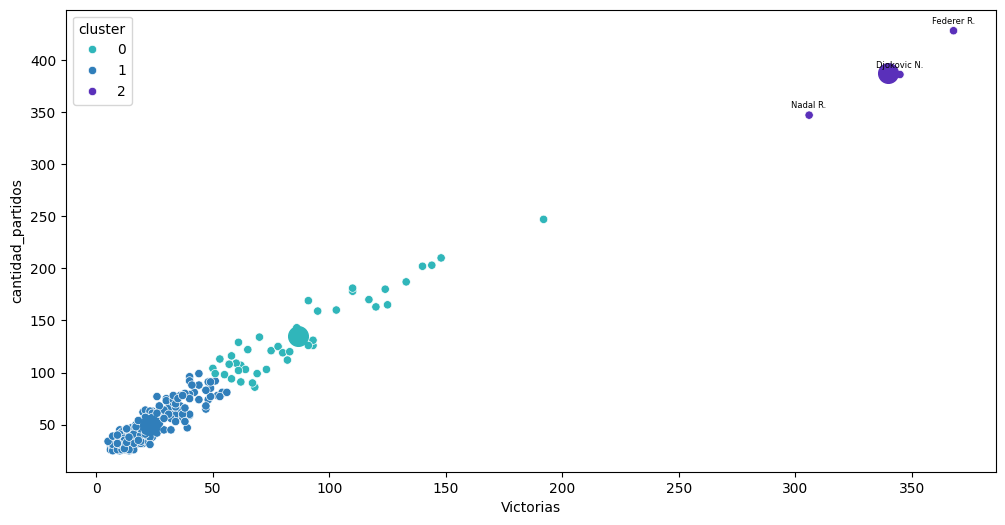

In [ ]:
# Gráfico de puntos mostrando los centroides
color = ['#30b6ba','#307eba','#5a30ba']

# Creo nueva variable que contenga los valores obtenidos en el cluster
ganadores_5sets['cluster'] = k_means_labels

# Tamaño del grafico
plt.figure(figsize=(12,6))

# Creo Scatterplot
sns.scatterplot(data=ganadores_5sets, x=ganadores_5sets['Victorias'], y=ganadores_5sets.cantidad_partidos, hue='cluster', palette=color)

# Graficar centroides
for i, centroid in enumerate(centroids):
  plt.scatter(centroid[0], centroid[1], c=color[i], s=200)

# Añadir etiquetas de nombres
#for index, row in ganadores_5sets.iterrows():
    #plt.annotate(row['Nombre'], (row['Victorias'], row['cantidad_partidos']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=4)

# Añadir etiquetas de nombres solo para el cluster con menos jugadores (arriba a la derecha)
cluster_1_data = ganadores_5sets[ganadores_5sets['cluster'] == 2]
for index, row in cluster_1_data.iterrows():
    plt.annotate(row['Nombre'], (row['Victorias'], row['cantidad_partidos']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=6)

# Crear una barra lateral con nombres
#legend_labels = []
#for cluster in range(len(color)):
    #cluster_data = ganadores_5sets[ganadores_5sets['cluster'] == cluster]
    #legend_labels.extend(list(cluster_data['Nombre']))

# Añadir la barra lateral
#plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

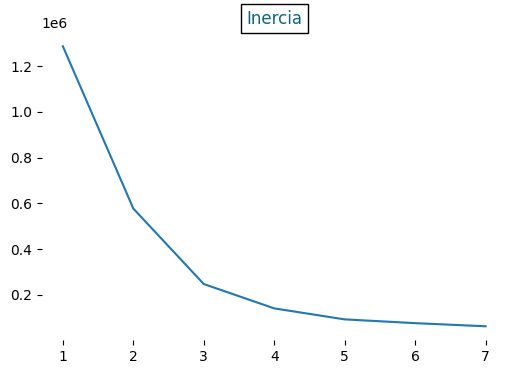

In [ ]:
# Método del codo
inertia = []

for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(x)# depende que df utilizamos, usamos x o X
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
sns.lineplot(x=range(1,8), y=inertia)

plt.title('Inercia', loc='center', bbox={'facecolor':'1', 'pad':4},color= '#0d6582')

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

**NOTA:**

El metodo del codo, demuestra que podemos utilizar dos o tres clusters, si ultilizamos 3, se apartan por completo el big three de los mejores de la historia

In [ ]:
# Calcular coeficiente de silueta
silhouette_kmeans = silhouette_score(x, k_means_labels) # depende que df utilizamos, usamos x o X

print(silhouette_kmeans)

0.645483055089857


¿Cómo interpretar el coeficiente de silueta?
* Un valor cercano a 1 indica que los puntos están muy cerca de los otros puntos de su cluster y lejos de los puntos de otros clusters.
* Un valor cercano a 0 indica que los puntos están cerca de la frontera entre dos clusters.
* Un valor cercano a -1 indica que los puntos pueden haber sido asignados al cluster incorrecto.

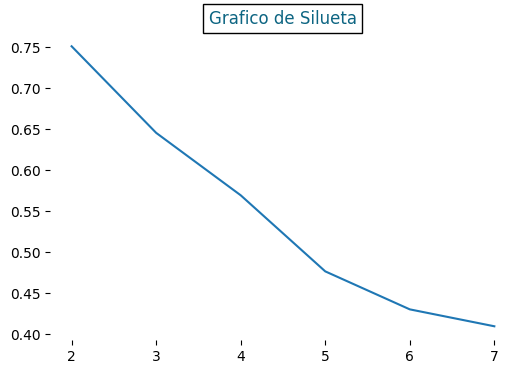

In [ ]:
# Grafico de silueta
silhouette = []

for i in range(2,8):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(x) # depende que df utilizamos, usamos x o X
  silhouette.append(silhouette_score(x, kmeans.labels_))

plt.figure(figsize=(6,4))
sns.lineplot(x=range(2,8), y=silhouette)

plt.title('Grafico de Silueta', loc='center', bbox={'facecolor':'1', 'pad':4},color= '#0d6582')

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

###**Agglomerative Clustering**

**PARAMETROS:**

- `n_clusters`: El número de grupos que se desea al final.
- `affinity`: Métrica utilizada para calcular la "cercanía". Puede ser "euclidean", "l1", "l2", "manhattan", "cosine", etc.
- `linkage`: Criterio utilizado para determinar los grupos más cercanos. Puede ser "ward", "complete", "average", "single".

In [ ]:
# Modelo
aggl = AgglomerativeClustering(n_clusters=3)

# Ajusto a mis datos
aggl.fit(x) # depende que df utilizamos, usamos x o X

aggl_labels = aggl.labels_

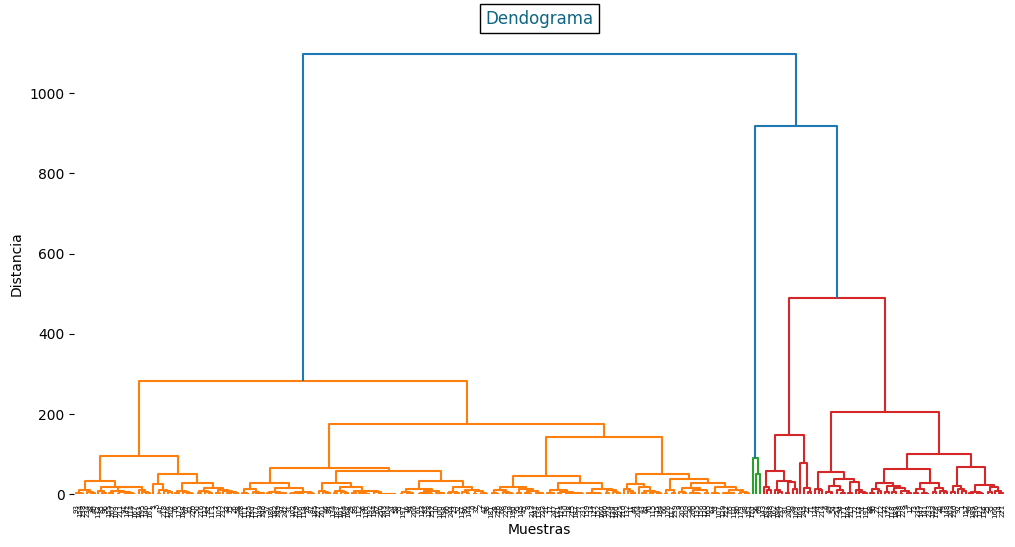

In [ ]:
# Generar el dendrograma
Z = linkage(x, 'ward')

plt.figure(figsize=(12,6))
dendrogram(Z)

plt.xlabel('Muestras')
plt.ylabel('Distancia')

plt.title('Dendograma', loc='center', bbox={'facecolor':'1', 'pad':4},color= '#0d6582')

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)


plt.show()

### **SUPERVISADOS**

###**Regresion**

**Regression Lineal**

In [ ]:
cinco_set_hard.head()

Tournament       Date Surface      Round  Cantidad_de_set      Player_1  \
0    US Open 2005-08-29    Hard  1st Round                5      D. Young   
1    US Open 2005-08-29    Hard  1st Round                5  T. Johansson   
2    US Open 2005-08-29    Hard  1st Round                5    T. Behrend   
3    US Open 2005-08-29    Hard  1st Round                5      G. Coria   
4    US Open 2005-08-29    Hard  1st Round                5     A. Martin   

        Player_2         Winner  Rank_1  Rank_2  Pts_1  Pts_2  Cuota_player1  \
0  G. Galimberti  Galimberti G.     600     236     33    159           2.75   
1    M. Zabaleta   Johansson T.      14      72   1460    515           1.25   
2    J. Bjorkman    Bjorkman J.      89     111    455    393           4.00   
3    F. Mantilla       Coria G.       8     105   1765    410           1.06   
4     R. Gasquet     Gasquet R.      61      13    617   1489           7.00   

   Cuota_player2  ganador_ranking  Superficie  Ganador_favorito  \
0           1.39              236           3              True   
1           3.75               14           3              True   
2           1.22              111           3             False   
3           8.00                8           3              True   
4           1.08               13           3              True   

   Primera_Ronda  dif_rank_tenistas  dif_rank_cuotas  dif_games_ganados  \
0           True                364             1.36                 10   
1           True                 58             2.50                  8   
2           True                 22             2.78                 12   
3           True                 97             6.94                  9   
4           True                 48             5.92                  3   

   Ronda  cant_games_1set  cant_games_2set  cant_games_1_2  dif_points   Año  \
0      0                7                6              13         126  2005   
1      0                6                6              12         945  2005   
2      0                3                3               6          62  2005   
3      0                7                6              13        1355  2005   
4      0                6                6              12         872  2005   

   PromAcesPorPartP1  PromDblFaltasPorPartP1  %PrimerServP1  \
0                3.3                     3.2          53.37   
1                9.2                     2.3          54.80   
2                3.3                     3.2          53.37   
3                4.1                     5.3          61.50   
4                3.3                     3.2          53.37   

   %PtosGanPrimerServP1  %PtosGanSegunServP1  ServeRatingP1  %ServGanP1  \
0                 65.79                44.03        227.885        64.4   
1                 77.00                53.50        275.500        83.3   
2                 65.79                44.03        227.885        64.4   
3                 68.30                48.30        251.400        74.5   
4                 65.79                44.03        227.885        64.4   

   PromAcesPorPartP2  PromDblFaltasPorPartP2  %PrimerServP2  \
0                3.3                     3.2          53.37   
1                3.3                     3.2          53.37   
2                3.8                     3.9          53.40   
3                3.3                     3.2          53.37   
4                3.3                     3.2          53.37   

   %PtosGanPrimerServP2  %PtosGanSegunServP2  ServeRatingP2  %ServGanP2  \
0                 65.79                44.03        227.885        64.4   
1                 65.79                44.03        227.885        64.4   
2                 68.60                50.90        243.500        70.7   
3                 65.79                44.03        227.885        64.4   
4                 65.79                44.03        227.885        64.4   

   DifPromAcesPorPart  DifPorcPrimServ  DifPorcPtosGanados1erse

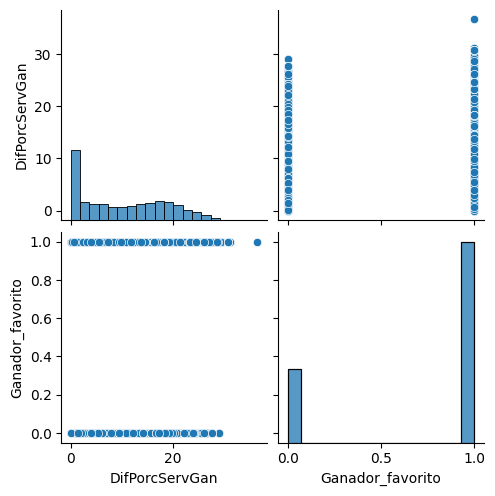

In [ ]:
# Visualización rápida de distribuciones y correlaciones
sns.pairplot(data=cinco_set_hard[['DifPorcServGan','Ganador_favorito']])
plt.show()

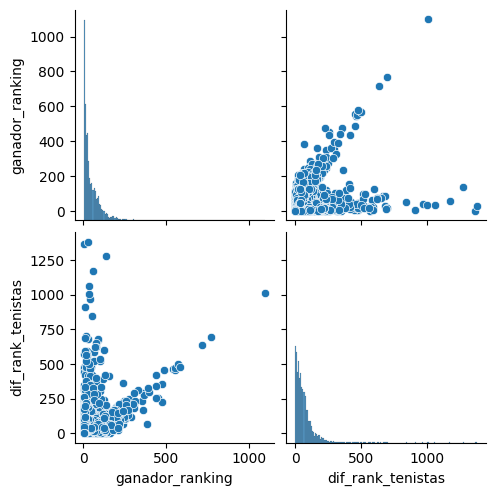

In [ ]:
# Visualización rápida de distribuciones y correlaciones
sns.pairplot(data=cinco_set_hard[['ganador_ranking','dif_rank_tenistas']])
plt.show()

In [ ]:
# Definir las variables dependiente e independiente
# En este caso con datos generales, (sin dividir en grupos por tipo de Superficie)
X = cinco_set_hard[['dif_rank_cuotas']]
y = cinco_set_hard['Ganador_favorito']

# Crear una instancia del modelo
lm = LinearRegression()

# Ajustar el modelo a los datos
lm.fit(X, y)

# Predecir los valores de y
y_pred = lm.predict(X)

# Calcular los residuos
residuos = y - y_pred

# Coeficientes X
print(lm.coef_)

# Intercept
print(lm.intercept_)

[0.02082802]
0.6382683238009172


In [ ]:
# Calcular R cuadrado
r2 = lm.score(X, y)

print(f'R2 calculado el score de la Regresión Lineal: {r2}')

R2 calculado el score de la Regresión Lineal: 0.07509223546765753


**NOTA:**

En este caso es un R2 muy bajo, la idea es probar con distintas superficies, rondas y otras variables.

In [ ]:
# Definir las variables dependiente e independiente
# En este caso con datos superficie dura
X_5sets = cinco_set_hard[['dif_rank_tenistas']]
y_5sets = cinco_set_hard['ganador_ranking']

# Crear una instancia del modelo
lm = LinearRegression()

# Ajustar el modelo a los datos
lm.fit(X_5sets, y_5sets)

# Predecir los valores de y
y_5sets_pred = lm.predict(X_5sets)

# Calcular los residuos
residuos_sup_hard = y_5sets - y_5sets_pred

# Coeficientes X
print(lm.coef_)

# Intercept
print(lm.intercept_)

[0.15184086]
35.64659122563046


In [ ]:
# Calcular R cuadrado
r2 = lm.score(X_5sets, y_5sets)

print(f'R2 calculado el score de la Regresión Lineal: {r2}')

R2 calculado el score de la Regresión Lineal: 0.05463747410654307


**NOTA:**

Confirmamos que es un R2 muy bajo entre estas dos variables, igual graficamos para mostrar.

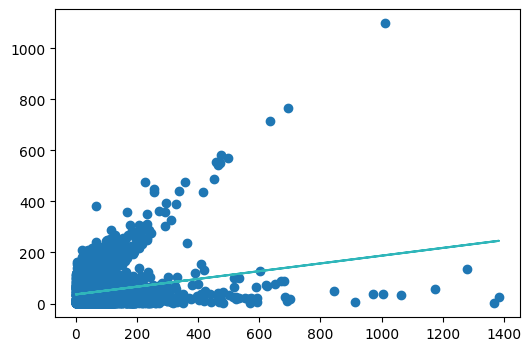

In [ ]:
# 1. Linealidad
plt.figure(figsize=(6,4))
plt.scatter(X_5sets,y_5sets)
plt.plot(X_5sets, y_5sets_pred, color='#30b6ba')
plt.show()

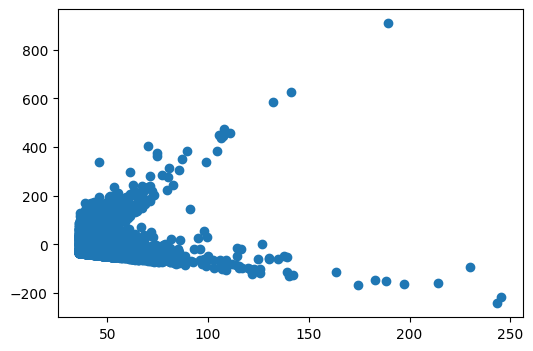

In [ ]:
# 2. Independencia de errores
plt.figure(figsize=(6,4))
plt.scatter(y_5sets_pred, residuos_sup_hard)
plt.show()

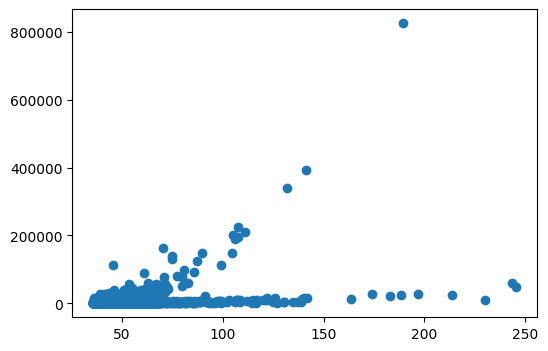

In [ ]:
# 3. Homocedasticidad
plt.figure(figsize=(6,4))
plt.scatter(y_5sets_pred, residuos_sup_hard**2)
plt.show()

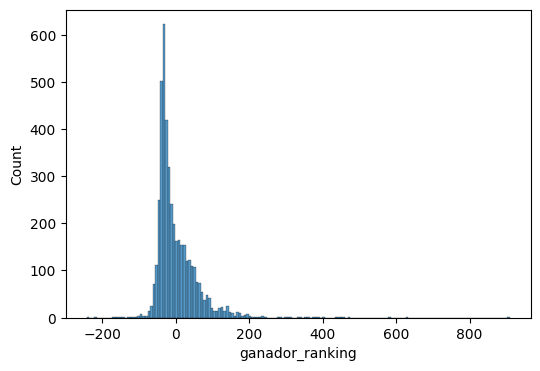

In [ ]:
# 4. Normalidad de la distribución de errores
plt.figure(figsize=(6,4))
sns.histplot(x=residuos_sup_hard)
plt.show()

**NOTA:**

R2 tan bajo demostro que el tipo de algoritmo lineal, no es el adecuado para este tipo de variables.

###**Clasificacion**

**NOTA:**

Las variables con las que trabajaremos en modelos de clasificacion, son las variables pre partido o a lo sumo informacion de primer y segundo set. Por ejemplo: las variables dif_games_ganados o ganador_ranking, son datos post partidos, que no pueden estar disponible en la previa.

**Arbol de Decision**

In [ ]:
cinco_set_hard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tournament                 4465 non-null   object        
 1   Date                       4465 non-null   datetime64[ns]
 2   Surface                    4465 non-null   object        
 3   Round                      4465 non-null   object        
 4   Cantidad_de_set            4465 non-null   int64         
 5   Player_1                   4465 non-null   object        
 6   Player_2                   4465 non-null   object        
 7   Winner                     4465 non-null   object        
 8   Rank_1                     4465 non-null   int64         
 9   Rank_2                     4465 non-null   int64         
 10  Pts_1                      4465 non-null   int64         
 11  Pts_2                      4465 non-null   int64         
 12  Cuota_

**PREPARACION:**

* Considero que estas variables pueden ser las necesarias para el modelo de clasificacion:

* Ronda = 0 a 6 siendo:
                      0 - primera ronda
                      1 - segunda ronda
                      2 - 16avos final
                      3 - 8vos final
                      4 - 4tos final
                      5 - semi final
                      6 - final

* dif_rank_tenistas = Diferencia de rankings entre los protegonistas

* dif_rank_cuotas = Diferencia de cuotas de probabilidad que ponen las casas de apuestas, basandose en muchos factores tanto estadisticos como fisicos y extra deportivos

* DifPromAcesPorPart = Tomamos un dato sobre el promedio de aces que hacen por partido

* dif_points =  La diferencia de puntos acumulados entre los tenistas a la hora de enfrentarse (estandarizados o no, depende la opcion que elija)

* DifPorcPrimServ = Diferencia de porcentajes de primeros servicios acertados (es decir, sin segundo saque)

* DifPorcPtosGanados1erserv = Diferencia de los porcentajes de puntos ganados con el primer saque.

* DifPorcPtosGanados2doserv = Diferencia de los porcentajes de puntos ganados pero con el segundo saque.

* DifPorcServGan =  Diferencia entre los porcentajes de servicios que son ganados con su saque

* dif_historial_entre_si  =  Diferencia entre las victorias entre si.
            

In [ ]:
cinco_set_hard.columns

Index(['Tournament', 'Date', 'Surface', 'Round', 'Cantidad_de_set', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
       'Cuota_player1', 'Cuota_player2', 'ganador_ranking', 'Superficie',
       'Ganador_favorito', 'Primera_Ronda', 'dif_rank_tenistas',
       'dif_rank_cuotas', 'dif_games_ganados', 'Ronda', 'cant_games_1set',
       'cant_games_2set', 'cant_games_1_2', 'dif_points', 'Año',
       'PromAcesPorPartP1', 'PromDblFaltasPorPartP1', '%PrimerServP1',
       '%PtosGanPrimerServP1', '%PtosGanSegunServP1', 'ServeRatingP1',
       '%ServGanP1', 'PromAcesPorPartP2', 'PromDblFaltasPorPartP2',
       '%PrimerServP2', '%PtosGanPrimerServP2', '%PtosGanSegunServP2',
       'ServeRatingP2', '%ServGanP2', 'DifPromAcesPorPart', 'DifPorcPrimServ',
       'DifPorcPtosGanados1erserv', 'DifPorcPtosGanados2doserv',
       'DifPorcServGan'],
      dtype='object')

**ARBOL DE DECISION:**

In [ ]:
lista = ['Ronda','dif_rank_tenistas','dif_rank_cuotas','dif_points','DifPromAcesPorPart','DifPorcPrimServ','DifPorcPtosGanados1erserv','DifPorcPtosGanados2doserv','DifPorcServGan','cant_games_1set']
print(cinco_set_hard['Surface'].unique())

['Hard']


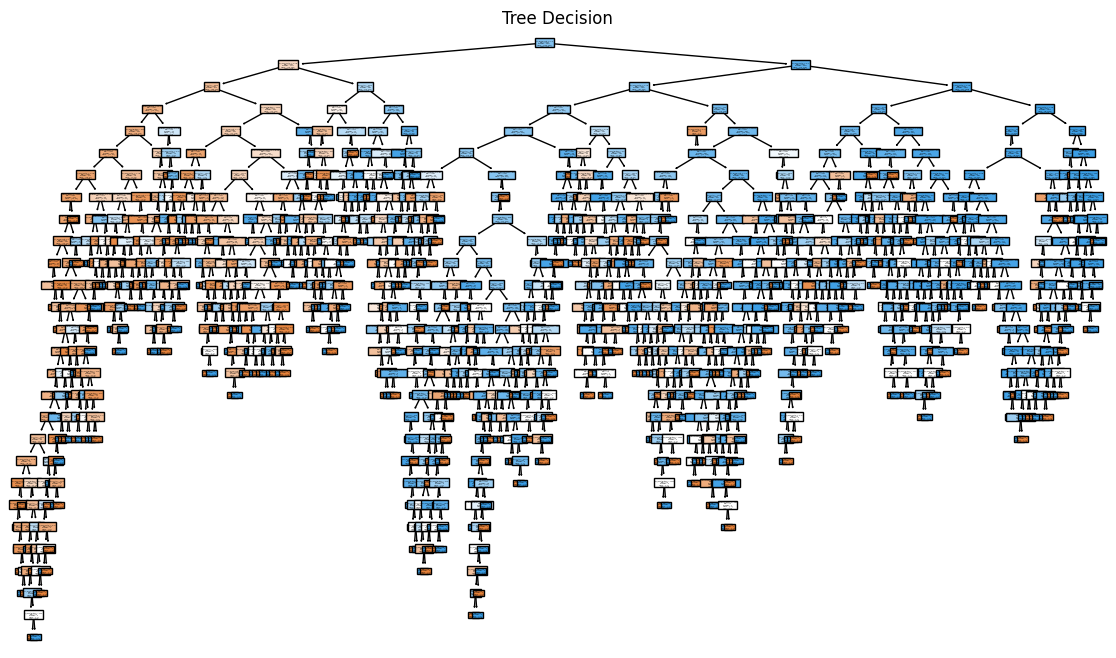

In [ ]:
# Crear y entrenar el modelo

X = cinco_set_hard[['Ronda','dif_rank_tenistas','dif_rank_cuotas','dif_points','DifPromAcesPorPart','DifPorcPrimServ','DifPorcPtosGanados1erserv','DifPorcPtosGanados2doserv','DifPorcServGan','cant_games_1set']]
y = cinco_set_hard.Ganador_favorito

arbol_5set = DecisionTreeClassifier(random_state=42)
arbol_5set.fit(X=X, y=y)

# Visualizar el árbol de decisión
plt.figure(figsize=(14,8))
plot_tree(decision_tree=arbol_5set,feature_names = lista, class_names=cinco_set_hard['Surface'] , filled=True)
plt.title('Tree Decision', loc= 'center')
plt.show()

**NOTA**:

Pruebo distintos modelos de clasificacion, y analizo cual es el mas adecuado

In [ ]:
X = cinco_set_hard[['Ronda','dif_rank_tenistas','dif_rank_cuotas','dif_points','DifPromAcesPorPart','DifPorcPrimServ','DifPorcPtosGanados1erserv','DifPorcPtosGanados2doserv','DifPorcServGan','cant_games_1set']]
y = cinco_set_hard.Ganador_favorito

# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49150, stratify=y) #Stratify se usa siempre en Clasificacion

In [ ]:
# Ajustar al modelo
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X=X_train, y=y_train)

# Predecir para valores de prueba
y_pred_arbol = arbol.predict(X_test)
y_pred_arbol_train = arbol.predict(X_train)

Text(0.5, 1.0, 'Matriz de Confusion para Arbol de Decision')

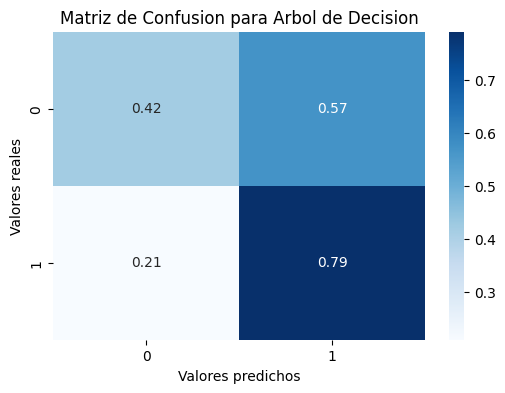

In [ ]:
# Crear matríz de confusión
cm_arbol = confusion_matrix(y_true=y_test, y_pred=y_pred_arbol)

# Armar DataFrame para mejor visualización con datos normalizados
df_cm_arbol = np.round(cm_arbol/np.sum(cm_arbol,axis=1).reshape(-1,1),2) #fmt='d'

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_cm_arbol,cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para Arbol de Decision', loc= 'center')

In [ ]:
# Calcular la precisión de estos datos
accuracy_arbol = accuracy_score(y_test, y_pred_arbol)

print(accuracy_arbol)

0.6954087346024636


**COMPARACION ARBOL DE DECISION:**

In [ ]:
# Calcular métricas de clasificación para training
accuracy_train_arbol = accuracy_score(y_train, y_pred_arbol_train)
precision_train_arbol = precision_score(y_train, y_pred_arbol_train)
recall_train_arbol = recall_score(y_train, y_pred_arbol_train)
f1_train_arbol = f1_score(y_train, y_pred_arbol_train)
roc_auc_train_arbol = roc_auc_score(y_train, y_pred_arbol_train)

# Calcular métricas de clasificación para testeo
accuracy_arbol = accuracy_score(y_test, y_pred_arbol)
precision_arbol = precision_score(y_test, y_pred_arbol)
recall_arbol = recall_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol)
roc_auc_arbol = roc_auc_score(y_test, y_pred_arbol)


In [ ]:
# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_arbol}")
print(f"Precision: {precision_train_arbol}")
print(f"Recall: {recall_train_arbol}")
print(f"F1 Score: {f1_train_arbol}")
print(f"ROC AUC Score: {roc_auc_train_arbol}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_arbol}")
print(f"Precision: {precision_arbol}")
print(f"Recall: {recall_arbol}")
print(f"F1 Score: {f1_arbol}")
print(f"ROC AUC Score: {roc_auc_arbol}")


Métricas en el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

Métricas en el conjunto de prueba:
Accuracy: 0.6954087346024636
Precision: 0.7899543378995434
Recall: 0.7947932618683001
F1 Score: 0.7923664122137404
ROC AUC Score: 0.6098966309341501


**CONCLUSION:**

* Las metricas en el conjunto de entrenamiento muestran overfitting con un 100% en todas las analizadas. En cuanto a las metricas para los datos de testing, sufren una disminucion considerable.

In [ ]:
print(classification_report(y_test, y_pred_arbol))

              precision    recall  f1-score   support

       False       0.43      0.42      0.43       240
        True       0.79      0.79      0.79       653

    accuracy                           0.70       893
   macro avg       0.61      0.61      0.61       893
weighted avg       0.69      0.70      0.69       893



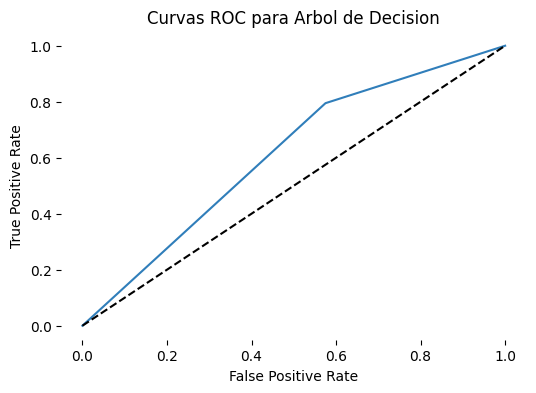

In [ ]:
# Ejemplo de gráfico para ROC AUC
# Calcular las probabilidades de predicción y la función roc_curve
y_pred_proba_arbol = arbol.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_arbol)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='#307eba')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para Arbol de Decision', loc= 'center')

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

**KNN:**

In [ ]:
# Crear modelo
knn = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo
knn.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

Text(0.5, 1.0, 'Matriz de Confusion para Modelo KNN')

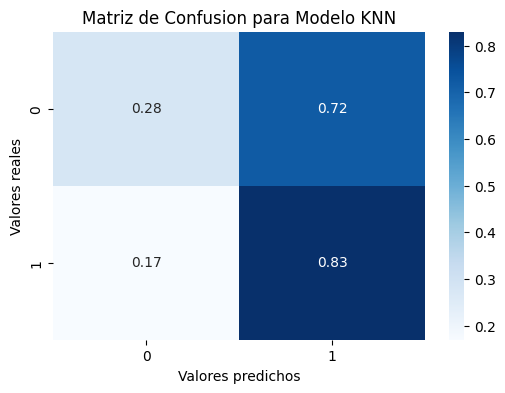

In [ ]:
# Crear matríz de confusión
cm_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

# Armar DataFrame para mejor visualización con datos normalizados
df_knn = np.round(cm_knn/np.sum(cm_knn,axis=1).reshape(-1,1),2)

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_knn,cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para Modelo KNN', loc= 'center')

In [ ]:
# Calcular la precisión
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(accuracy_knn)

0.6819708846584547


**COMPARACION KNN:**

In [ ]:
# Calcular métricas de clasificación para training
accuracy_train_knn = accuracy_score(y_train, y_pred_knn_train)
precision_train_knn = precision_score(y_train, y_pred_knn_train)
recall_train_knn = recall_score(y_train, y_pred_knn_train)
f1_train_knn = f1_score(y_train, y_pred_knn_train)
roc_auc_train_knn = roc_auc_score(y_train, y_pred_knn_train)

# Calcular métricas de clasificación para testeo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)


In [ ]:
# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_knn}")
print(f"Precision: {precision_train_knn}")
print(f"Recall: {recall_train_knn}")
print(f"F1 Score: {f1_train_knn}")
print(f"ROC AUC Score: {roc_auc_train_knn}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print(f"ROC AUC Score: {roc_auc_knn}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.8379059350503919
Precision: 0.8619708288865172
Recall: 0.9269319051262433
F1 Score: 0.8932718894009216
ROC AUC Score: 0.7609607333564411

Métricas en el conjunto de prueba:
Accuracy: 0.6819708846584547
Precision: 0.758765778401122
Recall: 0.8284839203675345
F1 Score: 0.7920937042459736
ROC AUC Score: 0.5559086268504339


**CONCLUSION:**

* Lo bueno del modelo es que muestra buenas metricas, tanto en training como en testing, pero la matriz muestra que los Falsos Negativos son mas del 50% de los casos. Ademas es que existe una diferencia considerable entre el grupo de entrenamiento como el de testeo. En algunos casos como el de la metrica accuracy o ROC, es de mas de 20%.

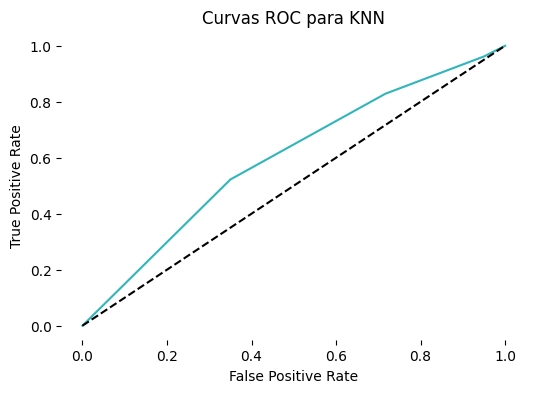

In [ ]:
# Ejemplo de gráfico para ROC AUC
# Calcular las probabilidades de predicción y la función roc_curve
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='#30b6ba')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para KNN', loc= 'center')

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

**REGRESION LOGISTICA:**

In [ ]:
# Crear el modelo
log_reg = LogisticRegression(random_state=42)

# Ajustar el modelo
log_reg.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log = log_reg.predict(X_test)
y_pred_log_train = log_reg.predict(X_train)

Text(0.5, 1.0, 'Matriz de Confusion para Regresion Logistica')

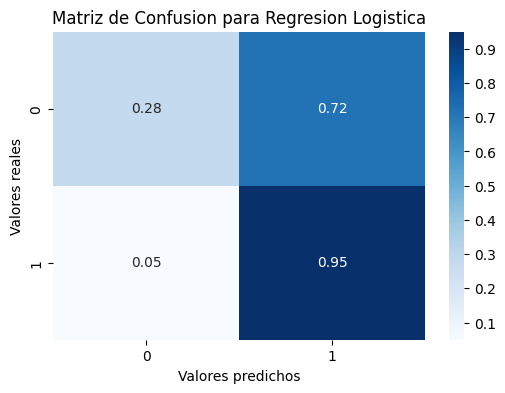

In [ ]:
# Crear matríz de confusión
cm_log = confusion_matrix(y_true=y_test, y_pred=y_pred_log)

# Armar DataFrame para mejor visualización
df_log = np.round(cm_log/np.sum(cm_log,axis=1).reshape(-1,1),2)

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_log, cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para Regresion Logistica', loc= 'center')

In [ ]:
# Calcular la precisión
accuracy_log = accuracy_score(y_test, y_pred_log)

print(accuracy_log)

0.7693169092945129


**COMPARACION REGRESION LOGISTICA:**

In [ ]:
# Calcular métricas de clasificación para training
accuracy_train_log = accuracy_score(y_train, y_pred_log_train)
precision_train_log = precision_score(y_train, y_pred_log_train)
recall_train_log = recall_score(y_train, y_pred_log_train)
f1_train_log = f1_score(y_train, y_pred_log_train)
roc_auc_train_log = roc_auc_score(y_train, y_pred_log_train)

# Calcular métricas de clasificación para testeo
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_log)


In [ ]:
# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_log}")
print(f"Precision: {precision_train_log}")
print(f"Recall: {recall_train_log}")
print(f"F1 Score: {f1_train_log}")
print(f"ROC AUC Score: {roc_auc_train_log}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log}")
print(f"Precision: {precision_log}")
print(f"Recall: {recall_log}")
print(f"F1 Score: {f1_log}")
print(f"ROC AUC Score: {roc_auc_log}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.763437849944009
Precision: 0.7770122142186032
Recall: 0.9491201224177506
F1 Score: 0.8544859652143966
ROC AUC Score: 0.6029525455512552

Métricas en el conjunto de prueba:
Accuracy: 0.7693169092945129
Precision: 0.7818411097099621
Recall: 0.9494640122511485
F1 Score: 0.8575380359612724
ROC AUC Score: 0.6143153394589076


**CONCLUSION:**

* Es el modelo que muestra las metricas mas homogeneas, con el 75% en el caso de accuracy, tanto en testing como training, demuestra no haber overfitting, y que trabaja igual con ambos grupos de datos. Lo malo es que los Falsos Negativos es del mas del 50%.
***Es el modelo que mejor se ajusta a nuestros datos**

In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

       False       0.67      0.28      0.39       240
        True       0.78      0.95      0.86       653

    accuracy                           0.77       893
   macro avg       0.73      0.61      0.63       893
weighted avg       0.75      0.77      0.73       893



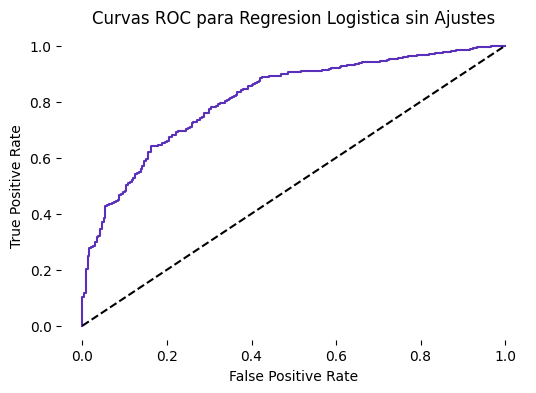

In [ ]:
# Ejemplo de gráfico para ROC AUC
# Calcular las probabilidades de predicción y la función roc_curve
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='#5a30ba')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para Regresion Logistica sin Ajustes', loc='center')

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

**Que nuevas Variables implementaria??**

              * Aces de primer set
              * Errores no forzados primer set
              * Porcentaje de 1 saque
              * Tiros ganadores

**Otras Opciones**

              * Grid Search
              * Cross Validation
              * Random Search

**Variables para Analizar**

              * Trabajar con Pts_1 y Pts_2 sin estandarizar
              * Trabajar con Pts_1 y Pts_2 con estandarizacion


**PARAMETROS DE UN LogisticRegression:**


* **penalty**: Indica el tipo de penalización a aplicar. Puede ser "l1", "l2", "elasticnet" o "none".
* **C**: Parámetro de regularización inversa. Un valor más pequeño especifica una regularización más fuerte.
* **solver**: Especifica el algoritmo a utilizar en el problema de optimización. Las opciones comunes son "liblinear", "newton-cg", "lbfgs", "sag" y "saga".
* **multi_class**: Indica el enfoque para resolver problemas de clasificación multiclase. Puede ser "ovr" (uno contra el resto) o "multinomial" (clasificación multinomial).
* **max_iter**: Número máximo de iteraciones permitidas para la convergencia del algoritmo.
* **tol**: Tolerancia para la detección de convergencia.
* **fit_intercept**: Si es verdadero, se agrega una constante (término de sesgo) a la función de decisión.
* **intercept_scaling**: Factor utilizado para escalar el término de sesgo.
* **class_weight**: Peso asociado a cada clase. Puede ser un diccionario o "balanced", para asignar automáticamente pesos inversamente proporcionales a las frecuencias de clase.
* **random_state**: Semilla utilizada por el generador de números aleatorios.

In [ ]:
# Grid Search + Cross Validation

# Definir los parámetros para el Grid Search
grid = {
    'penalty': ['l1', 'l2','elasticnet','sag', 'saga'],
    'solver': ['liblinear', 'newton-cg','lbfgs'],
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': ['dict', 'balanced'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200,500,800],
}

# Crear el modelo de árbol de decisión para usar en Grid Search
modelo = LogisticRegression(random_state=42)

# Aplicar Grid Search con Cross Validation
grid_search = GridSearchCV(estimator=modelo, param_grid=grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Usar el mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predecir los valores de prueba
y_pred = best_model.predict(X_test)

In [ ]:
# Imprimir los mejores hiperparámetros
best_hiperparams = grid_search.best_params_
print(f'Los mejores hiperparametros son: {best_hiperparams}')

Los mejores hiperparametros son: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}


**NOTA:**

Voy a probar alguno de los parametros, los que no estan, es porque necesito analizar que numeros son los mas adecuados.

In [ ]:
# Conjunto de parametros para probar
params = {
    'penalty': 'l2',
    'multi_class': 'multinomial',
    'solver': 'lbfgs',
    'class_weight': 'balanced',
    'C': 1,
    'max_iter': 200,
}

# Crear el modelo
log_reg2 = LogisticRegression(**params, random_state=42)

# Ajustar el modelo
log_reg2.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log2 = log_reg2.predict(X_test)
y_pred_log_train2 = log_reg2.predict(X_train)


Text(0.5, 1.0, 'Matriz de Confusion para Regresion Logistica con Ajustes de Parametros')

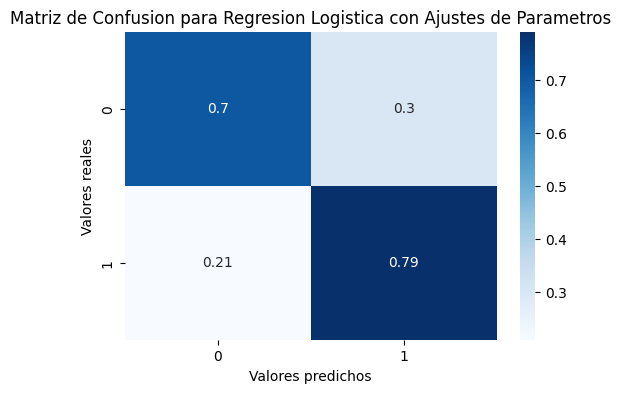

In [ ]:
# Crear matríz de confusión
cm_log2 = confusion_matrix(y_true=y_test, y_pred=y_pred_log2)

# Armar DataFrame para mejor visualización
df_log2 = np.round(cm_log2/np.sum(cm_log2,axis=1).reshape(-1,1),2)

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_log2, cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para Regresion Logistica con Ajustes de Parametros', loc= 'center')

In [ ]:
# Calcular métricas de clasificación para training
accuracy_train_log2 = accuracy_score(y_train, y_pred_log_train2)
precision_train_log2 = precision_score(y_train, y_pred_log_train2)
recall_train_log2 = recall_score(y_train, y_pred_log_train2)
f1_train_log2 = f1_score(y_train, y_pred_log_train2)
roc_auc_train_log2 = roc_auc_score(y_train, y_pred_log_train2)

# Calcular métricas de clasificación para testeo
accuracy_log2 = accuracy_score(y_test, y_pred_log2)
precision_log2 = precision_score(y_test, y_pred_log2)
recall_log2 = recall_score(y_test, y_pred_log2)
f1_log2 = f1_score(y_test, y_pred_log2)
roc_auc_log2 = roc_auc_score(y_test, y_pred_log2)


In [ ]:
# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_log2}")
print(f"Precision: {precision_train_log2}")
print(f"Recall: {recall_train_log2}")
print(f"F1 Score: {f1_train_log2}")
print(f"ROC AUC Score: {roc_auc_train_log2}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log2}")
print(f"Precision: {precision_log2}")
print(f"Recall: {recall_log2}")
print(f"F1 Score: {f1_log2}")
print(f"ROC AUC Score: {roc_auc_log2}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.7298432250839866
Precision: 0.8567719601903938
Recall: 0.7574598316755929
F1 Score: 0.8040609137055839
ROC AUC Score: 0.7059741747104479

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672
ROC AUC Score: 0.7458652373660029


In [ ]:
print(classification_report(y_test, y_pred_log2))

              precision    recall  f1-score   support

       False       0.55      0.70      0.62       240
        True       0.88      0.79      0.83       653

    accuracy                           0.77       893
   macro avg       0.72      0.75      0.73       893
weighted avg       0.79      0.77      0.77       893



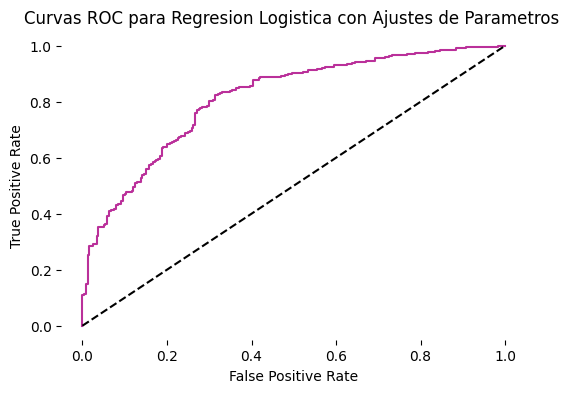

In [ ]:
# Ejemplo de gráfico para ROC AUC
# Calcular las probabilidades de predicción y la función roc_curve
y_pred_proba_log_reg_2 = log_reg2.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg_2)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='#ba309a')
plt.plot([0,1],[0,1], 'k--')
plt.title('Curvas ROC para Regresion Logistica con Ajustes de Parametros ', loc= 'center')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

**CONCLUSION:**
* Es el modelo muestra una mejoras en algunas metricas, pero muestra desmejoria en otras.

* Muestra una mejora significativa en la matriz de confusion en especial en los Falsos Negativos, pero desmejoria en los Falsos Positivos

* Falta ajustar otros parametros para ver si hay una mejora general.

barplot de arbol decision - knn - regr log sin ajuste - con ajuste

Accuracy:
Precision:
Recall:
F1 Score:

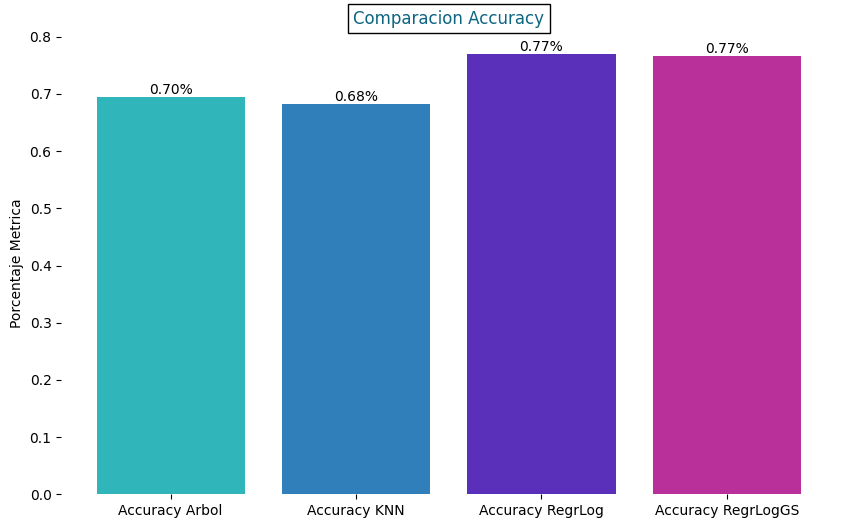

In [ ]:
# Barchart con los datos de Accuracy
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['Accuracy Arbol','Accuracy KNN','Accuracy RegrLog','Accuracy RegrLogGS']
Cantidad = [accuracy_arbol,accuracy_knn,accuracy_log,accuracy_log2]

bar_colors = ['#30b6ba','#307eba','#5a30ba','#ba309a']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion Accuracy',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"AccuracyArbol: {accuracy_arbol}")
print(f"AccuracyKNN: {accuracy_knn}")
print(f"AccuracyRL: {accuracy_log}")
print(f"AccuracyRLGS: {accuracy_log2}")


Métricas en el conjunto de prueba:
AccuracyArbol: 0.6954087346024636
AccuracyKNN: 0.6819708846584547
AccuracyRL: 0.7693169092945129
AccuracyRLGS: 0.7670772676371781


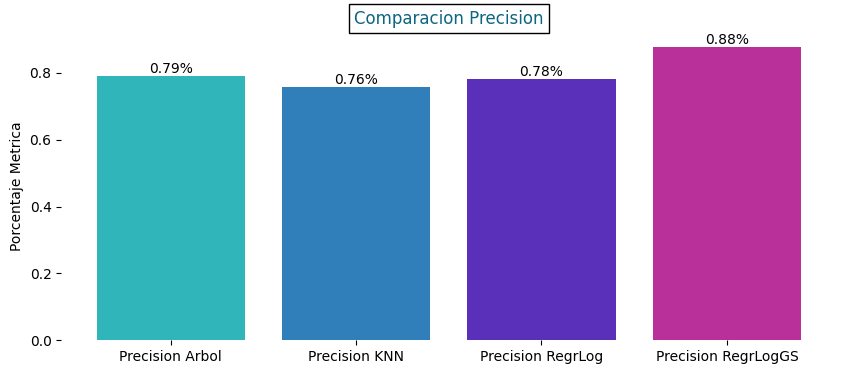

In [ ]:
# Barchart con los datos de Precision
fig, ax = plt.subplots(figsize=(10,4))

titulos_barras = ['Precision Arbol','Precision KNN','Precision RegrLog','Precision RegrLogGS']
Cantidad = [precision_arbol,precision_knn,precision_log,precision_log2]

bar_colors = ['#30b6ba','#307eba','#5a30ba','#ba309a']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion Precision',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')
plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"PrecisionArbol: {precision_arbol}")
print(f"PrecisionKNN: {precision_knn}")
print(f"PrecisionRL: {precision_log}")
print(f"PrecisionRLGS: {precision_log2}")


Métricas en el conjunto de prueba:
PrecisionArbol: 0.7899543378995434
PrecisionKNN: 0.758765778401122
PrecisionRL: 0.7818411097099621
PrecisionRLGS: 0.8777589134125636


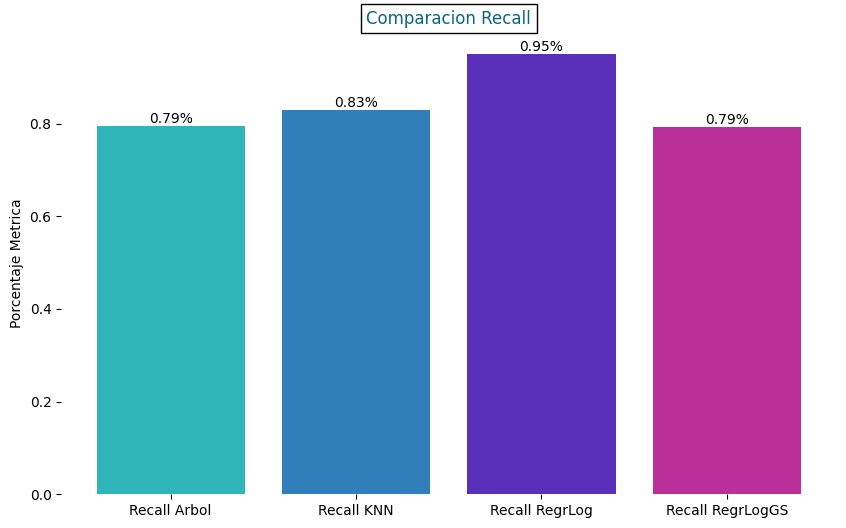

In [ ]:
# Barchart con los datos de Recall
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['Recall Arbol','Recall KNN','Recall RegrLog','Recall RegrLogGS']
Cantidad = [recall_arbol,recall_knn,recall_log,recall_log2]

bar_colors = ['#30b6ba','#307eba','#5a30ba','#ba309a']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion Recall',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"RecallArbol: {recall_arbol}")
print(f"RecallKNN: {recall_knn}")
print(f"RecallRL: {recall_log}")
print(f"RecallRLGS: {recall_log2}")


Métricas en el conjunto de prueba:
RecallArbol: 0.7947932618683001
RecallKNN: 0.8284839203675345
RecallRL: 0.9494640122511485
RecallRLGS: 0.7917304747320061


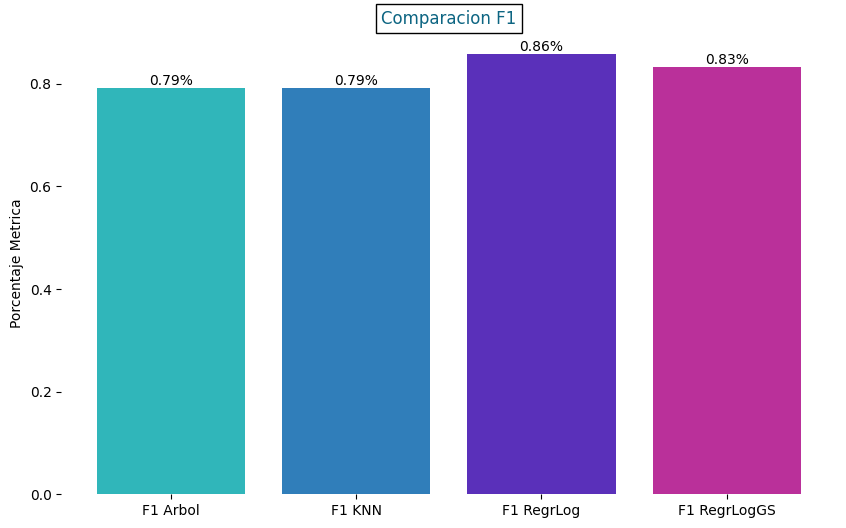

In [ ]:
# Barchart con los datos de F1
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['F1 Arbol','F1 KNN','F1 RegrLog','F1 RegrLogGS']
Cantidad = [f1_arbol,f1_knn,f1_log,f1_log2]

bar_colors = ['#30b6ba','#307eba','#5a30ba','#ba309a']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion F1',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"F1ScoreArbol: {f1_arbol}")
print(f"F1ScoreKNN: {f1_knn}")
print(f"F1ScoreRL: {f1_log}")
print(f"F1ScoreRLGS: {f1_log2}")


Métricas en el conjunto de prueba:
F1ScoreArbol: 0.7923664122137404
F1ScoreKNN: 0.7920937042459736
F1ScoreRL: 0.8575380359612724
F1ScoreRLGS: 0.8325281803542672


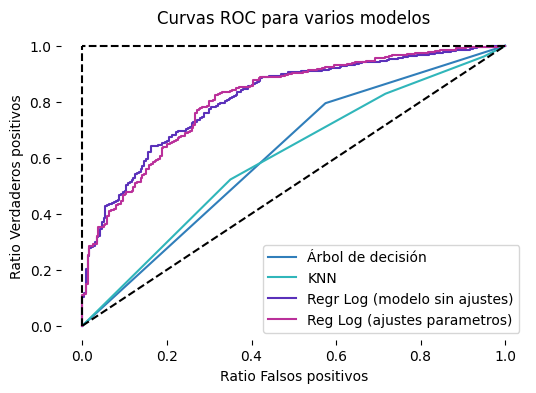

In [ ]:
# Graficar

# Calcular y trazar la curva ROC para el modelo de árbol de decisión
plt.figure(figsize=(6,4))
y_pred_proba_arbol = arbol.predict_proba(X_test)[:, 1]
fpr_arbol, tpr_arbol, _ = roc_curve(y_test, y_pred_proba_arbol)
plt.plot(fpr_arbol, tpr_arbol, color='#307eba', label='Árbol de decisión')

# Calcular y trazar la curva ROC para el modelo de KNN
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr_knn, tpr_knn, color='#30b6ba', label='KNN')

# Calcular y trazar la curva ROC para el primer modelo de regresión logística (log_reg)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, color='#5a30ba', label='Regr Log (modelo sin ajustes)')

# Calcular y trazar la curva ROC para el segundo modelo de regresión logística (log_reg2)
y_pred_proba_log_reg_2 = log_reg2.predict_proba(X_test)[:, 1]
fpr_log_reg_2, tpr_log_reg_2, _ = roc_curve(y_test, y_pred_proba_log_reg_2)
plt.plot(fpr_log_reg_2, tpr_log_reg_2, color='#ba309a', label='Reg Log (ajustes parametros)')

# Agregar la línea diagonal (curva ROC para un modelo perfecto)
plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
plt.plot([0, 0], [0, 1], color='Black', linestyle='--')
plt.plot([1, 0], [1, 1], color='Black', linestyle='--')

# Etiquetas y título
plt.xlabel('Ratio Falsos positivos')
plt.ylabel('Ratio Verdaderos positivos')
plt.title('Curvas ROC para varios modelos', loc= 'center')
plt.legend()

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

In [ ]:
# Random Search

# Instanciar un DecisionTreeClassifier
LgR = LogisticRegression()

# Armar la distribucion de parametros de Logistic regression
distribution_grid={
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['liblinear', 'newton-cg','lbfgs', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': ['dict', 'balanced'],
    #'C': [-0.001, -0.01, -0.1, -1,0.001, 0.01, 0.1, 1, 10,100, 200],
    'C': np.logspace(-4, 4, 50),
    'max_iter': [100, 200,500,800,1000, 2000],
    'intercept_scaling': [1, 2, 3, 4, 5],
    'tol': [1,10,100,1000,10000],
    'fit_intercept': [0, 1, 0, 1, 1],

}



# Instanciar el RandomSearch
random_search = RandomizedSearchCV(LgR, param_distributions=distribution_grid, n_jobs=-1 ,random_state=42, n_iter=100, cv=5, scoring='accuracy',verbose=1)

# Ajustar el RandomSearch a los datos
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4....
       6.86648845e+03, 1.00000000e+04]),
                                        'class_weight': ['dict', 'balanced'],
                                        'fit_intercept': [0, 1, 0, 1, 1],
                                        'intercept_scaling': [1, 2, 3, 4, 5],
                                        'max_iter': [100, 200, 500, 800, 1000,
                                                     2000],
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'saga'],
                                        'tol': [1, 10, 100, 1000, 10000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Imprimir mejores parametros y score
print(f'Mejores parametros: ', random_search.best_params_)
print(f'Score: ', random_search.best_score_)

# Predecir
best_estimator = random_search.best_estimator_
y_pred_RS_LG = best_estimator.predict(X_test)

# Imprimir metricas
print(f'Accuracy: ', accuracy_score(y_test, y_pred_RS_LG))

Mejores parametros:  {'tol': 10000, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 2000, 'intercept_scaling': 3, 'fit_intercept': 0, 'class_weight': 'balanced', 'C': 11.513953993264458}
Score:  0.7318030988619224
Accuracy:  0.7312430011198209


In [ ]:
# Conjunto de parametros para probar
parameters = {'tol': 10000,
              'solver': 'saga',
              'penalty': 'l2',
              'multi_class': 'multinomial',
              'max_iter': 2000,
              'intercept_scaling': 3,
              'fit_intercept': 1,
              'class_weight': 'balanced',
              'C': 35.564803062231285
}

# Crear el modelo
log_reg3 = LogisticRegression(**parameters, random_state=42)

# Ajustar el modelo
log_reg3.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log3 = log_reg2.predict(X_test)
y_pred_log_train3 = log_reg2.predict(X_train)

Text(0.5, 1.0, 'Matriz de Confusion para Regresion Logistica con RandomSearch')

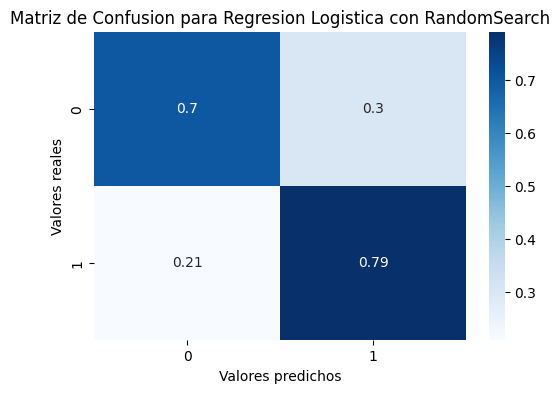

In [ ]:
# Crear matríz de confusión
cm_log3 = confusion_matrix(y_true=y_test, y_pred=y_pred_log3)

# Armar DataFrame para mejor visualización
df_log3 = np.round(cm_log3/np.sum(cm_log3,axis=1).reshape(-1,1),2)

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_log3, cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para Regresion Logistica con RandomSearch', loc= 'center')

In [ ]:
# Calcular métricas de clasificación para training
accuracy_train_log3 = accuracy_score(y_train, y_pred_log_train3)
precision_train_log3 = precision_score(y_train, y_pred_log_train3)
recall_train_log3 = recall_score(y_train, y_pred_log_train3)
f1_train_log3 = f1_score(y_train, y_pred_log_train3)
roc_auc_train_log3 = roc_auc_score(y_train, y_pred_log_train3)

# Calcular métricas de clasificación para testeo
accuracy_log3 = accuracy_score(y_test, y_pred_log3)
precision_log3 = precision_score(y_test, y_pred_log3)
recall_log3 = recall_score(y_test, y_pred_log3)
f1_log3 = f1_score(y_test, y_pred_log3)
roc_auc_log3 = roc_auc_score(y_test, y_pred_log3)


In [ ]:
# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_log3}")
print(f"Precision: {precision_train_log3}")
print(f"Recall: {recall_train_log3}")
print(f"F1 Score: {f1_train_log3}")
print(f"ROC AUC Score: {roc_auc_train_log3}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log3}")
print(f"Precision: {precision_log3}")
print(f"Recall: {recall_log3}")
print(f"F1 Score: {f1_log3}")
print(f"ROC AUC Score: {roc_auc_log3}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.7298432250839866
Precision: 0.8567719601903938
Recall: 0.7574598316755929
F1 Score: 0.8040609137055839
ROC AUC Score: 0.7059741747104479

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672
ROC AUC Score: 0.7458652373660029


In [ ]:
print(classification_report(y_train, y_pred_log_train3))

              precision    recall  f1-score   support

       False       0.50      0.65      0.57       958
        True       0.86      0.76      0.80      2614

    accuracy                           0.73      3572
   macro avg       0.68      0.71      0.68      3572
weighted avg       0.76      0.73      0.74      3572



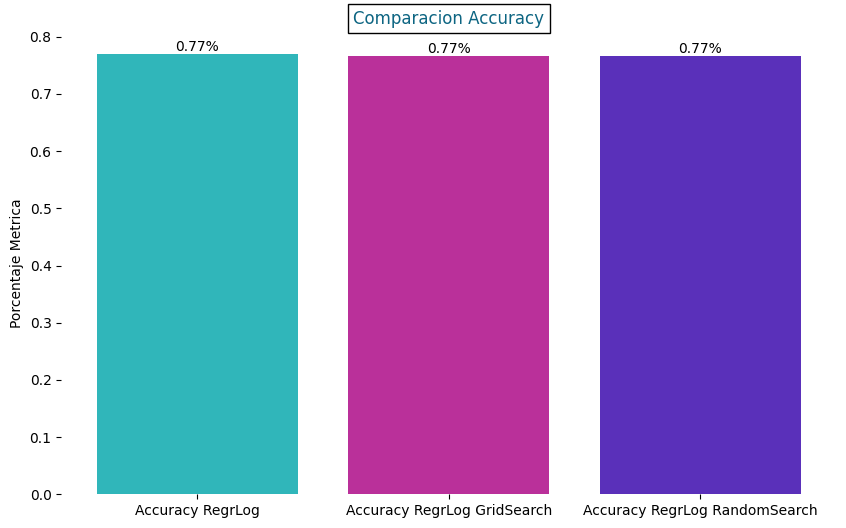

In [ ]:
# Barchart con los datos de Accuracy
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['Accuracy RegrLog','Accuracy RegrLog GridSearch','Accuracy RegrLog RandomSearch']
Cantidad = [accuracy_log,accuracy_log2,accuracy_log3]

bar_colors = ['#30b6ba','#ba309a','#5a30ba']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion Accuracy',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"AccuracyRL: {accuracy_log}")
print(f"AccuracyRLGS: {accuracy_log2}")
print(f"AccuracyRLRS: {accuracy_log3}")


Métricas en el conjunto de prueba:
AccuracyRL: 0.7693169092945129
AccuracyRLGS: 0.7670772676371781
AccuracyRLRS: 0.7670772676371781


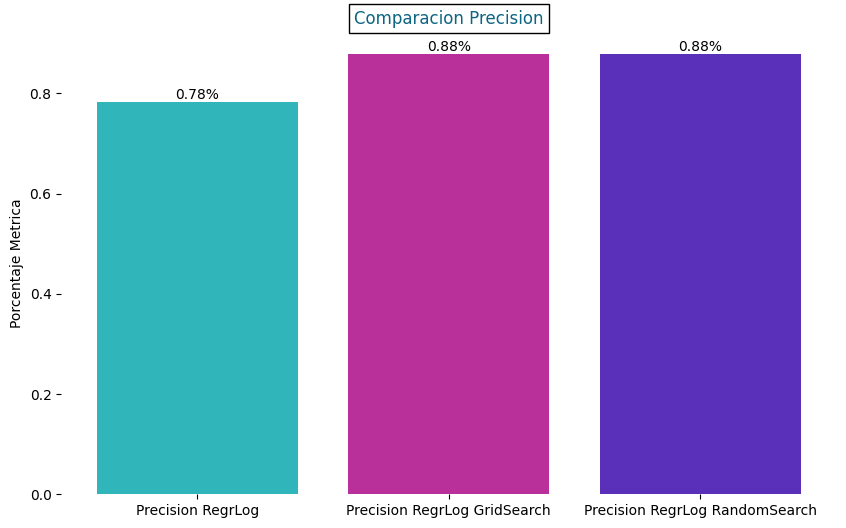

In [ ]:
# Barchart con los datos de Precision
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['Precision RegrLog','Precision RegrLog GridSearch','Precision RegrLog RandomSearch']
Cantidad = [precision_log,precision_log2,precision_log3]

bar_colors = ['#30b6ba','#ba309a','#5a30ba']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion Precision',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"PrecisionRL: {precision_log}")
print(f"PrecisionRLGS: {precision_log2}")
print(f"PrecisionRLRS: {precision_log3}")


Métricas en el conjunto de prueba:
PrecisionRL: 0.7818411097099621
PrecisionRLGS: 0.8777589134125636
PrecisionRLRS: 0.8777589134125636


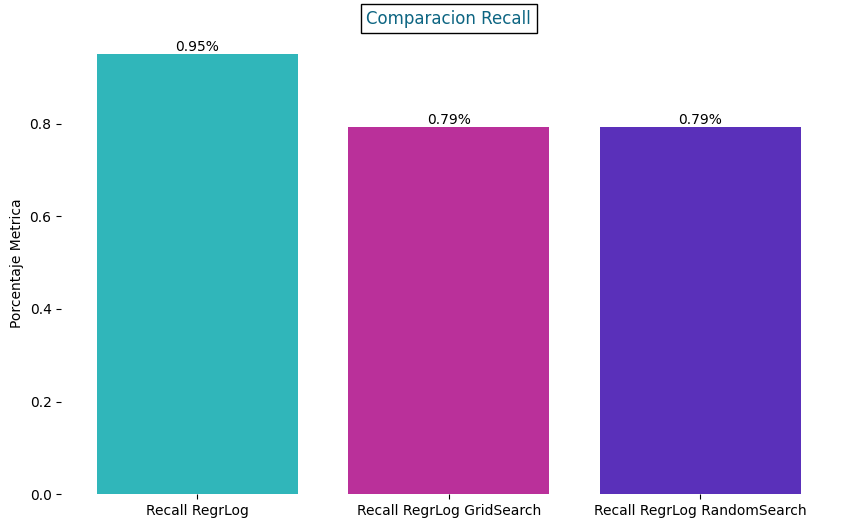

In [ ]:
# Barchart con los datos de Recall
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['Recall RegrLog','Recall RegrLog GridSearch','Recall RegrLog RandomSearch']
Cantidad = [recall_log,recall_log2,recall_log3]

bar_colors = ['#30b6ba','#ba309a','#5a30ba']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion Recall',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"RecallRL: {recall_log}")
print(f"RecallRLGS: {recall_log2}")
print(f"RecallRLRS: {recall_log3}")


Métricas en el conjunto de prueba:
RecallRL: 0.9494640122511485
RecallRLGS: 0.7917304747320061
RecallRLRS: 0.7917304747320061


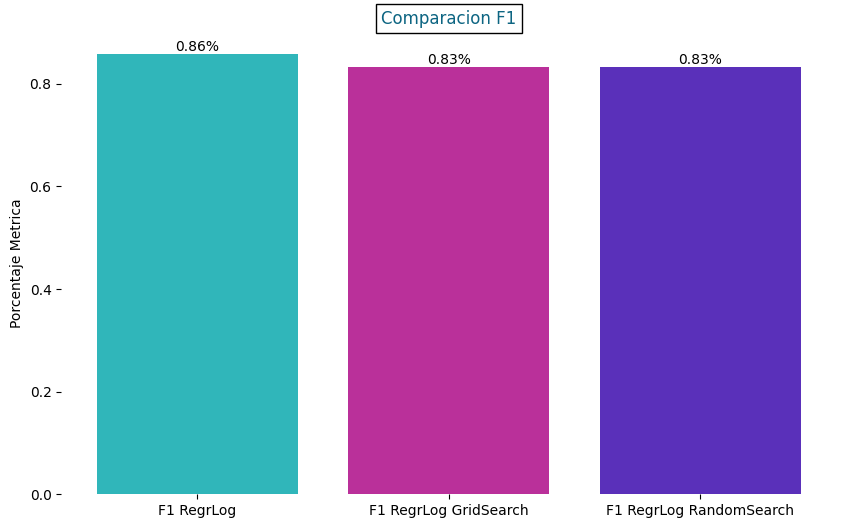

In [ ]:
# Barchart con los datos de F1
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['F1 RegrLog','F1 RegrLog GridSearch','F1 RegrLog RandomSearch']
Cantidad = [f1_log,f1_log2,f1_log3]

bar_colors = ['#30b6ba','#ba309a','#5a30ba']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion F1',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"F1ScoreRL: {f1_log}")
print(f"F1ScoreRLGS: {f1_log2}")
print(f"F1ScoreRLRS: {f1_log3}")


Métricas en el conjunto de prueba:
F1ScoreRL: 0.8575380359612724
F1ScoreRLGS: 0.8325281803542672
F1ScoreRLRS: 0.8325281803542672


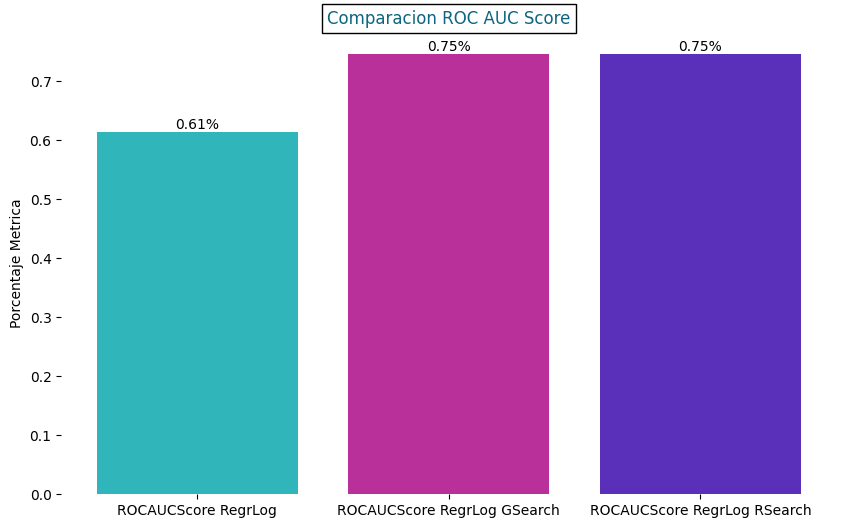

In [ ]:
# Barchart con los datos de Roc-Curve
fig, ax = plt.subplots(figsize=(10,6))

titulos_barras = ['ROCAUCScore RegrLog','ROCAUCScore RegrLog GSearch','ROCAUCScore RegrLog RSearch']
Cantidad = [roc_auc_log,roc_auc_log2,roc_auc_log3]

bar_colors = ['#30b6ba','#ba309a','#5a30ba']

# Quitar el contorno cuadrado
sns.despine(left=True, right=True, top=True, bottom=True)

ax.set_ylabel('Porcentaje Metrica')
ax.set_title('Comparacion ROC AUC Score',loc='center', color= '#0d6582', bbox={'facecolor':'1', 'pad':4})
#ax.legend(title='Tipo de Modelos')

# Crear el gráfico de barras
bars = ax.bar(titulos_barras, Cantidad, color=bar_colors)

# Agregar los datos a cada barra
for bar, cantidad in zip(bars, Cantidad):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{cantidad:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"F1ScoreRL: {roc_auc_log}")
print(f"F1ScoreRLGS: {roc_auc_log2}")
print(f"F1ScoreRLRS: {roc_auc_log3}")


Métricas en el conjunto de prueba:
F1ScoreRL: 0.6143153394589076
F1ScoreRLGS: 0.7458652373660029
F1ScoreRLRS: 0.7458652373660029


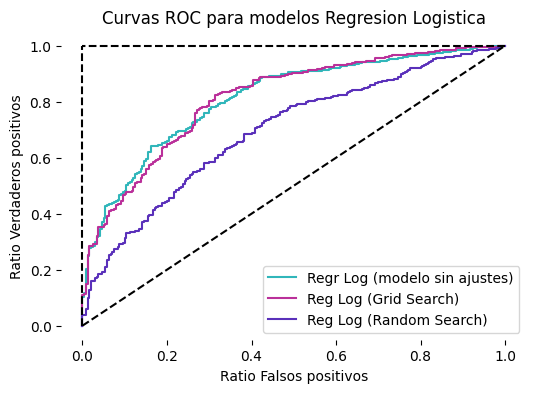

In [ ]:
# Graficar
plt.figure(figsize=(6,4))

# Calcular y trazar la curva ROC para el primer modelo de regresión logística (log_reg)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, color='#30b6ba', label='Regr Log (modelo sin ajustes)')

# Calcular y trazar la curva ROC para el segundo modelo de regresión logística (log_reg2)
y_pred_proba_log_reg_2 = log_reg2.predict_proba(X_test)[:, 1]
fpr_log_reg_2, tpr_log_reg_2, _ = roc_curve(y_test, y_pred_proba_log_reg_2)
plt.plot(fpr_log_reg_2, tpr_log_reg_2, color='#ba309a', label='Reg Log (Grid Search)')

# Calcular y trazar la curva ROC para el tercer modelo de regresión logística Random Search (log_reg3)
y_pred_proba_log_reg_3 = log_reg3.predict_proba(X_test)[:, 1]
fpr_log_reg_3, tpr_log_reg_3, _ = roc_curve(y_test, y_pred_proba_log_reg_3)
plt.plot(fpr_log_reg_3, tpr_log_reg_3, color='#5a30ba', label='Reg Log (Random Search)')

# Agregar la línea diagonal (curva ROC para un modelo perfecto)
plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
plt.plot([0, 0], [0, 1], color='Black', linestyle='--')
plt.plot([1, 0], [1, 1], color='Black', linestyle='--')

# Etiquetas y título

plt.xlabel('Ratio Falsos positivos')
plt.ylabel('Ratio Verdaderos positivos')
plt.title('Curvas ROC para modelos Regresion Logistica', loc= 'center')
plt.legend()

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

###**XGBoost**

In [ ]:
# Instanciar XGBoost para clasificación binaria
xgb = XGBClassifier(objective='binary:logistic', seed=42)

In [ ]:
# Ajustar modelo
xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)

# Calcular métricas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

Text(0.5, 1.0, 'Matriz de Confusion para XGBoost')

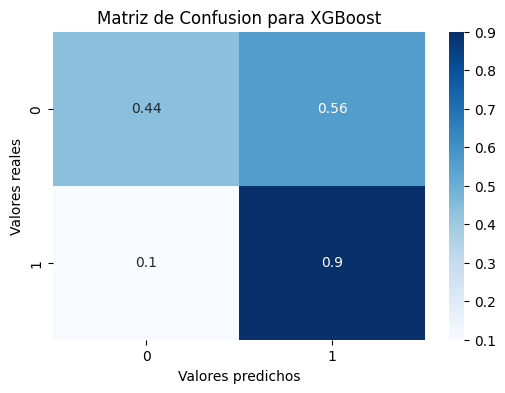

In [ ]:
# Crear matríz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Armar DataFrame para mejor visualización con datos normalizados
df_cm_xgb = np.round(cm_xgb/np.sum(cm_xgb,axis=1).reshape(-1,1),2) #fmt='d'

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_cm_xgb,cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para XGBoost', loc= 'center')

In [ ]:
# Mostrar métricas de prueba para comparación
print(cm_xgb)

print('Accuracy: ', accuracy_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_xgb)

[[106 134]
 [ 65 588]]
Accuracy:  0.7771556550951848
Precision:  0.814404432132964
Recall:  0.900459418070444
F1 Score:  0.8552727272727273


In [ ]:
# Comparacion con Regresion Logistica GridSearch
print(cm_log2)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log2}")
print(f"Precision: {precision_log2}")
print(f"Recall: {recall_log2}")
print(f"F1 Score: {f1_log2}")

[[168  72]
 [136 517]]

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672


In [ ]:
# Comparacion con Regresion Logistica Sin Hiperparametros
print(cm_log)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log}")
print(f"Precision: {precision_log}")
print(f"Recall: {recall_log}")
print(f"F1 Score: {f1_log}")

[[ 67 173]
 [ 33 620]]

Métricas en el conjunto de prueba:
Accuracy: 0.7693169092945129
Precision: 0.7818411097099621
Recall: 0.9494640122511485
F1 Score: 0.8575380359612724


**CONCLUSION:**

Si bien en las metricas suele dar un poco mas alto tanto en XGBoost como en Regresion Logistica sin hiperparametros, en el caso de Regresion Logistica GridSearch da mejor en la Confusion Matrix y en la curva ROC

Por eso mejoramos los hyperparametros de los modelos de Boosting

In [ ]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instanciar el modelo XGBoost
xgb = XGBClassifier(objective='binary:logistic', seed=42)

# Inicializar GridSearchCV
grid_searchxgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_searchxgb.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
# Obtener el mejor modelo
best_modelxgb = grid_searchxgb.best_estimator_

# Predecir con el mejor modelo
y_predxgb = best_modelxgb.predict(X_test)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_searchxgb.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Conjunto de parametros para probar
parametrs = {
    'colsample_bytree': 0.9,
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 300,
    'subsample': 0.8,
}

# Crear el modelo
xgb2 = XGBClassifier(**parametrs, random_state=42)

# Ajustar el modelo
xgb2.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_xgb2 = xgb2.predict(X_test)
y_pred_train_xgb2 = xgb2.predict(X_train)

In [ ]:
# Calcular métricas
accuracy_xgb2 = accuracy_score(y_test, y_pred_xgb2)
precision_xgb2 = precision_score(y_test, y_pred_xgb2)
recall_xgb2 = recall_score(y_test, y_pred_xgb2)
f1_xgb2 = f1_score(y_test, y_pred_xgb2)

Text(0.5, 1.0, 'Matriz de Confusion para XGBoost con Ajustes de Parametros')

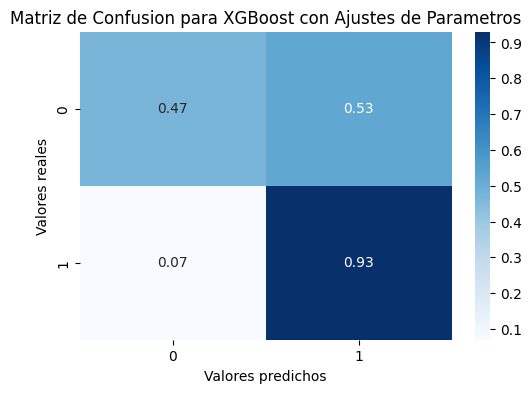

In [ ]:
# Crear matríz de confusión
cm_xgb2 = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb2)

# Armar DataFrame para mejor visualización
df_xgb2 = np.round(cm_xgb2/np.sum(cm_xgb2,axis=1).reshape(-1,1),2)

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_xgb2, cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para XGBoost con Ajustes de Parametros', loc= 'center')

In [ ]:
# Mostrar métricas de prueba para comparación XGBoost HyperParameters
print(cm_xgb2)

print('Accuracy: ', accuracy_xgb2)
print('Precision: ', precision_xgb2)
print('Recall: ', recall_xgb2)
print('F1 Score: ', f1_xgb2)

[[112 128]
 [ 46 607]]
Accuracy:  0.8051511758118701
Precision:  0.8258503401360544
Recall:  0.9295558958652373
F1 Score:  0.8746397694524496


In [ ]:
# Mostrar métricas de prueba para comparación XGBoost sin Hyperparameters
print(cm_xgb)

print('Accuracy: ', accuracy_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_xgb)

[[106 134]
 [ 65 588]]
Accuracy:  0.7771556550951848
Precision:  0.814404432132964
Recall:  0.900459418070444
F1 Score:  0.8552727272727273


In [ ]:
# Comparacion con Regresion Logistica HyperParameters
print(cm_log2)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log2}")
print(f"Precision: {precision_log2}")
print(f"Recall: {recall_log2}")
print(f"F1 Score: {f1_log2}")

[[168  72]
 [136 517]]

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672


**CONCLUSION:**

Logramos las mejores metricas con este modelo (XGBoost) y ajustando los hiperparametros. Seguimos penando Matriz confusion

###**CATBoost**

In [ ]:
# Instanciar CatBoost para clasificación binaria
catboost = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', random_seed=42)

In [ ]:
# Ajustar modelo
catboost.fit(X_train, y_train)

# Predecir
y_pred_catboost = catboost.predict(X_test)

# Calcular métricas
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)

Learning rate set to 0.017743
0:	learn: 0.7894737	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.7984323	total: 75.4ms	remaining: 37.6s
2:	learn: 0.8031915	total: 92.8ms	remaining: 30.8s
3:	learn: 0.8031915	total: 96.9ms	remaining: 24.1s
4:	learn: 0.8043113	total: 101ms	remaining: 20s
5:	learn: 0.8043113	total: 106ms	remaining: 17.5s
6:	learn: 0.8037514	total: 111ms	remaining: 15.7s
7:	learn: 0.8023516	total: 115ms	remaining: 14.2s
8:	learn: 0.8031915	total: 118ms	remaining: 13s
9:	learn: 0.8031915	total: 123ms	remaining: 12.2s
10:	learn: 0.8045913	total: 126ms	remaining: 11.4s
11:	learn: 0.8037514	total: 132ms	remaining: 10.8s
12:	learn: 0.8031915	total: 135ms	remaining: 10.2s
13:	learn: 0.8029115	total: 156ms	remaining: 11s
14:	learn: 0.8037514	total: 168ms	remaining: 11s
15:	learn: 0.8031915	total: 173ms	remaining: 10.7s
16:	learn: 0.8029115	total: 183ms	remaining: 10.6s
17:	learn: 0.8045913	total: 215ms	remaining: 11.7s
18:	learn: 0.8057111	total: 235ms	remaining: 12.1s
19:	learn: 0.80

Text(0.5, 1.0, 'Matriz de Confusion para CatBoost')

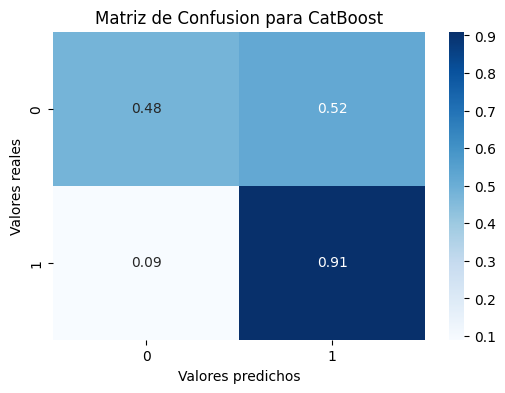

In [ ]:
# Confusion Matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)


# Armar DataFrame para mejor visualización con datos normalizados
df_cm_catboost = np.round(cm_catboost/np.sum(cm_catboost,axis=1).reshape(-1,1),2) #fmt='d'

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_cm_catboost,cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para CatBoost', loc= 'center')

In [ ]:
# Mostrar métricas de prueba para comparación
print(cm_catboost)

print('Accuracy: ', accuracy_catboost )
print('Precision: ', precision_catboost)
print('Recall: ', recall_catboost)
print('F1 Score: ', f1_catboost)


[[115 125]
 [ 61 592]]
Accuracy:  0.7917133258678611
Precision:  0.8256624825662483
Recall:  0.9065849923430321
F1 Score:  0.8642335766423357


In [ ]:
# Comparacion con Regresion Logistica GridSearch
print(cm_log2)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log2}")
print(f"Precision: {precision_log2}")
print(f"Recall: {recall_log2}")
print(f"F1 Score: {f1_log2}")

[[168  72]
 [136 517]]

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672


**CONCLUSION:**

Lo mismo que en el caso anterior, mejores porcentaje de metricas, pero peor matrix de confusion. (suelen tener mayor tendencia a falsos negativos)
Falta realizar el ajuste con los Hyperparameters, asi posiblemente logremos la mejoria que buscamos.

In [ ]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'depth': [3, 4, 6, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 10],
    'bagging_temperature': [0, 0.5, 1],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
}

# Instanciar CatBoost para clasificación binaria
catboost = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', random_seed=42)

# Inicializar GridSearchCV
random_search_catb = RandomizedSearchCV(catboost,param_distributions=param_grid,n_iter=100, cv=3,scoring='accuracy',verbose=3,random_state=42,n_jobs=-1)

# Ajustar el modelo
random_search_catb.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 0.7799552	total: 2.17ms	remaining: 1.08s
1:	learn: 0.7810750	total: 5.5ms	remaining: 1.37s
2:	learn: 0.7953527	total: 7.62ms	remaining: 1.26s
3:	learn: 0.7953527	total: 9.71ms	remaining: 1.2s
4:	learn: 0.7975924	total: 11.9ms	remaining: 1.18s
5:	learn: 0.7967525	total: 13.8ms	remaining: 1.14s
6:	learn: 0.7967525	total: 15.6ms	remaining: 1.1s
7:	learn: 0.7961926	total: 17.3ms	remaining: 1.06s
8:	learn: 0.7981523	total: 19ms	remaining: 1.04s
9:	learn: 0.7984323	total: 20.8ms	remaining: 1.02s
10:	learn: 0.8003919	total: 22.5ms	remaining: 999ms
11:	learn: 0.7989922	total: 24.1ms	remaining: 981ms
12:	learn: 0.8001120	total: 25.8ms	remaining: 968ms
13:	learn: 0.8012318	total: 27.6ms	remaining: 959ms
14:	learn: 0.7992721	total: 29.3ms	remaining: 949ms
15:	learn: 0.7987122	total: 31ms	remaining: 938ms
16:	learn: 0.7992721	total: 32.7ms	remaining: 930ms
17:	learn: 0.7987122	total: 34.4ms	remaining: 922ms
18:	learn: 0.79927

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x785076922bf0>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.5, 1],
                                        'depth': [3, 4, 6, 8, 9],
                                        'grow_policy': ['SymmetricTree',
                                                        'Depthwise',
                                                        'Lossguide'],
                                        'iterations': [100, 500, 1000],
                                        'l2_leaf_reg': [1, 3, 5, 10],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
# Obtener el mejor modelo
best_modelcatb = random_search_catb.best_estimator_

# Predecir con el mejor modelo
y_predxgb = best_modelcatb.predict(X_test)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = random_search_catb.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 500, 'grow_policy': 'SymmetricTree', 'depth': 3, 'bagging_temperature': 0.5}


In [ ]:
# Conjunto de parametros para probar
parametrs =  {'bagging_temperature': 0.5,
              'depth': 3,
              'iterations': 500,
              'l2_leaf_reg': 1,
              'learning_rate': 0.01,
              'grow_policy': 'SymmetricTree'}

# Crear el modelo
catboost2 = CatBoostClassifier(**parametrs, random_state=42)
# Ajustar el modelo
catboost2.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_catboost2 = catboost2.predict(X_test)
y_pred_train_catboost2 = catboost2.predict(X_train)

0:	learn: 0.6887064	total: 2.18ms	remaining: 1.09s
1:	learn: 0.6832740	total: 3.96ms	remaining: 986ms
2:	learn: 0.6777901	total: 5.78ms	remaining: 957ms
3:	learn: 0.6725173	total: 7.84ms	remaining: 973ms
4:	learn: 0.6671870	total: 9.68ms	remaining: 958ms
5:	learn: 0.6619119	total: 11.5ms	remaining: 948ms
6:	learn: 0.6574282	total: 13.3ms	remaining: 936ms
7:	learn: 0.6530655	total: 15.2ms	remaining: 933ms
8:	learn: 0.6482206	total: 17.2ms	remaining: 938ms
9:	learn: 0.6436667	total: 18.7ms	remaining: 917ms
10:	learn: 0.6391675	total: 20.1ms	remaining: 896ms
11:	learn: 0.6352104	total: 21.6ms	remaining: 879ms
12:	learn: 0.6309749	total: 23.1ms	remaining: 865ms
13:	learn: 0.6267104	total: 24.6ms	remaining: 852ms
14:	learn: 0.6233824	total: 26.1ms	remaining: 843ms
15:	learn: 0.6201754	total: 27.5ms	remaining: 833ms
16:	learn: 0.6162662	total: 29.4ms	remaining: 835ms
17:	learn: 0.6133157	total: 31.2ms	remaining: 837ms
18:	learn: 0.6098189	total: 33ms	remaining: 836ms
19:	learn: 0.6065496	tot

Text(0.5, 1.0, 'Matriz de Confusion para CatBoost con Hyperparametros')

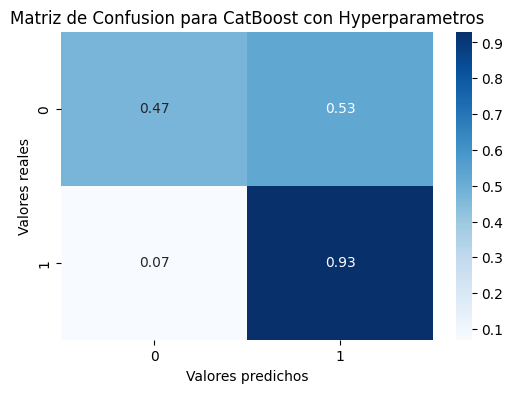

In [ ]:
# Confusion Matrix
cm_catboost2 = confusion_matrix(y_test, y_pred_catboost2)


# Armar DataFrame para mejor visualización con datos normalizados
df_cm_catboost2 = np.round(cm_catboost2/np.sum(cm_catboost2,axis=1).reshape(-1,1),2) #fmt='d'

# Gráfico de matríz de confusión recomendado con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(data=df_cm_catboost2,cmap='Blues', annot=True, cbar_kws={'orientation':'vertical'})
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.title('Matriz de Confusion para CatBoost con Hyperparametros', loc= 'center')

In [ ]:
# Calcular métricas
accuracy_catboost2 = accuracy_score(y_test, y_pred_catboost2)
precision_catboost2 = precision_score(y_test, y_pred_catboost2)
recall_catboost2 = recall_score(y_test, y_pred_catboost2)
f1_catboost2 = f1_score(y_test, y_pred_catboost2)

In [ ]:
# Mostrar métricas de prueba CatBoost con Hyperparameters
print(cm_catboost2)

print('Accuracy: ', accuracy_catboost2)
print('Precision: ', precision_catboost2)
print('Recall: ', recall_catboost2)
print('F1 Score: ', f1_catboost2)

[[113 127]
 [ 47 606]]
Accuracy:  0.8051511758118701
Precision:  0.8267394270122783
Recall:  0.9280245022970903
F1 Score:  0.8744588744588745


In [ ]:
# Mostrar métricas de prueba CatBoost sin Hyperparameters
print(cm_catboost)

print('Accuracy: ', accuracy_catboost )
print('Precision: ', precision_catboost)
print('Recall: ', recall_catboost)
print('F1 Score: ', f1_catboost)

[[115 125]
 [ 61 592]]
Accuracy:  0.7917133258678611
Precision:  0.8256624825662483
Recall:  0.9065849923430321
F1 Score:  0.8642335766423357


In [ ]:
# Mostrar métricas de prueba para comparación XGBoost sin Hyperparameters
print(cm_xgb)

print('Accuracy: ', accuracy_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_xgb)

[[106 134]
 [ 65 588]]
Accuracy:  0.7771556550951848
Precision:  0.814404432132964
Recall:  0.900459418070444
F1 Score:  0.8552727272727273


In [ ]:
# Mostrar métricas de prueba para comparación XGBoost con HyperParameters
print(cm_xgb2)

print('Accuracy: ', accuracy_xgb2)
print('Precision: ', precision_xgb2)
print('Recall: ', recall_xgb2)
print('F1 Score: ', f1_xgb2)

[[112 128]
 [ 46 607]]
Accuracy:  0.8051511758118701
Precision:  0.8258503401360544
Recall:  0.9295558958652373
F1 Score:  0.8746397694524496


In [ ]:
# Comparacion con Regresion Logistica HyperParameters
print(cm_log2)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log2}")
print(f"Precision: {precision_log2}")
print(f"Recall: {recall_log2}")
print(f"F1 Score: {f1_log2}")

[[168  72]
 [136 517]]

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672


###**LightGBM (Light Gradient Boosting Machine)**

In [ ]:
# Instanciar LGBM
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)

# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')


In [ ]:
# Comparacion Light Gradient Boosting Machine sin Hyperparameters
print(cm_lgbm)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1 Score: {f1_lgbm}")

[[114 126]
 [ 69 584]]

Métricas en el conjunto de prueba:
Accuracy: 0.7816349384098544
Precision: 0.7688955091590794
Recall: 0.7816349384098544
F1 Score: 0.7714883593680036


In [ ]:
# Definir el grid de hiperparámetros a buscar
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [20, 30, 40]
}

# Instanciar LGBM
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)

# Inicializar GridSearchCV
random_search_lgbm = RandomizedSearchCV(lgbm,param_distributions=param_grid,n_iter=100, cv=5 ,scoring='accuracy',verbose=1, n_jobs=-1)

# Ajustar el modelo
random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbose=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 10, 20],
                                        'min_child_samples': [20, 30, 40],
                                        'n_estimators': [100, 200, 500],
                                        'num_leaves': [31, 50, 70]},
                   scoring='accuracy', verbose=1)

In [ ]:
# Obtener los mejores parámetros encontrados
best_params_lgbm = random_search_lgbm.best_params_
print(f"Mejores parámetros encontrados: {best_params_lgbm}")

Mejores parámetros encontrados: {'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 40, 'max_depth': 10, 'learning_rate': 0.01}


In [ ]:
# Conjunto de parametros para probar
parametrs =   {'num_leaves': 70,
               'n_estimators': 200,
               'min_child_samples': 40,
               'max_depth': 10,
               'learning_rate': 0.01}

# Crear el modelo
best_lgbm = LGBMClassifier(**parametrs)
# Ajustar el modelo
best_lgbm.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred_lgbm2 = best_lgbm.predict(X_test)


[LightGBM] [Info] Number of positive: 2614, number of negative: 958
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1903
[LightGBM] [Info] Number of data points in the train set: 3572, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.731803 -> initscore=1.003789
[LightGBM] [Info] Start training from score 1.003789
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
# Calcular métricas
accuracy_lgbm2 = accuracy_score(y_test, y_pred_lgbm2)
cm_lgbm2 = confusion_matrix(y_test, y_pred_lgbm2)
precision_lgbm2 = precision_score(y_test, y_pred_lgbm2, average='weighted')
recall_lgbm2 = recall_score(y_test, y_pred_lgbm2, average='weighted')
f1_lgbm2 = f1_score(y_test, y_pred_lgbm2, average='weighted')

In [ ]:
# Comparacion Light Gradient Boosting Machine con Hyperparameters
print(cm_lgbm2)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_lgbm2}")
print(f"Precision: {precision_lgbm2}")
print(f"Recall: {recall_lgbm2}")
print(f"F1 Score: {f1_lgbm2}")

[[110 130]
 [ 42 611]]

Métricas en el conjunto de prueba:
Accuracy: 0.8073908174692049
Precision: 0.7974499518673503
Recall: 0.8073908174692049
F1 Score: 0.7918509058226846


In [ ]:
# Comparacion Light Gradient Boosting Machine sin Hyperparameters
print(cm_lgbm)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1 Score: {f1_lgbm}")

[[114 126]
 [ 69 584]]

Métricas en el conjunto de prueba:
Accuracy: 0.7816349384098544
Precision: 0.7688955091590794
Recall: 0.7816349384098544
F1 Score: 0.7714883593680036


In [ ]:
# Mostrar métricas de prueba CatBoost sin Hyperparameters
print(cm_catboost)

print('Accuracy: ', accuracy_catboost )
print('Precision: ', precision_catboost)
print('Recall: ', recall_catboost)
print('F1 Score: ', f1_catboost)

[[115 125]
 [ 61 592]]
Accuracy:  0.7917133258678611
Precision:  0.8256624825662483
Recall:  0.9065849923430321
F1 Score:  0.8642335766423357


In [ ]:
# Mostrar métricas de prueba CatBoost con Hyperparameters
print(cm_catboost2)

print('Accuracy: ', accuracy_catboost2)
print('Precision: ', precision_catboost2)
print('Recall: ', recall_catboost2)
print('F1 Score: ', f1_catboost2)

[[113 127]
 [ 47 606]]
Accuracy:  0.8051511758118701
Precision:  0.8267394270122783
Recall:  0.9280245022970903
F1 Score:  0.8744588744588745


In [ ]:
# Mostrar métricas de prueba para comparación XGBoost sin Hyperparameters
print(cm_xgb)

print('Accuracy: ', accuracy_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_xgb)

[[106 134]
 [ 65 588]]
Accuracy:  0.7771556550951848
Precision:  0.814404432132964
Recall:  0.900459418070444
F1 Score:  0.8552727272727273


In [ ]:
# Mostrar métricas de prueba para comparación XGBoost con HyperParameters
print(cm_xgb2)

print('Accuracy: ', accuracy_xgb2)
print('Precision: ', precision_xgb2)
print('Recall: ', recall_xgb2)
print('F1 Score: ', f1_xgb2)

[[112 128]
 [ 46 607]]
Accuracy:  0.8051511758118701
Precision:  0.8258503401360544
Recall:  0.9295558958652373
F1 Score:  0.8746397694524496


In [ ]:
# Comparacion con Regresion Logistica con HyperParameters
print(cm_log2)

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log2}")
print(f"Precision: {precision_log2}")
print(f"Recall: {recall_log2}")
print(f"F1 Score: {f1_log2}")

[[168  72]
 [136 517]]

Métricas en el conjunto de prueba:
Accuracy: 0.7670772676371781
Precision: 0.8777589134125636
Recall: 0.7917304747320061
F1 Score: 0.8325281803542672


##**15 - ELECCION DE ALGORITMO:**

###**Benchmark**

In [ ]:
xgb2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
best_lgbm

LGBMClassifier(learning_rate=0.01, max_depth=10, min_child_samples=40,
               n_estimators=200, num_leaves=70)

In [ ]:
def benchmark_models(y_test, y_pred_xgb2, y_pred_lgbm2):


    def evaluate_model(y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)

        return {
            "confusion_matrix": cm,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "roc_auc": roc}

    # Evaluar el modelo XGBoost
    metrics_xgboost = evaluate_model(y_test, y_pred_xgb2)

    # Evaluar el modelo LightGBM
    metrics_lgbm = evaluate_model(y_test, y_pred_lgbm2)

    # Crear un DataFrame para comparar las métricas
    metrics_comparison = pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "roc_auc"],
        "XGBoost": [metrics_xgboost["accuracy"], metrics_xgboost["precision"], metrics_xgboost["recall"], metrics_xgboost["f1_score"], metrics_xgboost["roc_auc"]],
        "LightGBM": [metrics_lgbm["accuracy"], metrics_lgbm["precision"], metrics_lgbm["recall"], metrics_lgbm["f1_score"], metrics_lgbm["roc_auc"]]
    })

    print(metrics_comparison)

    def plot_confusion_matrix(cm, title):
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(title)
        plt.ylabel('Valores Verdaderos')
        plt.xlabel('Valores Predichos')
        plt.show()

    # Matriz de confusión para XGBoost
    plot_confusion_matrix(metrics_xgboost["confusion_matrix"], "Confusion Matrix - XGBoost")

    # Matriz de confusión para LightGBM
    plot_confusion_matrix(metrics_lgbm["confusion_matrix"], "Confusion Matrix - LightGBM")


      Metric   XGBoost  LightGBM
0   Accuracy  0.805151  0.807391
1  Precision  0.825850  0.824561
2     Recall  0.929556  0.935681
3   F1 Score  0.874640  0.876614
4    roc_auc  0.698111  0.697007


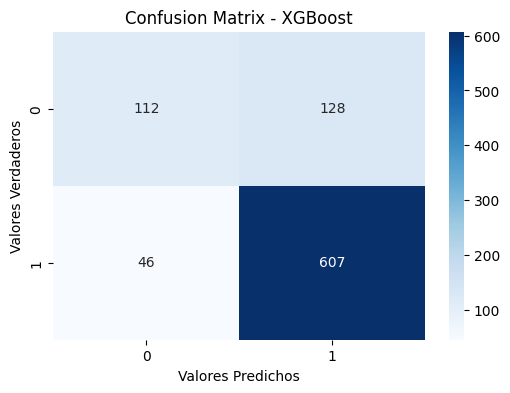

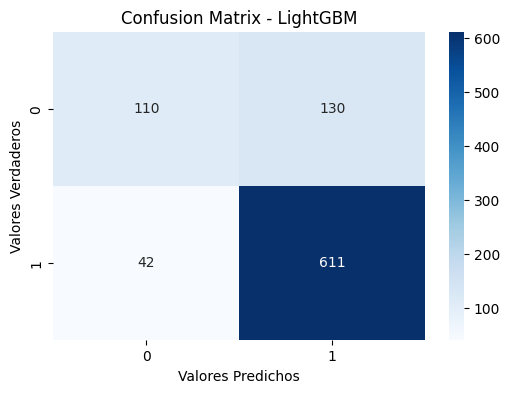

In [ ]:
# Llamo a la función con los datos
benchmark_models(y_test, y_pred_xgb2, y_pred_lgbm2)

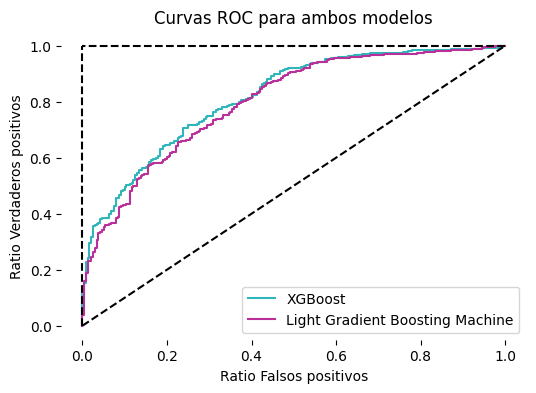

In [ ]:
# Graficar
plt.figure(figsize=(6,4))

# Calcular y trazar la curva ROC para XGBoost
y_pred_proba_xgb2 = xgb2.predict_proba(X_test)[:, 1]
fpr_xgb2, tpr_xgb2, _ = roc_curve(y_test, y_pred_proba_xgb2)
plt.plot(fpr_xgb2, tpr_xgb2, color='#30b6ba', label='XGBoost')


# Calcular y trazar la curva ROC para Light Gradient Boosting Machine
y_pred_proba_lgbm2 = best_lgbm.predict_proba(X_test)[:, 1]
fpr_lgbm2, tpr_lgbm2, _ = roc_curve(y_test, y_pred_proba_lgbm2)
plt.plot(fpr_lgbm2, tpr_lgbm2, color='#ba309a', label='Light Gradient Boosting Machine')

# Agregar la línea diagonal (curva ROC para un modelo perfecto)
plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
plt.plot([0, 0], [0, 1], color='Black', linestyle='--')
plt.plot([1, 0], [1, 1], color='Black', linestyle='--')

# Etiquetas y título
plt.xlabel('Ratio Falsos positivos')
plt.ylabel('Ratio Verdaderos positivos')
plt.title('Curvas ROC para ambos modelos', loc= 'center')
plt.legend()

# Eliminar contorno
sns.despine(left=True, right=True, top=True, bottom=True)

plt.show()

###**Modelo**

El algoritmo de Machine Learning que mas se ajusta a nuestros datos es **xgb2**

In [ ]:
xgb2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

###**Guardado de Modelo**

In [ ]:
joblib.dump(xgb2,'xgb2.pkl')

['xgb2.pkl']

###**Carga de Modelo**

In [ ]:
xgb2 = joblib.load('/content/drive/MyDrive/Coderhouse/DATA SCIENCE/Proyecto_JMM/Datasets_Jorge_Mariano_Miro/JMM_ESTRUCTURA/MODELO/xgb2.pkl') # Ruts de acceso al drive

In [ ]:
xgb2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

###**Validacion del Modelo con Datos Nuevos**

In [ ]:
Datos_nuevos = pd.read_csv('') # Ruta del Archivo

In [ ]:
Prediccion = xgb2.predict('Datos_nuevos')